# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_fae/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2035381640_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1878413714_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1795225096_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/790094605_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/487792155_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/638486177_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using /home/ashinde/PhD/CaffineBravery/results/re

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/2035381640_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


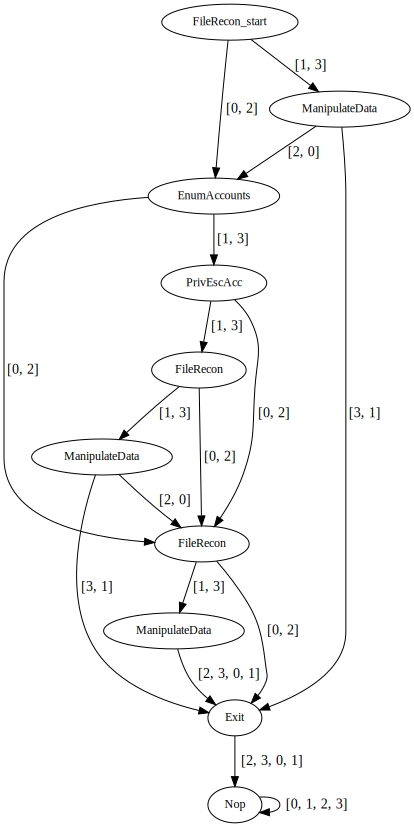

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1878413714_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


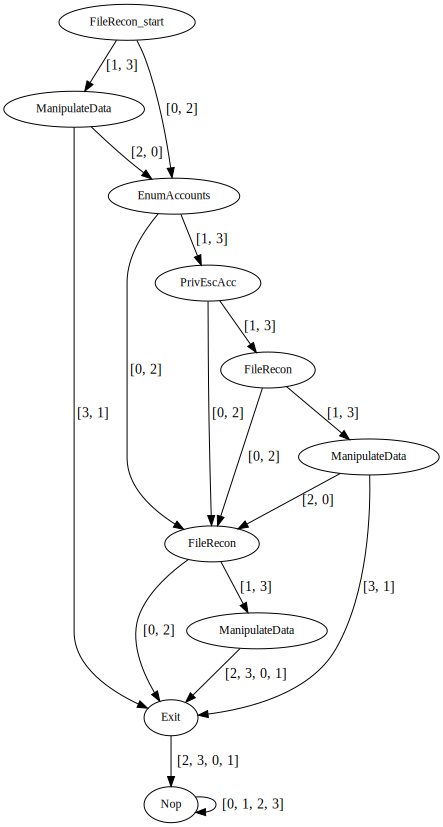

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/1795225096_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


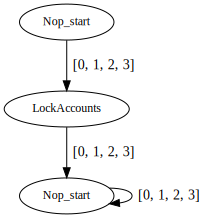

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/790094605_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


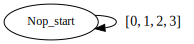

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/487792155_attl2_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


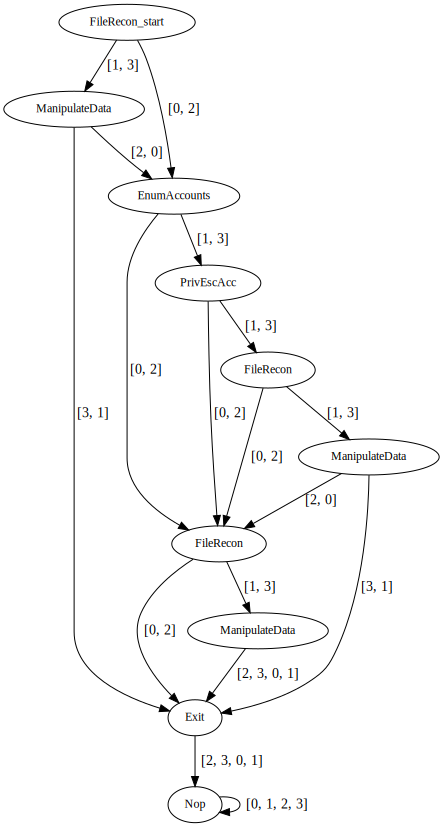

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/638486177_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


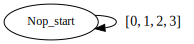

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_fae/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

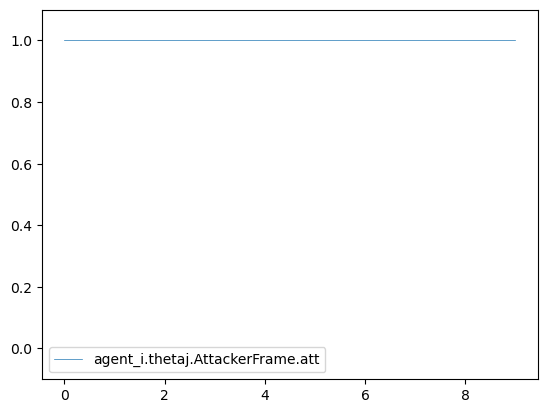

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

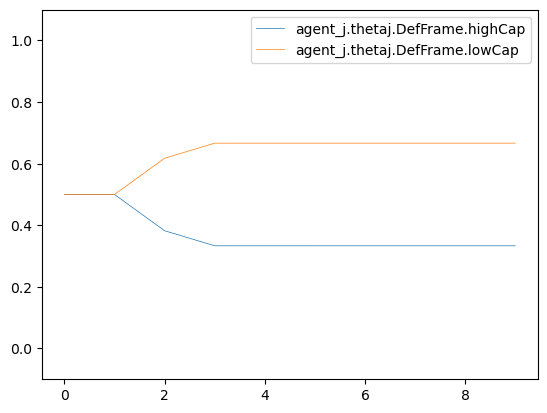

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

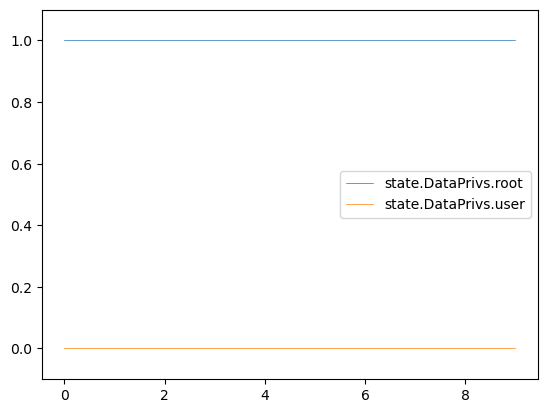

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

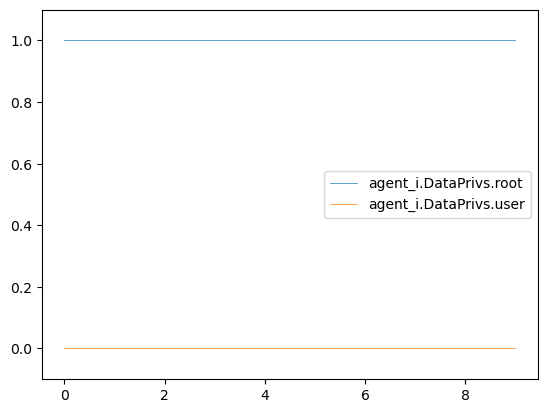

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

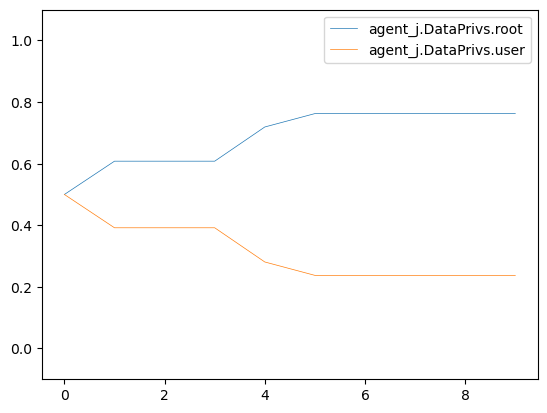

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

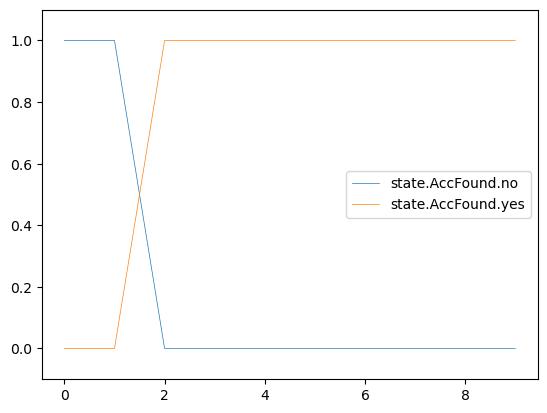

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

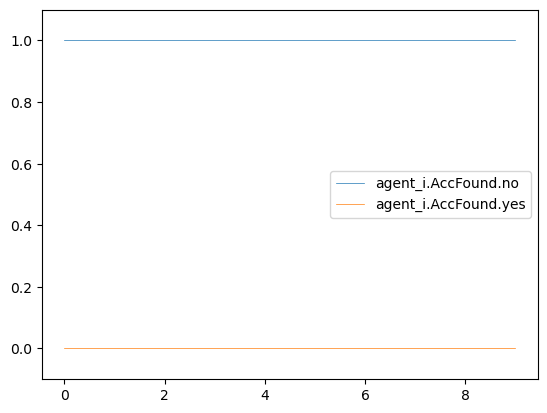

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

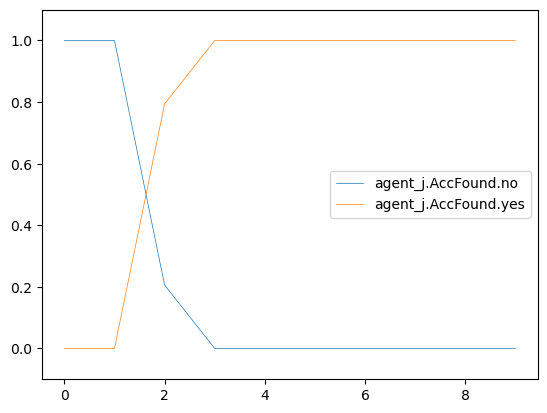

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

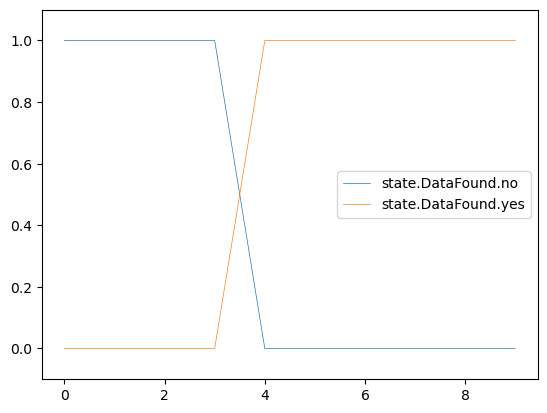

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

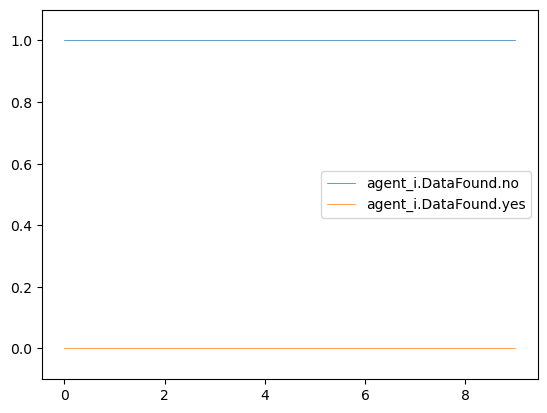

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

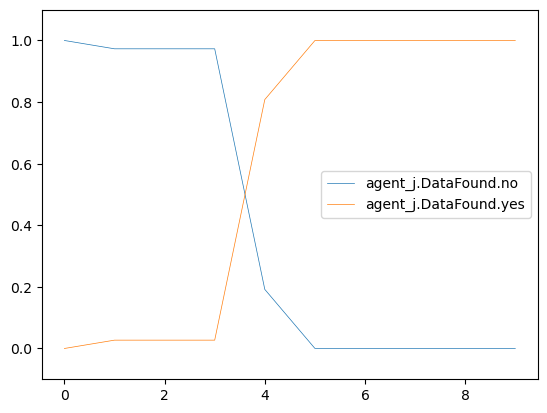

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

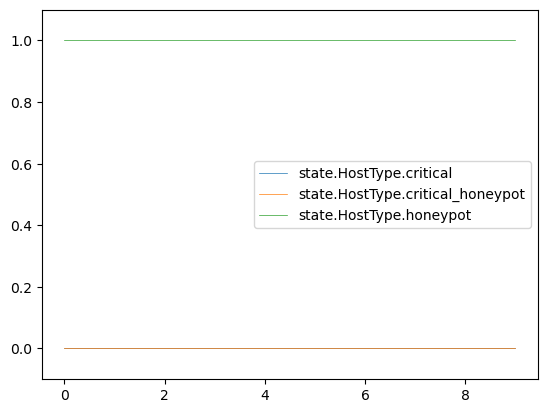

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

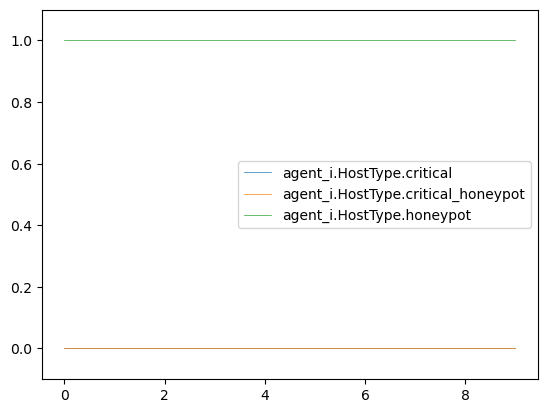

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

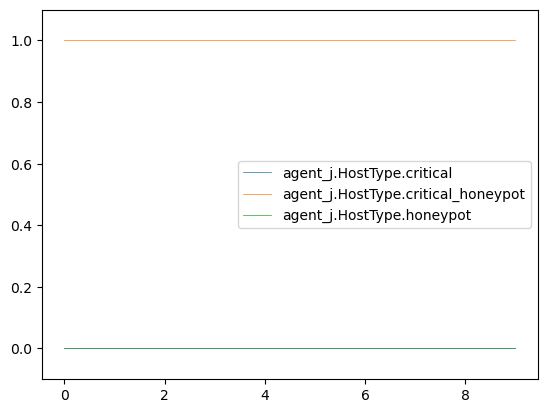

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

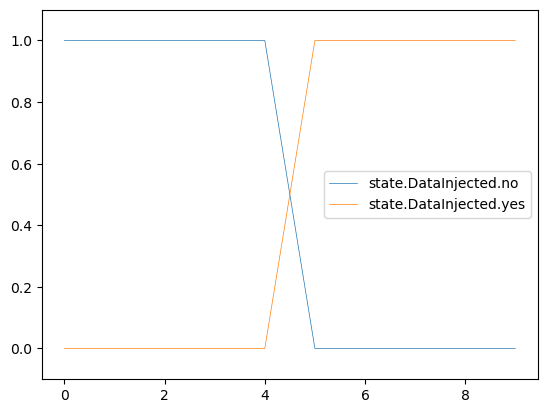

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

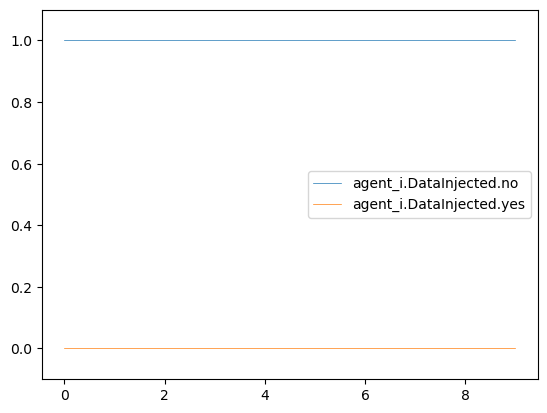

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

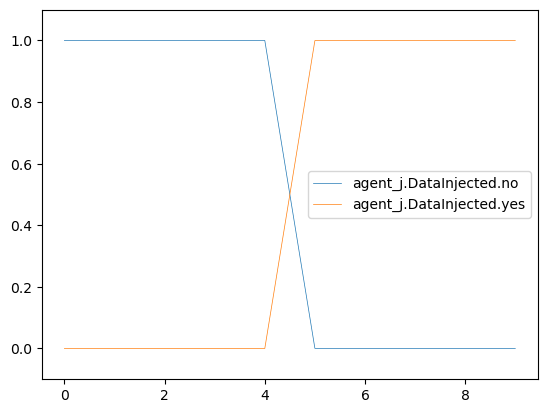

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

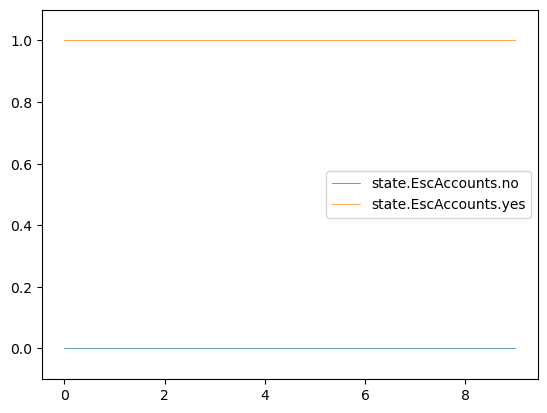

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

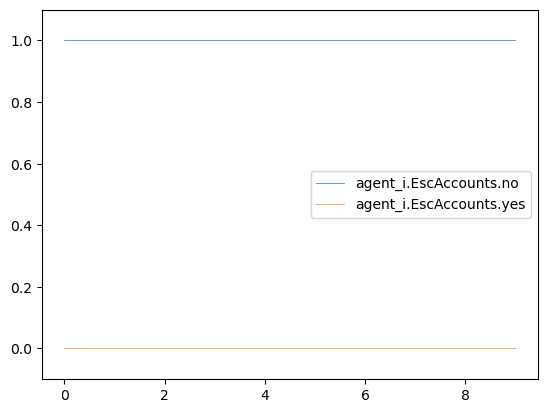

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

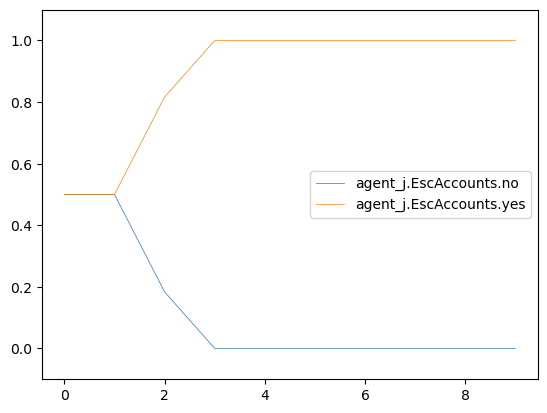

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

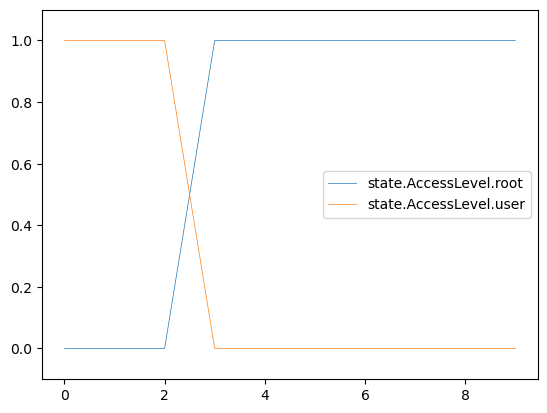

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

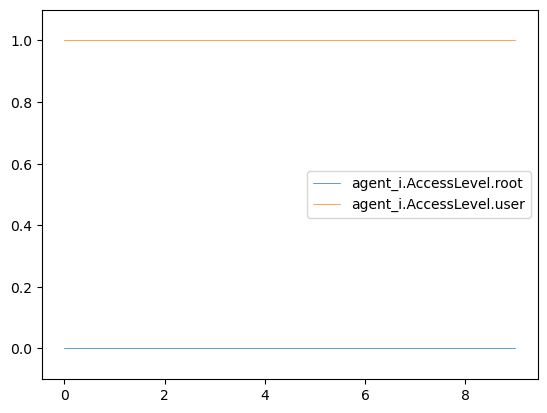

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

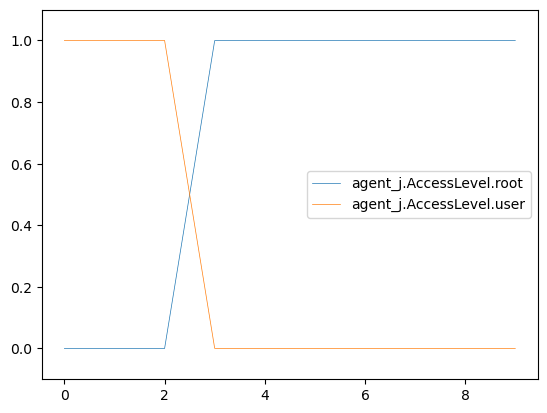

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

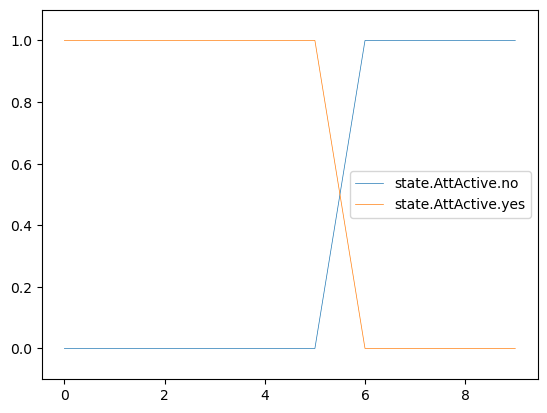

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop    EnumAccounts   
2              0.000000           9.999999e-01            Nop      PrivEscAcc   
3              0.000010           9.999896e-01            Nop       FileRecon   
4              0.000851           9.991486e-01            Nop  ManipulateData   
5              0.084903           9.150968e-01            Nop            Exit   
6              0.999991           9.423906e-06            Nop             Nop   
7              1.000000           9.624824e-09            Nop             Nop   
8              1.000000           1.206779e-17            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

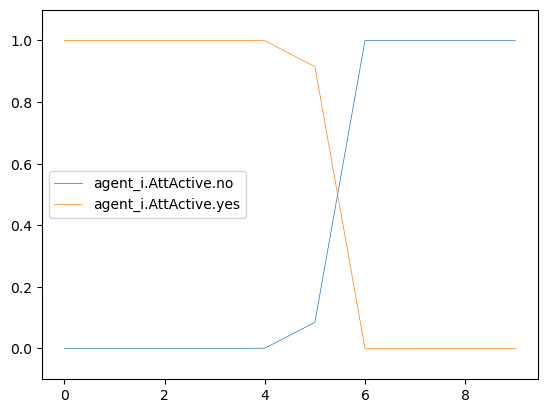

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                         none                           failure  
8                   user_files                           success  
9                   user_files                           success

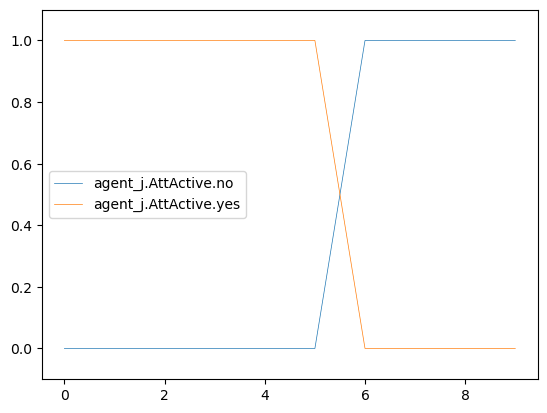

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

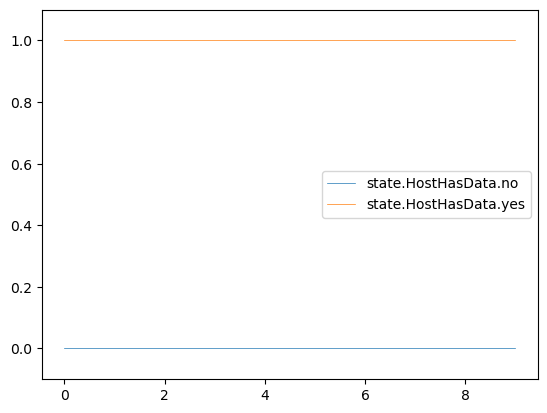

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

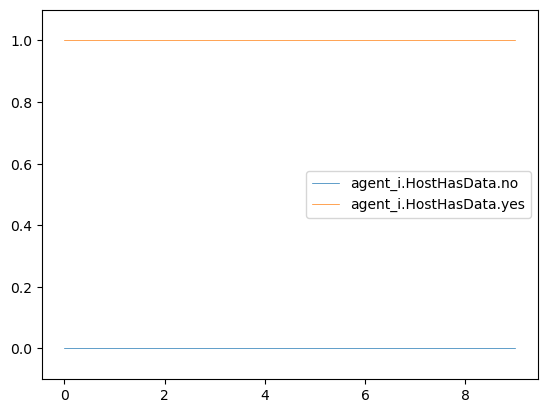

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

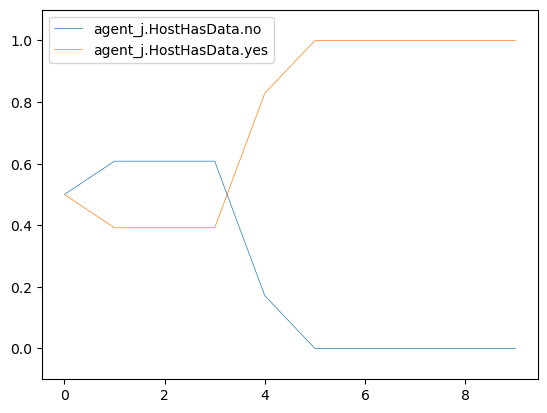

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

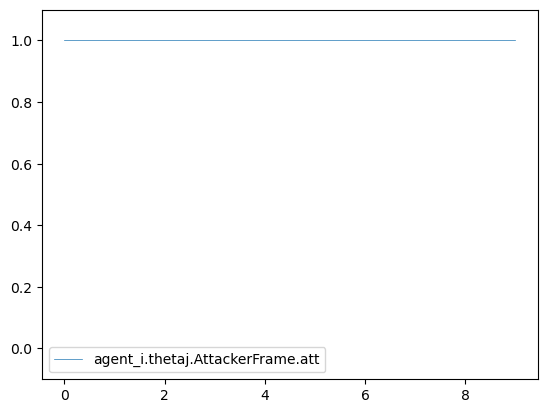

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

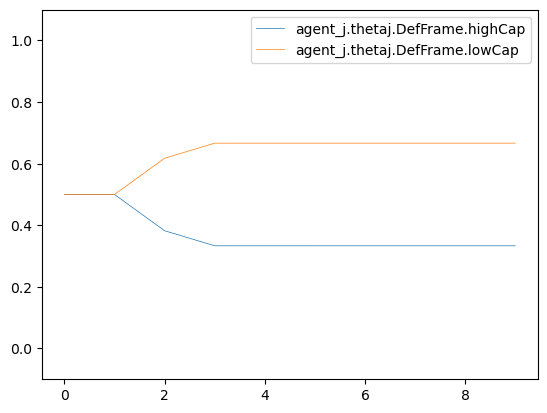

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

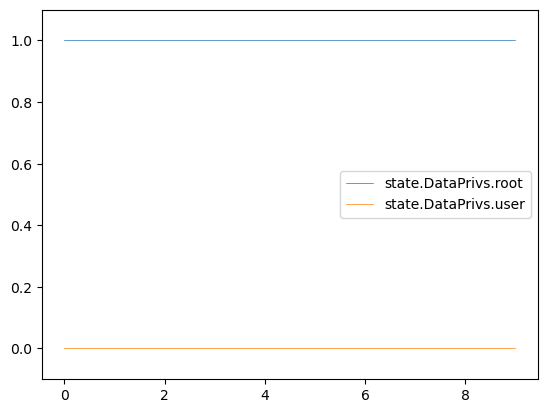

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

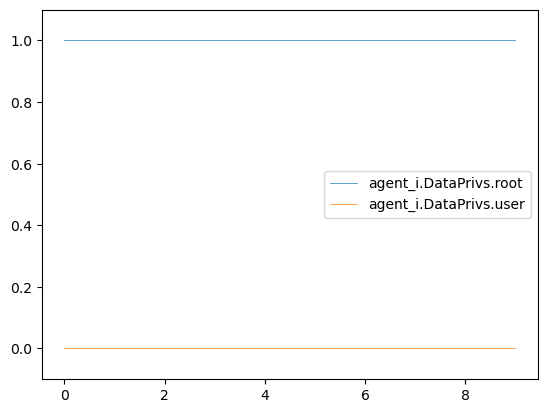

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

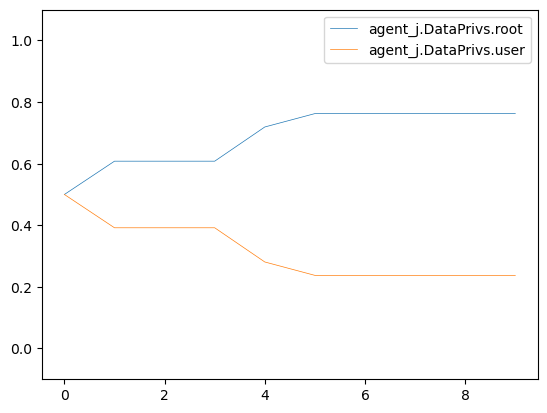

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

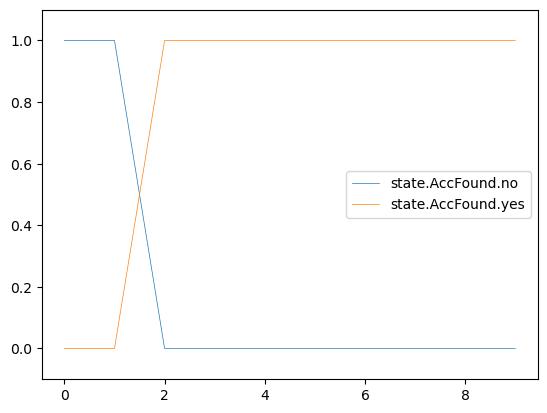

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

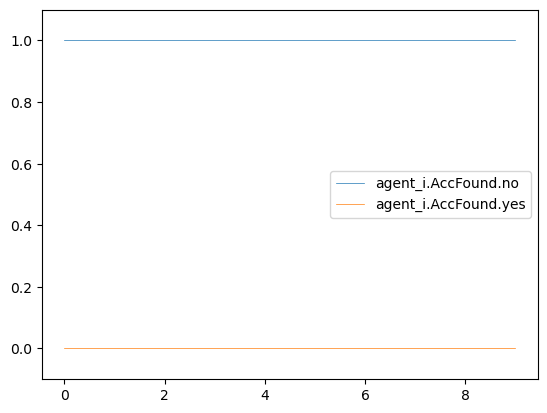

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

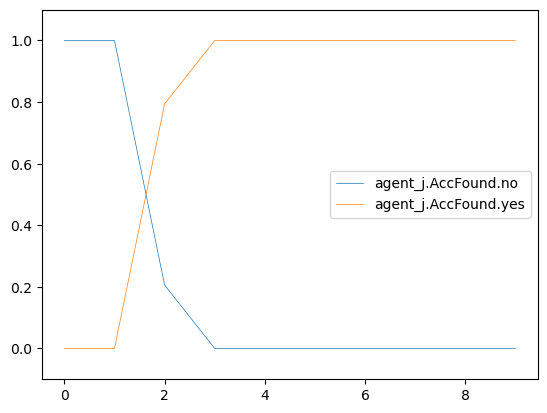

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

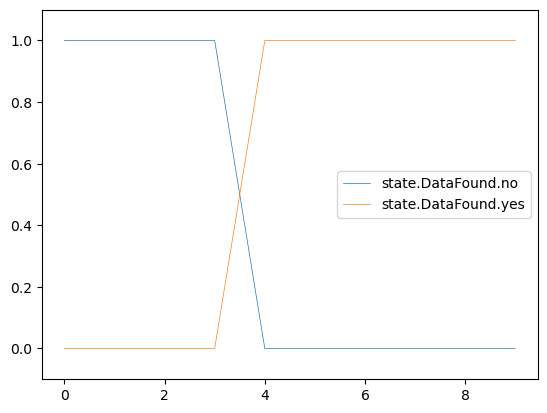

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

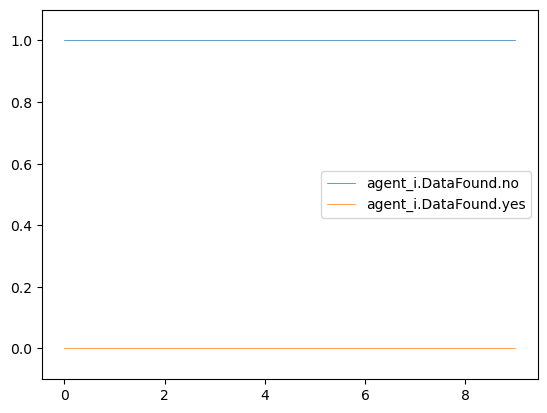

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

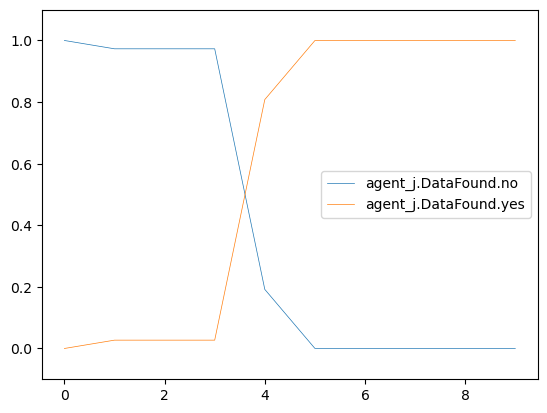

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

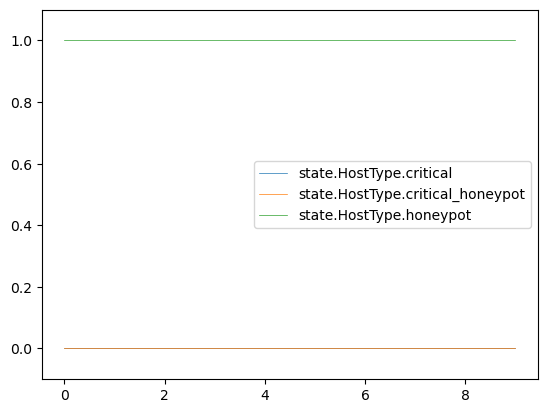

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

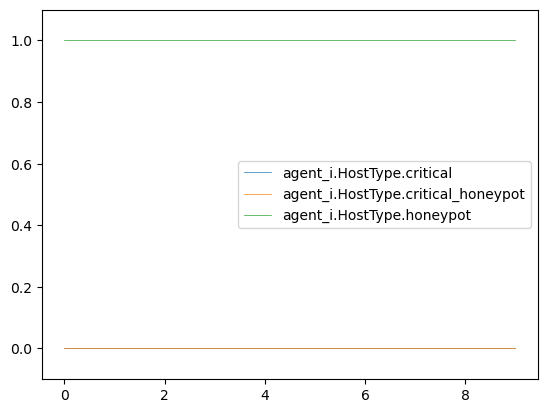

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

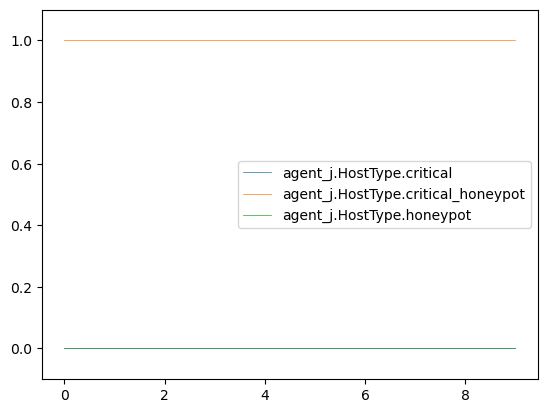

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

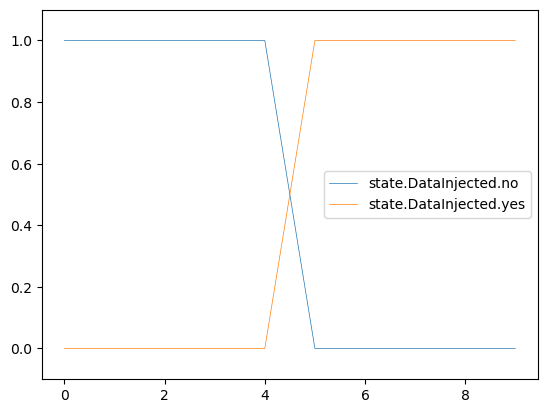

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

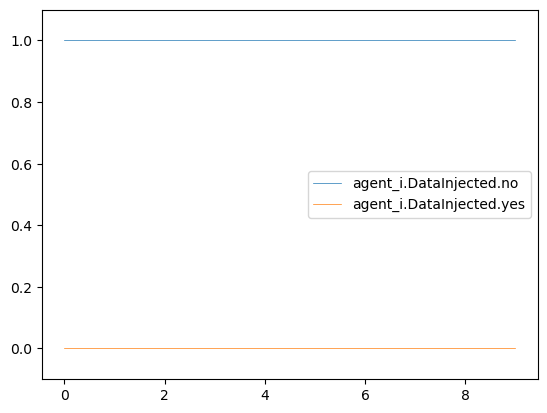

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

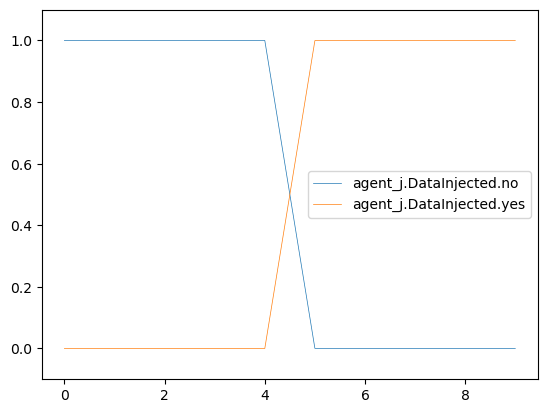

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

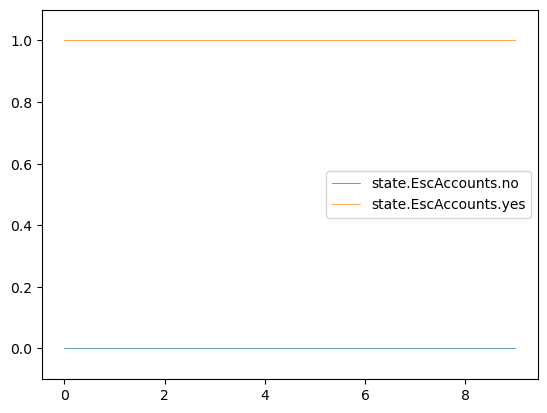

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

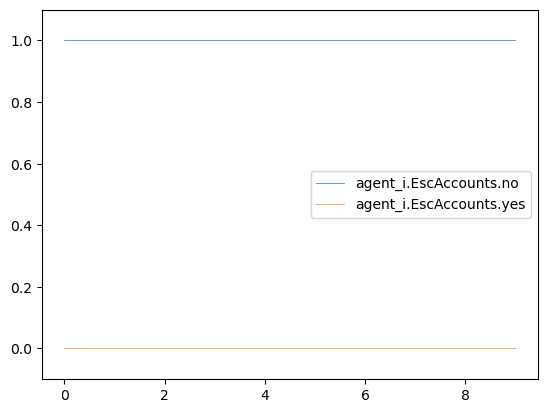

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

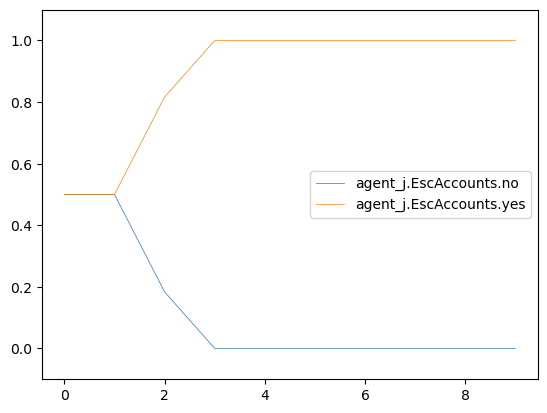

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

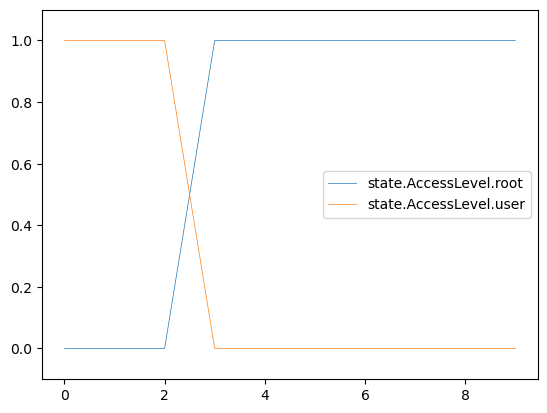

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

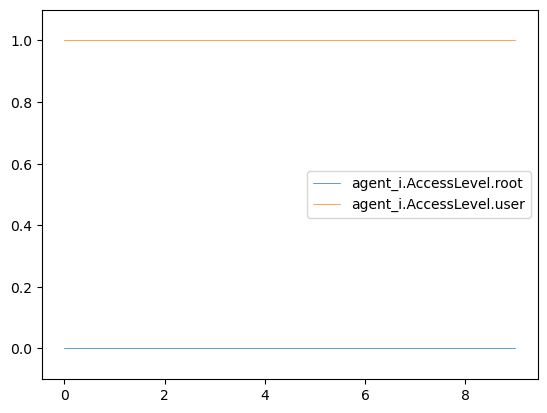

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

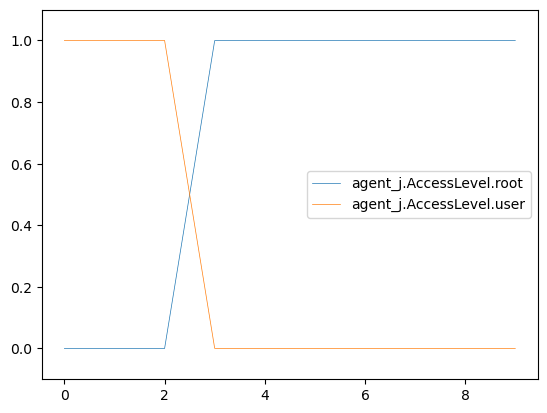

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

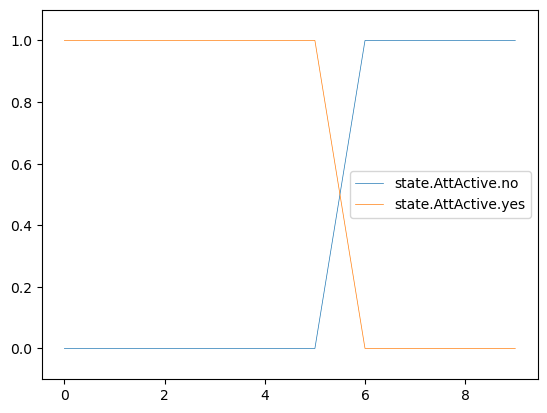

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0          0.000000e+00           1.000000e+00            Nop       FileRecon   
1          0.000000e+00           1.000000e+00            Nop    EnumAccounts   
2          0.000000e+00           1.000000e+00            Nop      PrivEscAcc   
3          1.080520e-07           9.999999e-01            Nop       FileRecon   
4          8.599650e-04           9.991401e-01            Nop  ManipulateData   
5          9.988456e-01           1.154378e-03            Nop            Exit   
6          9.999999e-01           2.239716e-08            Nop             Nop   
7          1.000000e+00           1.214604e-11            Nop             Nop   
8          1.000000e+00           1.522894e-20            Nop             Nop   
9          1.000000e+00           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

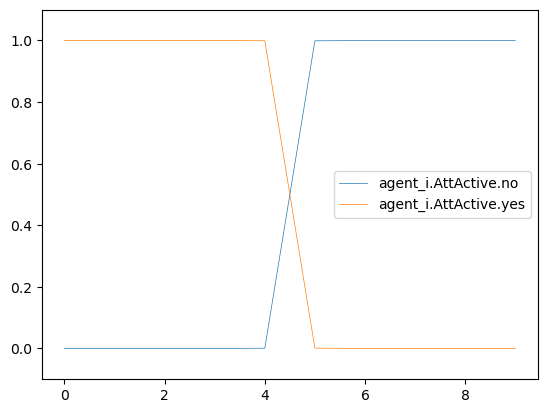

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

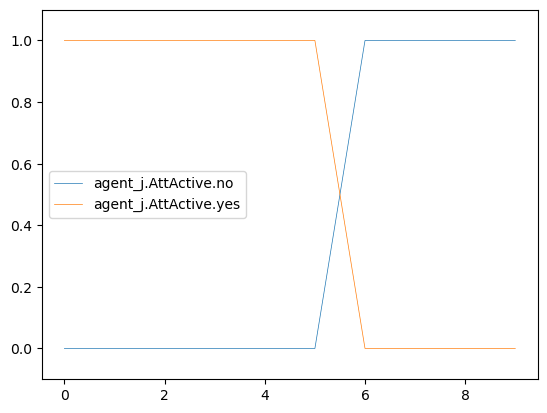

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

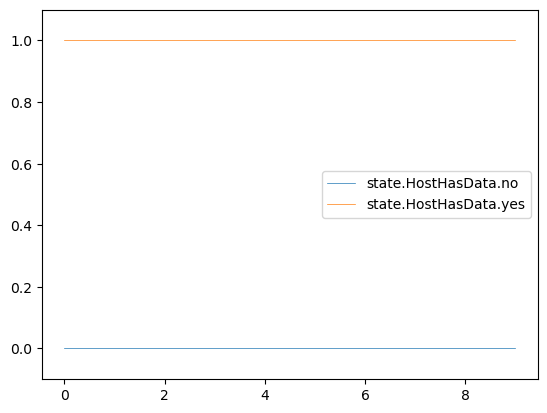

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                             none  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

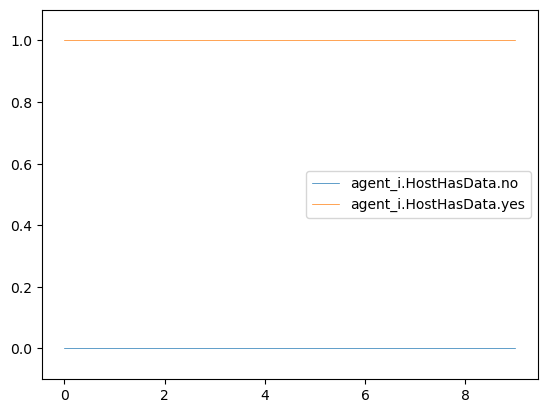

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           success  
8                           success  
9                           failure

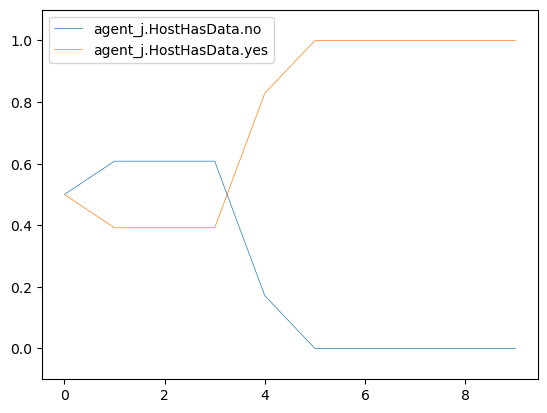

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

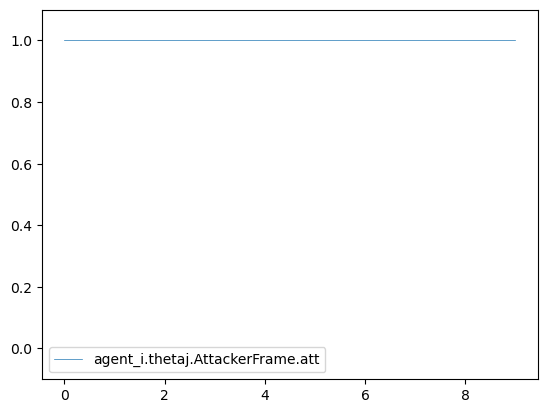

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.382353                        0.617647   
4                         0.333395                        0.666605   
5                         0.333359                        0.666641   
6                         0.333344                        0.666656   
7                         0.333344                        0.666656   
8                         0.333344                        0.666656   
9                         0.333344                        0.666656   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                         none                           success

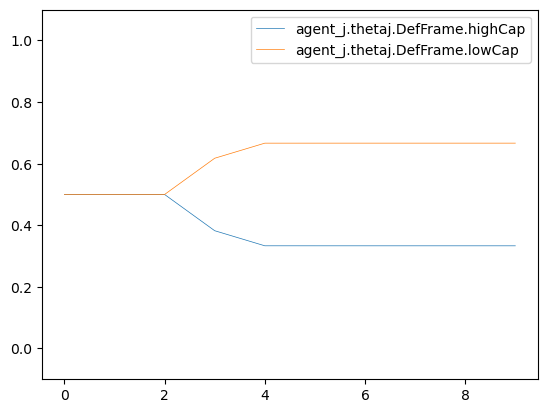

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

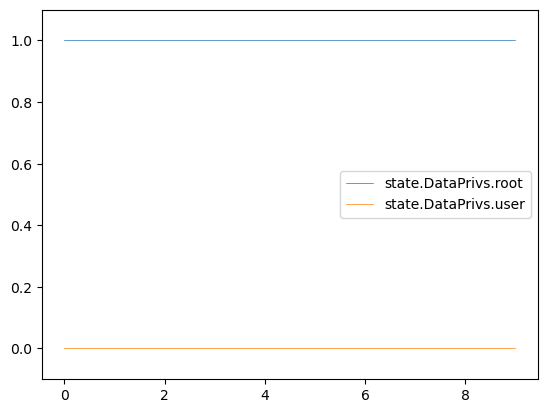

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

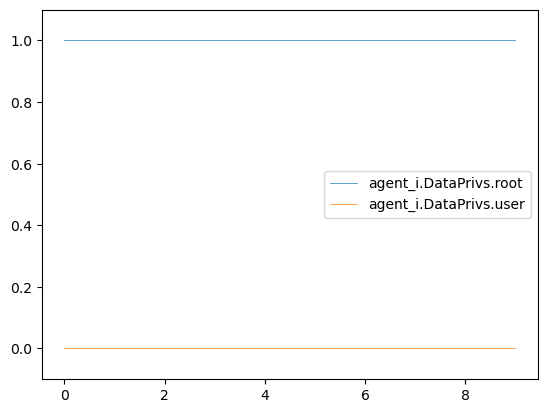

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623596                0.376405    EnumAccounts   
3                0.623595                0.376404      PrivEscAcc   
4                0.623595                0.376405       FileRecon   
5                0.767448                0.232552  ManipulateData   
6                0.827012                0.172988            Exit   
7                0.827012                0.172988             Nop   
8                0.827012                0.172988             Nop   
9                0.827012                0.172988             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

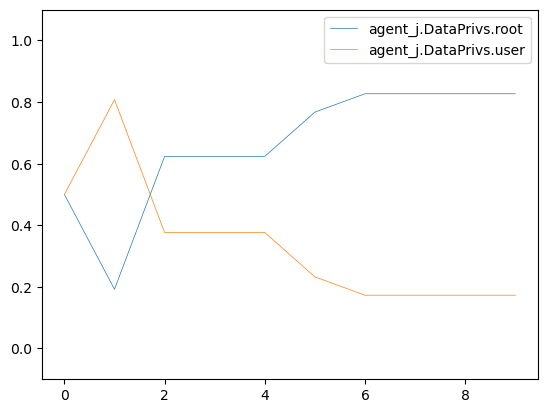

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

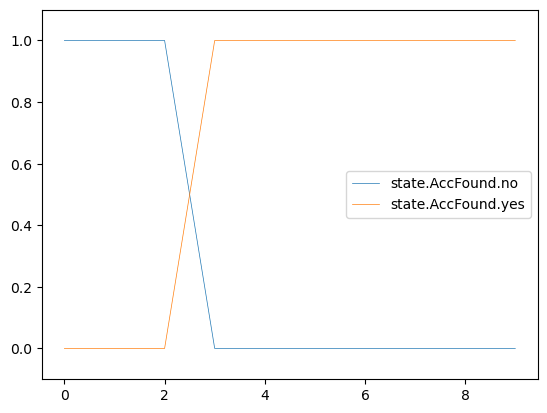

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop    EnumAccounts   
3                  1.0                   0.0            Nop      PrivEscAcc   
4                  1.0                   0.0            Nop       FileRecon   
5                  1.0                   0.0            Nop  ManipulateData   
6                  1.0                   0.0            Nop            Exit   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

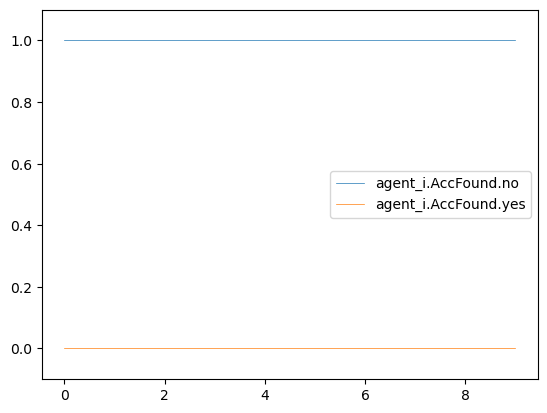

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData            Nop   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.205882              0.794118      PrivEscAcc            Nop   
4             0.000259              0.999741       FileRecon            Nop   
5             0.000108              0.999892  ManipulateData            Nop   
6             0.000045              0.999955            Exit            Nop   
7             0.000045              0.999955             Nop            Nop   
8             0.000045              0.999955             Nop            Nop   
9             0.000045              0.999955             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                         none                           success

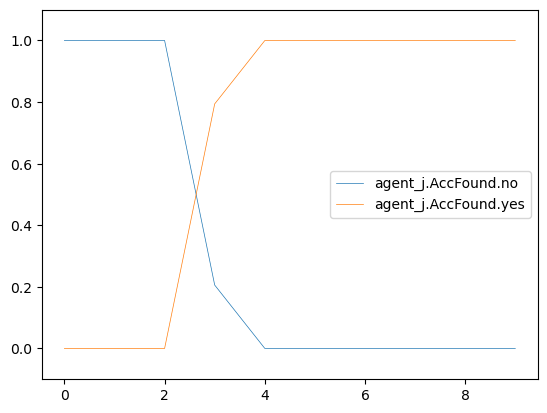

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

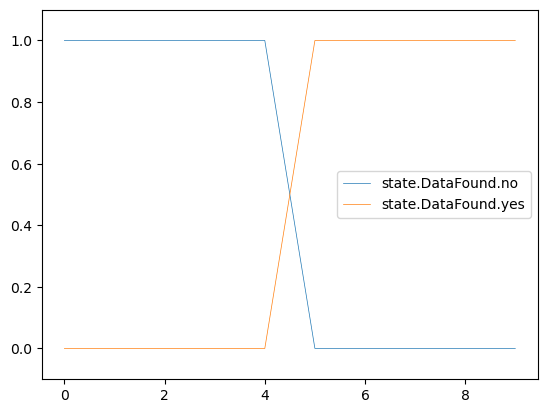

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop    EnumAccounts   
3                   1.0                    0.0            Nop      PrivEscAcc   
4                   1.0                    0.0            Nop       FileRecon   
5                   1.0                    0.0            Nop  ManipulateData   
6                   1.0                    0.0            Nop            Exit   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

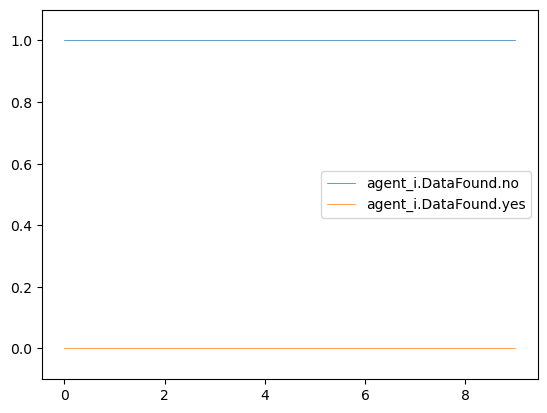

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.307692               0.692308  ManipulateData            Nop   
2              0.997753               0.002247    EnumAccounts            Nop   
3              0.997753               0.002247      PrivEscAcc            Nop   
4              0.997753               0.002247       FileRecon            Nop   
5              0.204712               0.795288  ManipulateData            Nop   
6              0.000258               0.999742            Exit            Nop   
7              0.000258               0.999742             Nop            Nop   
8              0.000258               0.999742             Nop            Nop   
9              0.000258               0.999742             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                         none                           success

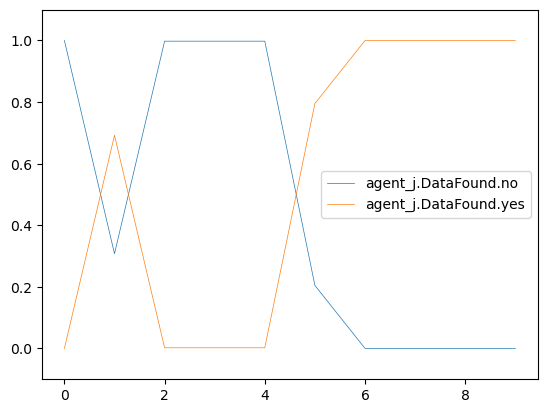

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

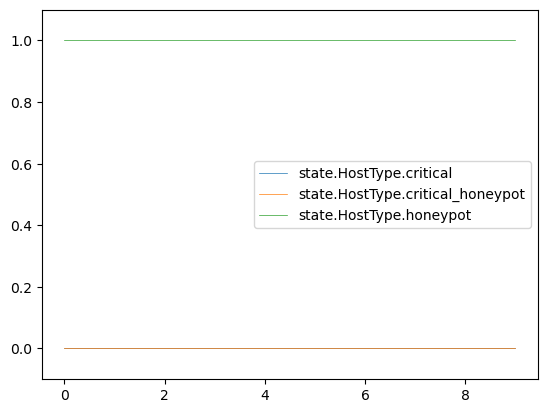

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

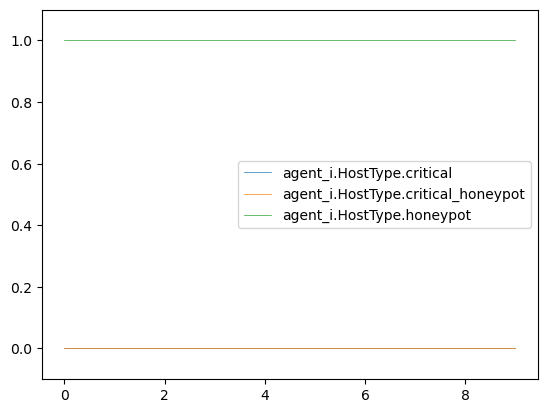

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0  ManipulateData            Nop   
2                        0.0    EnumAccounts            Nop   
3                        0.0      PrivEscAcc            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                         none                           success

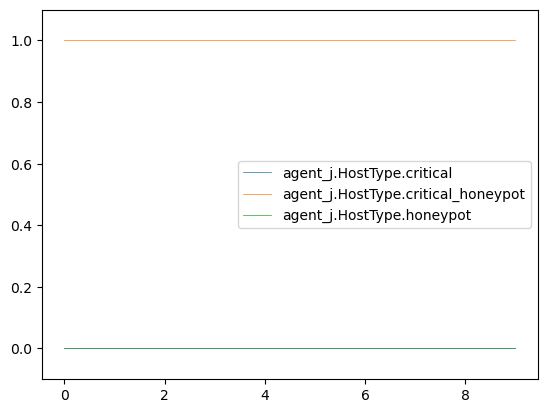

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

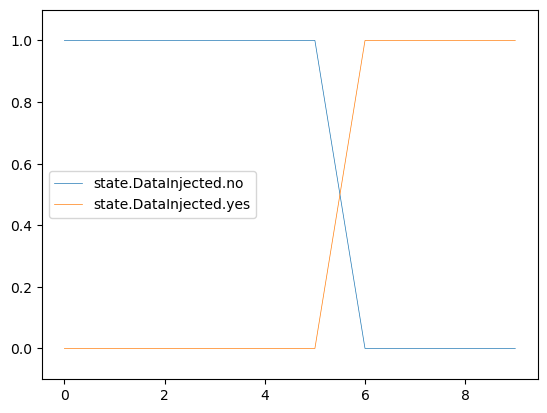

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

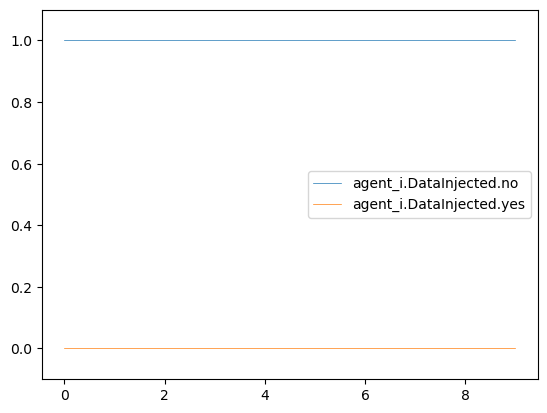

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.994073                  0.005927  ManipulateData   
6                 0.000258                  0.999742            Exit   
7                 0.000258                  0.999742             Nop   
8                 0.000258                  0.999742             Nop   
9                 0.000258                  0.999742             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

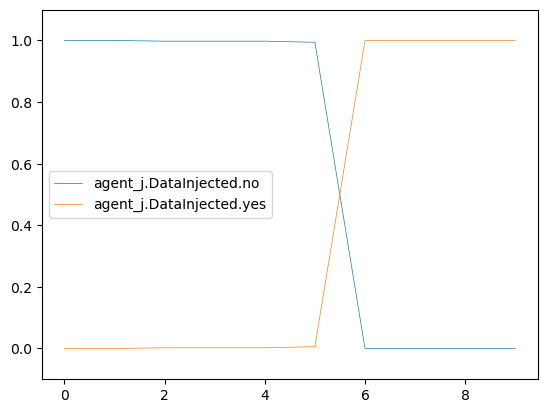

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

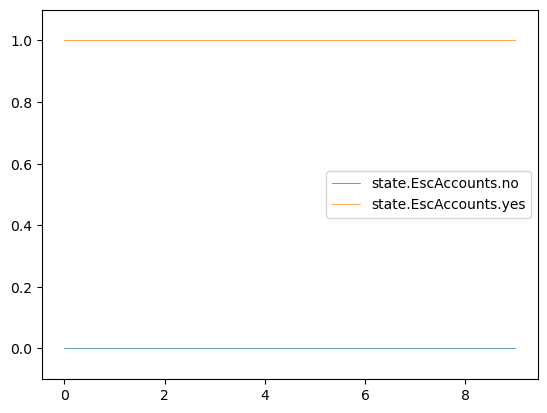

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

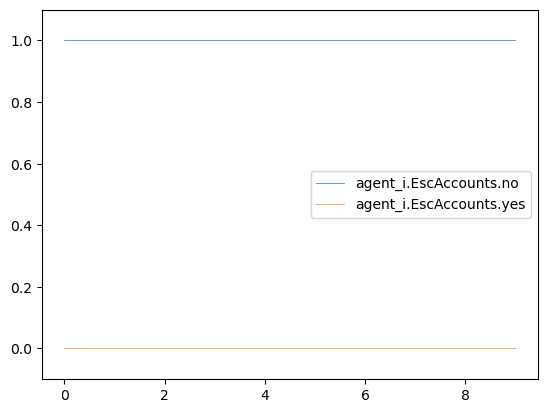

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.625000                 0.375000    EnumAccounts   
3                0.183824                 0.816176      PrivEscAcc   
4                0.000232                 0.999768       FileRecon   
5                0.000096                 0.999904  ManipulateData   
6                0.000040                 0.999960            Exit   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

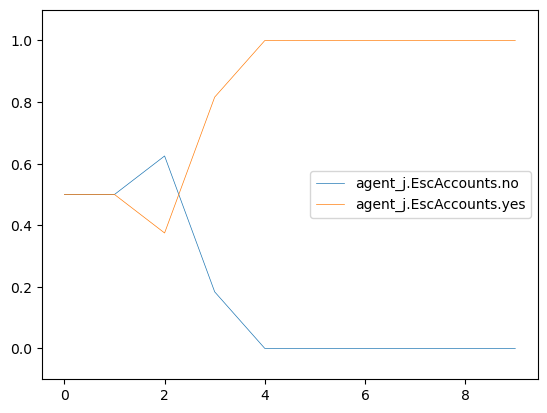

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

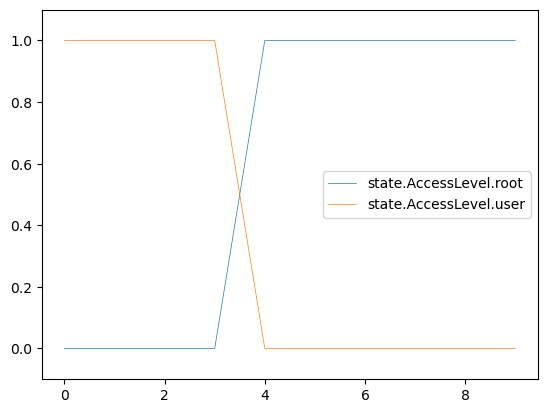

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

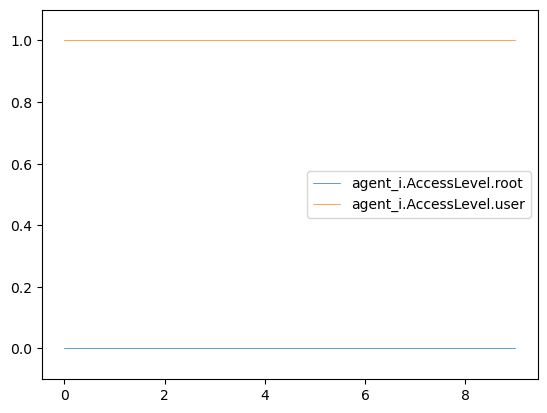

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999741                  0.000259       FileRecon   
5                  0.999892                  0.000108  ManipulateData   
6                  0.999955                  0.000045            Exit   
7                  0.999955                  0.000045             Nop   
8                  0.999955                  0.000045             Nop   
9                  0.999955                  0.000045             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

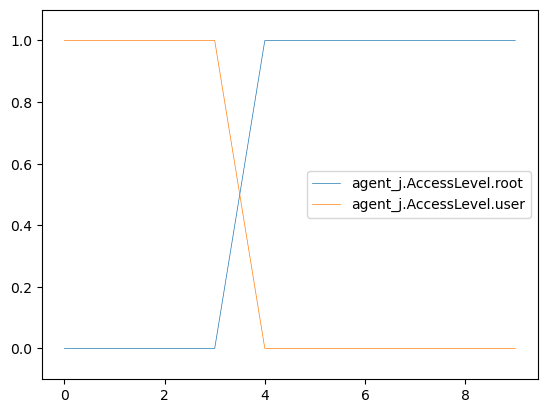

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

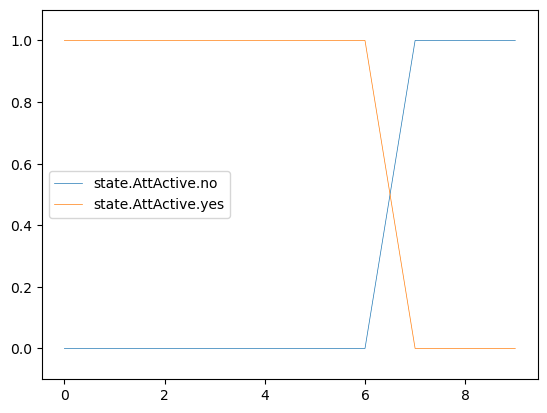

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.000000           1.000000e+00            Nop    EnumAccounts   
3              0.000010           9.999905e-01            Nop      PrivEscAcc   
4              0.007043           9.929575e-01            Nop       FileRecon   
5              0.000949           9.990511e-01            Nop  ManipulateData   
6              0.084911           9.150890e-01            Nop            Exit   
7              0.999990           9.519814e-06            Nop             Nop   
8              1.000000           9.723937e-09            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

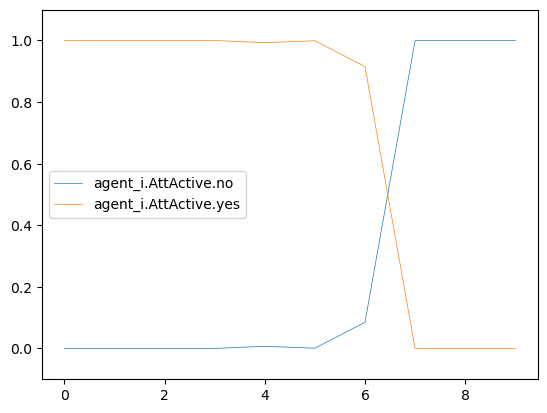

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                   user_files                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                         none                           success

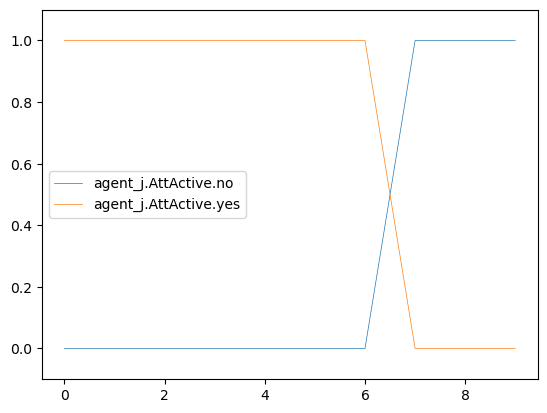

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

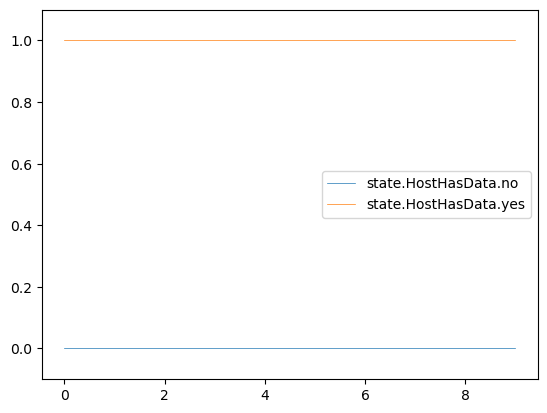

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

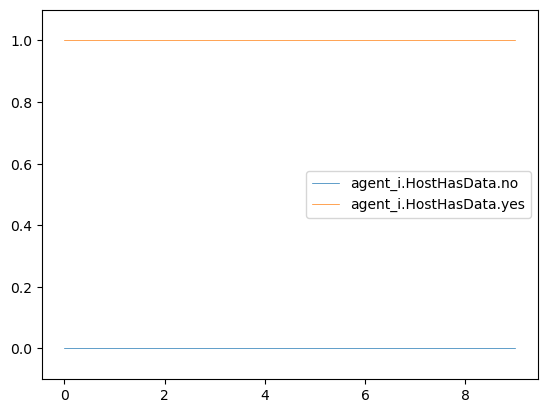

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623596                 0.376405    EnumAccounts   
3                0.623595                 0.376404      PrivEscAcc   
4                0.623595                 0.376405       FileRecon   
5                0.182762                 0.817238  ManipulateData   
6                0.000230                 0.999770            Exit   
7                0.000230                 0.999770             Nop   
8                0.000230                 0.999770             Nop   
9                0.000230                 0.999770             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

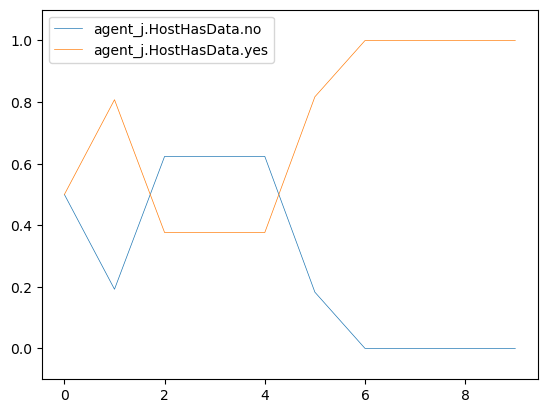

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

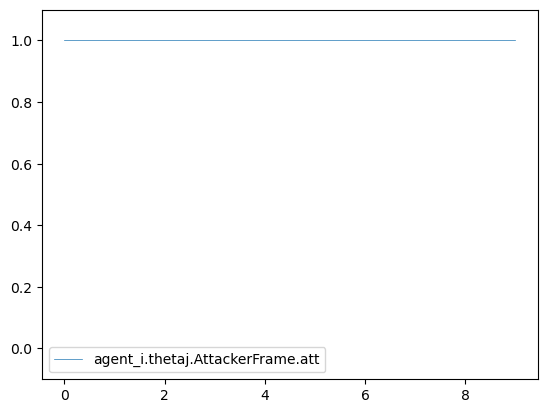

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.382353                        0.617647   
4                         0.333395                        0.666605   
5                         0.333359                        0.666641   
6                         0.333344                        0.666656   
7                         0.333344                        0.666656   
8                         0.333344                        0.666656   
9                         0.333344                        0.666656   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

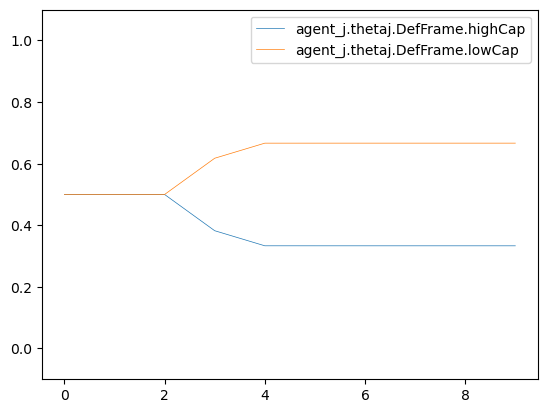

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

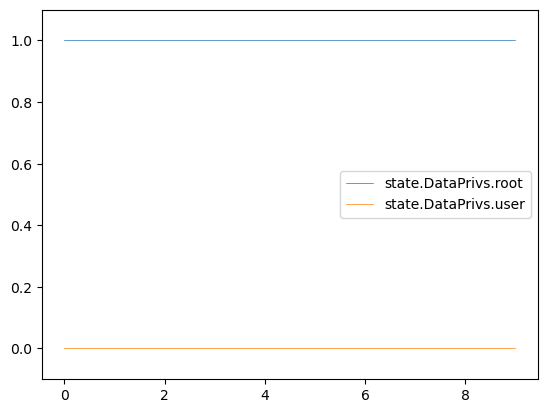

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                             none  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

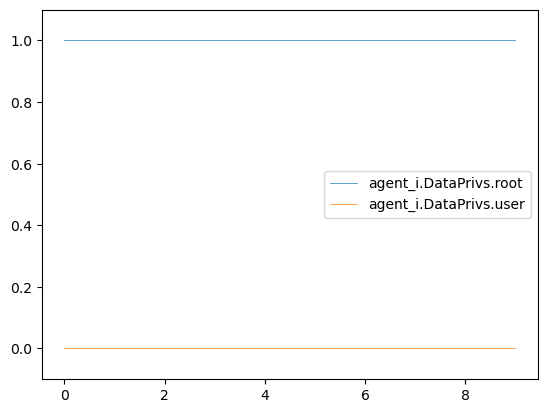

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623596                0.376405    EnumAccounts   
3                0.623595                0.376404      PrivEscAcc   
4                0.623595                0.376405       FileRecon   
5                0.767448                0.232552  ManipulateData   
6                0.827012                0.172988            Exit   
7                0.827012                0.172988             Nop   
8                0.827012                0.172988             Nop   
9                0.827012                0.172988             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

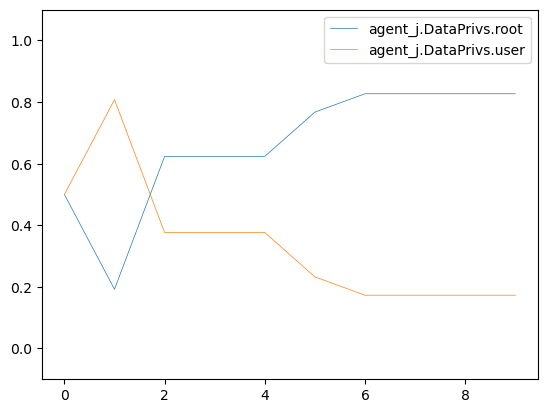

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

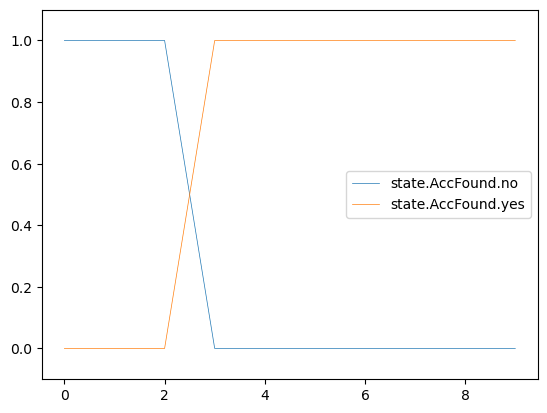

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop    EnumAccounts   
3                  1.0                   0.0            Nop      PrivEscAcc   
4                  1.0                   0.0            Nop       FileRecon   
5                  1.0                   0.0            Nop  ManipulateData   
6                  1.0                   0.0            Nop            Exit   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

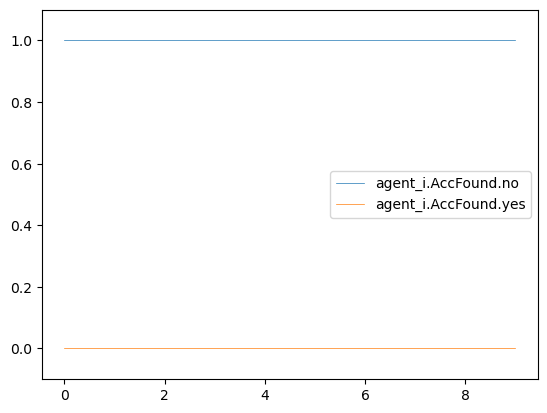

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData            Nop   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.205882              0.794118      PrivEscAcc            Nop   
4             0.000259              0.999741       FileRecon            Nop   
5             0.000108              0.999892  ManipulateData            Nop   
6             0.000045              0.999955            Exit            Nop   
7             0.000045              0.999955             Nop            Nop   
8             0.000045              0.999955             Nop            Nop   
9             0.000045              0.999955             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

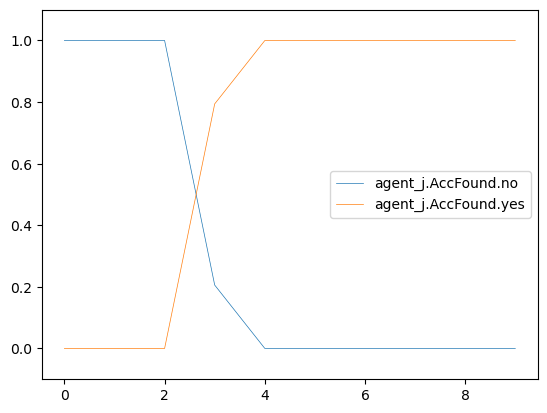

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

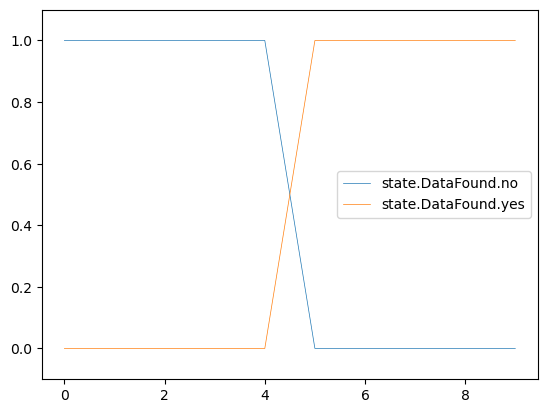

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop    EnumAccounts   
3                   1.0                    0.0            Nop      PrivEscAcc   
4                   1.0                    0.0            Nop       FileRecon   
5                   1.0                    0.0            Nop  ManipulateData   
6                   1.0                    0.0            Nop            Exit   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

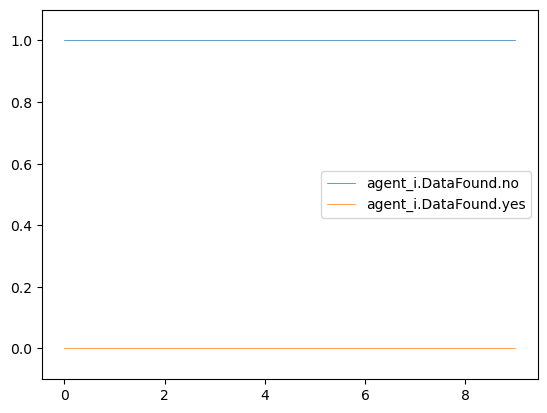

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.307692               0.692308  ManipulateData            Nop   
2              0.997753               0.002247    EnumAccounts            Nop   
3              0.997753               0.002247      PrivEscAcc            Nop   
4              0.997753               0.002247       FileRecon            Nop   
5              0.204712               0.795288  ManipulateData            Nop   
6              0.000258               0.999742            Exit            Nop   
7              0.000258               0.999742             Nop            Nop   
8              0.000258               0.999742             Nop            Nop   
9              0.000258               0.999742             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

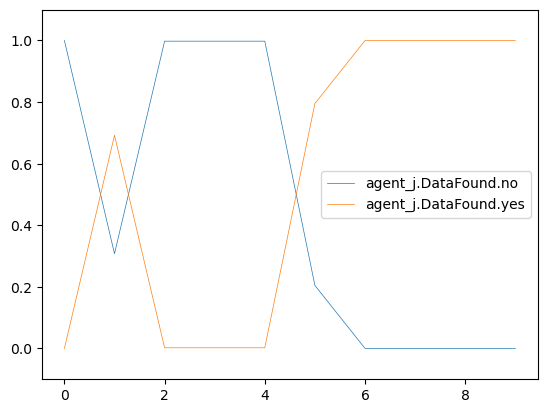

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

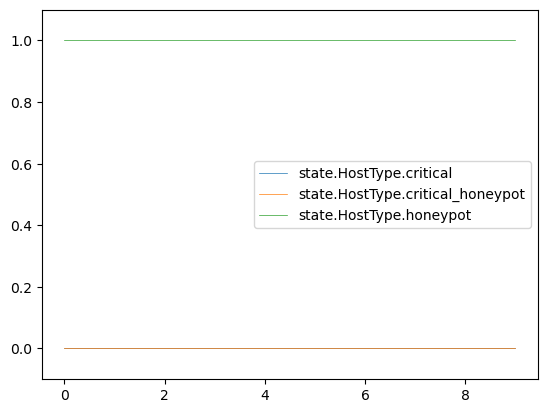

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

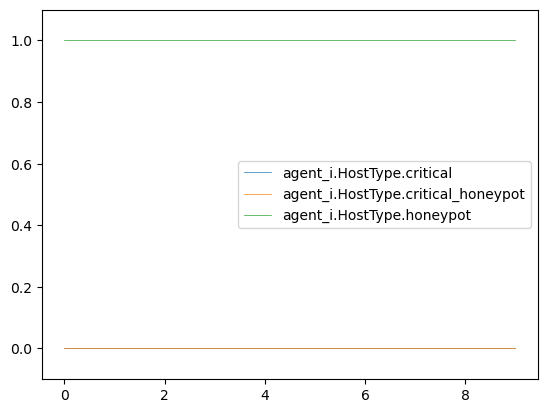

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0  ManipulateData            Nop   
2                        0.0    EnumAccounts            Nop   
3                        0.0      PrivEscAcc            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

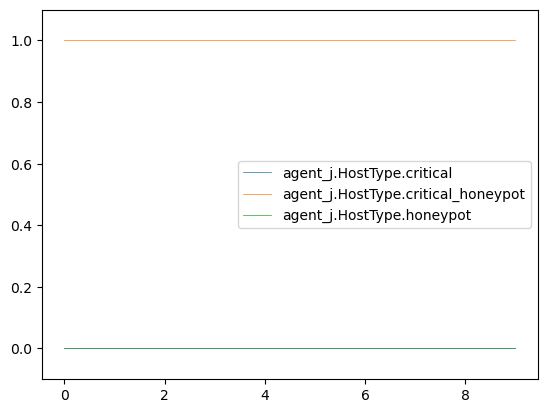

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

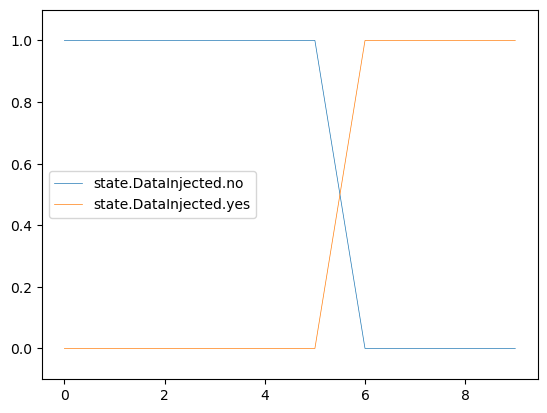

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                             none  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

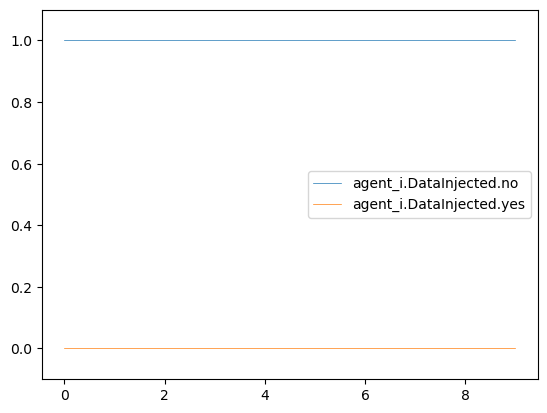

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.994073                  0.005927  ManipulateData   
6                 0.000258                  0.999742            Exit   
7                 0.000258                  0.999742             Nop   
8                 0.000258                  0.999742             Nop   
9                 0.000258                  0.999742             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

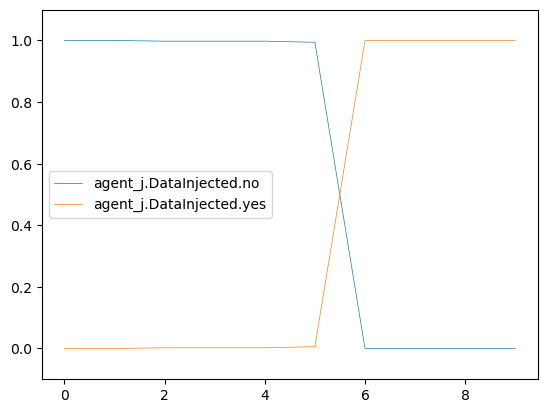

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

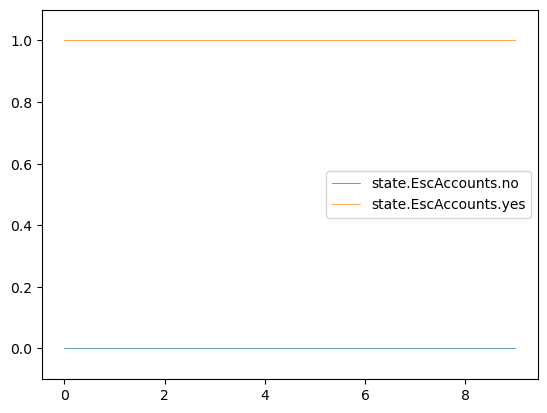

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                             none  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

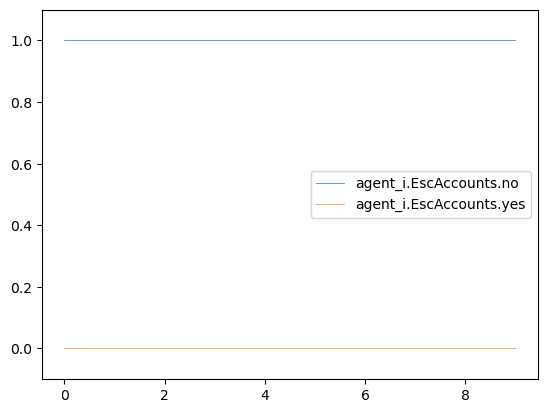

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.625000                 0.375000    EnumAccounts   
3                0.183824                 0.816176      PrivEscAcc   
4                0.000232                 0.999768       FileRecon   
5                0.000096                 0.999904  ManipulateData   
6                0.000040                 0.999960            Exit   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

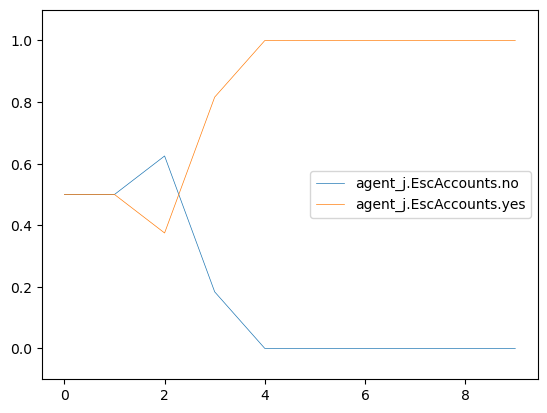

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

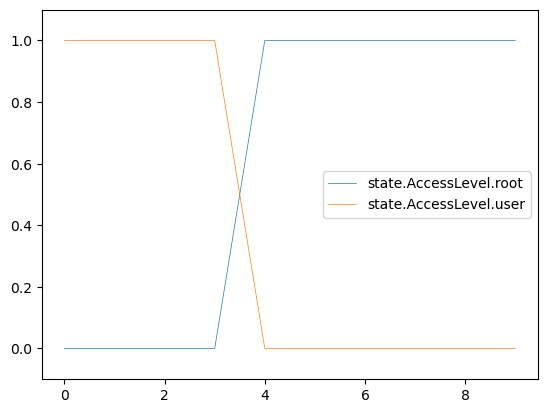

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                             none  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

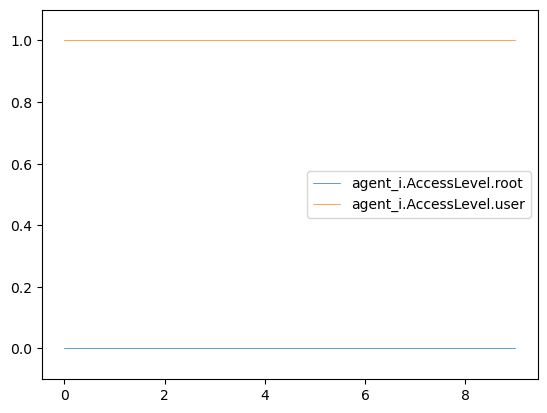

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999741                  0.000259       FileRecon   
5                  0.999892                  0.000108  ManipulateData   
6                  0.999955                  0.000045            Exit   
7                  0.999955                  0.000045             Nop   
8                  0.999955                  0.000045             Nop   
9                  0.999955                  0.000045             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

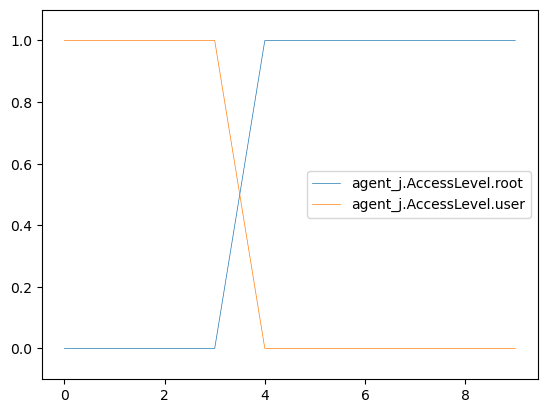

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

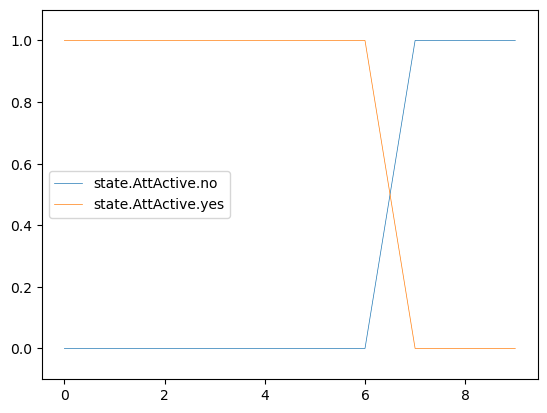

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.000000           1.000000e+00            Nop    EnumAccounts   
3              0.081596           9.184040e-01            Nop      PrivEscAcc   
4              0.015971           9.840289e-01            Nop       FileRecon   
5              0.001061           9.989395e-01            Nop  ManipulateData   
6              0.084921           9.150792e-01            Nop            Exit   
7              0.999991           9.519707e-06            Nop             Nop   
8              1.000000           9.723827e-09            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                             none  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

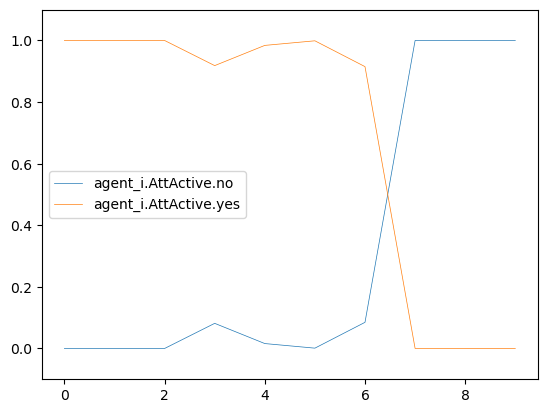

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

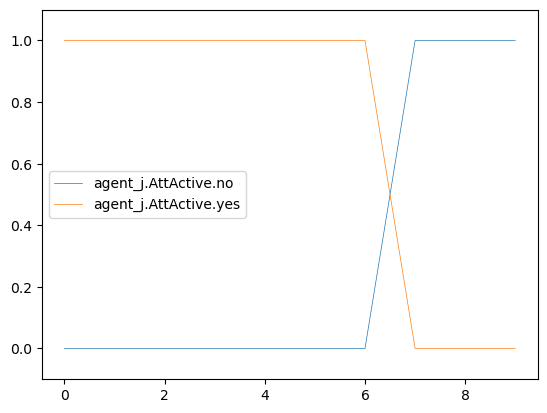

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

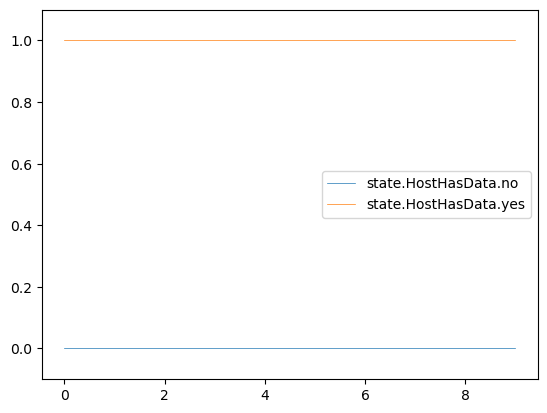

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                             none  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

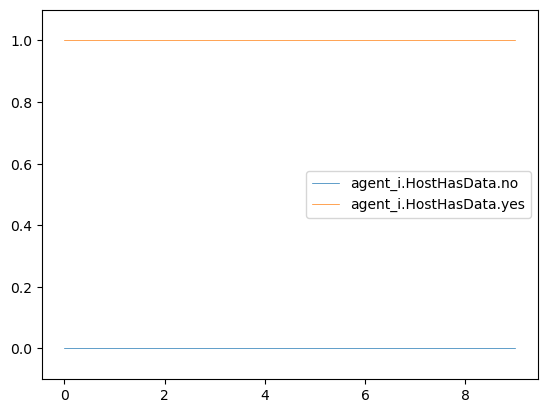

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623596                 0.376405    EnumAccounts   
3                0.623595                 0.376404      PrivEscAcc   
4                0.623595                 0.376405       FileRecon   
5                0.182762                 0.817238  ManipulateData   
6                0.000230                 0.999770            Exit   
7                0.000230                 0.999770             Nop   
8                0.000230                 0.999770             Nop   
9                0.000230                 0.999770             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

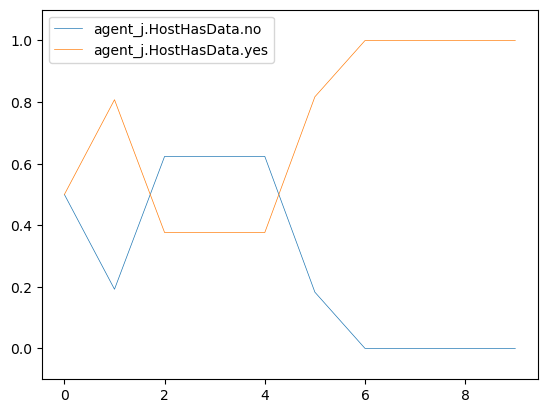

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                   login_activity

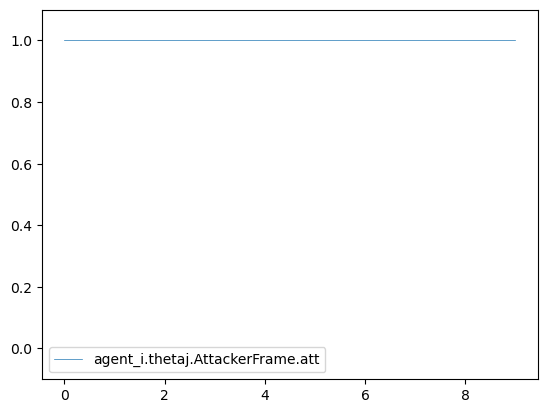

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           success

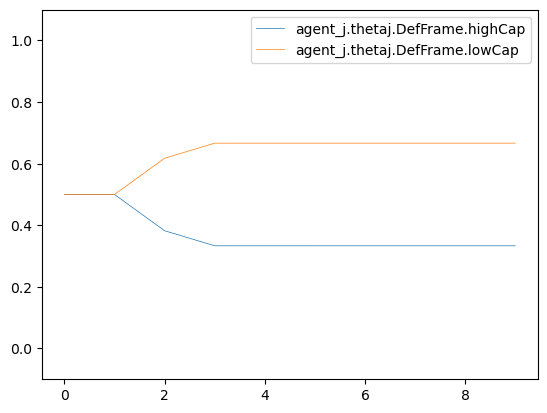

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

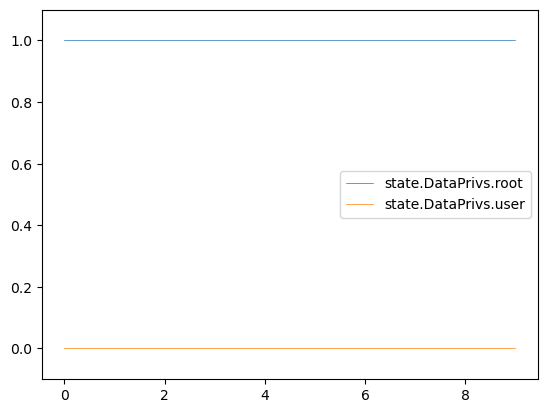

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

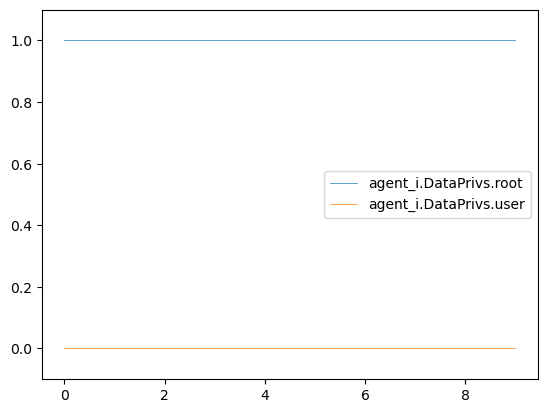

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           success

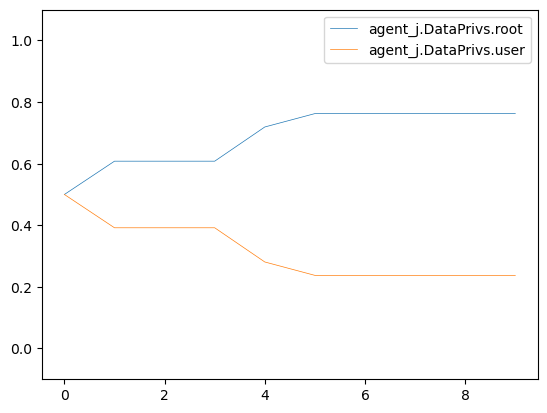

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

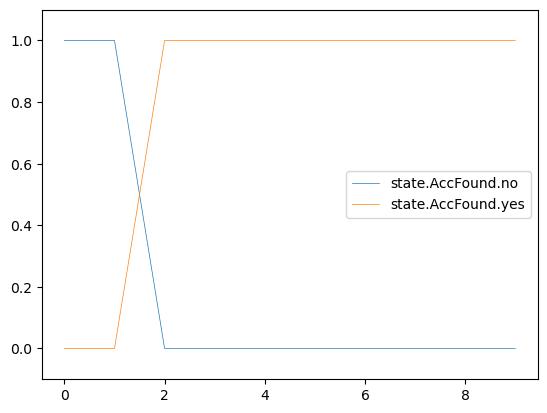

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

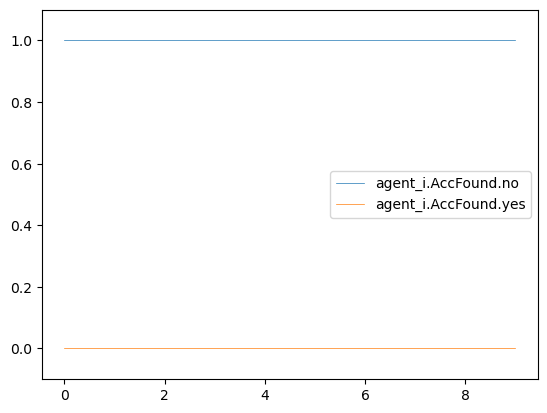

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           success

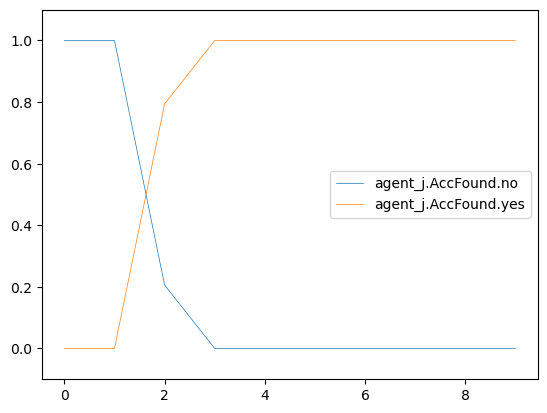

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

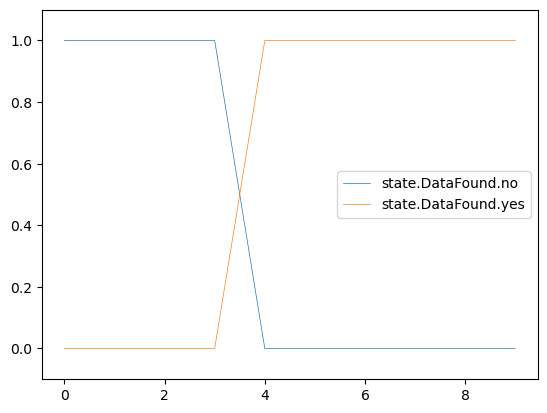

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

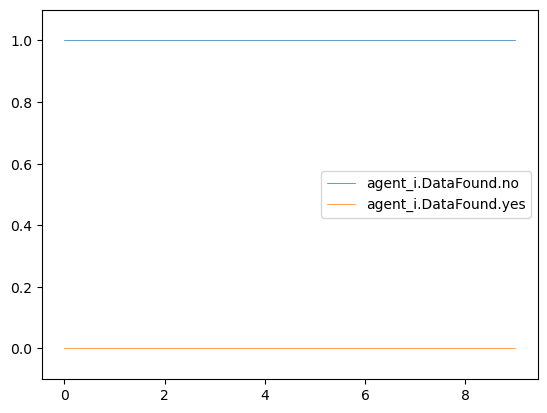

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           success

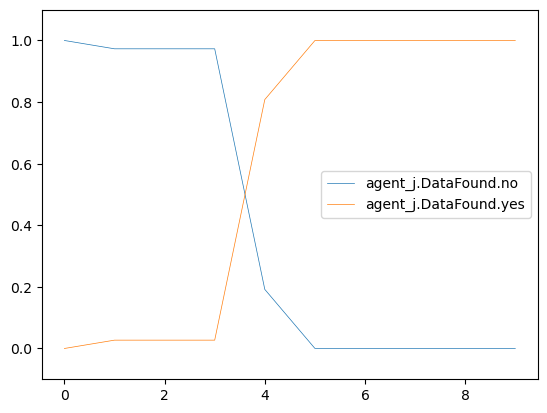

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

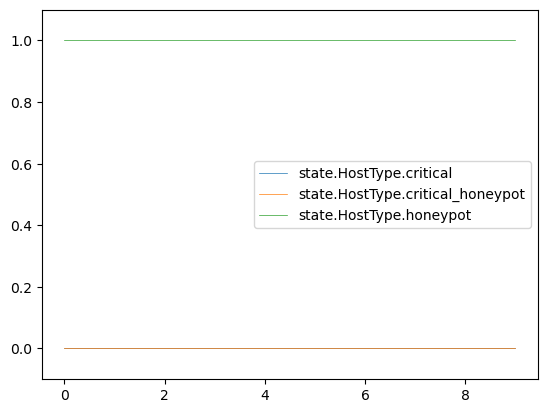

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

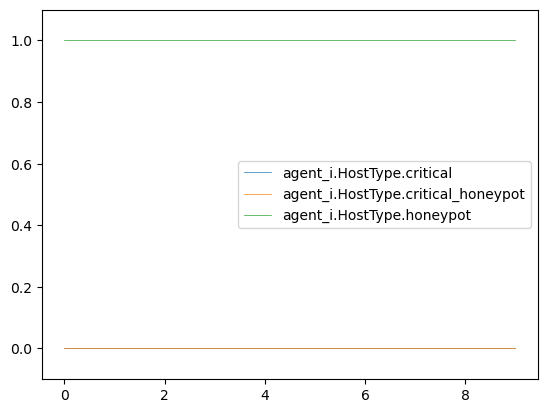

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           success

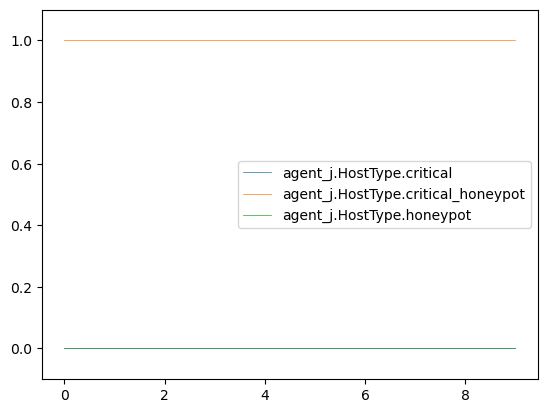

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

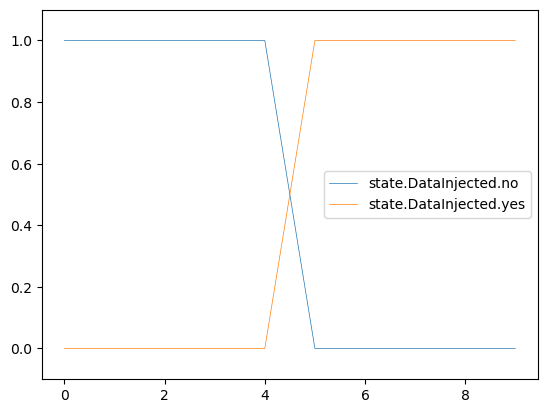

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

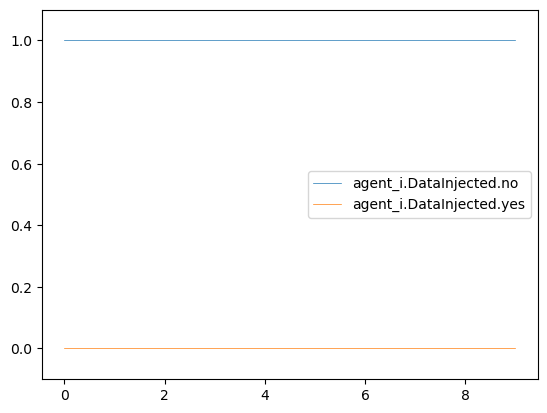

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           success

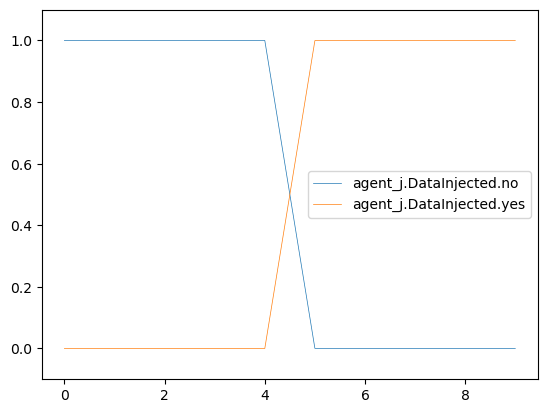

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

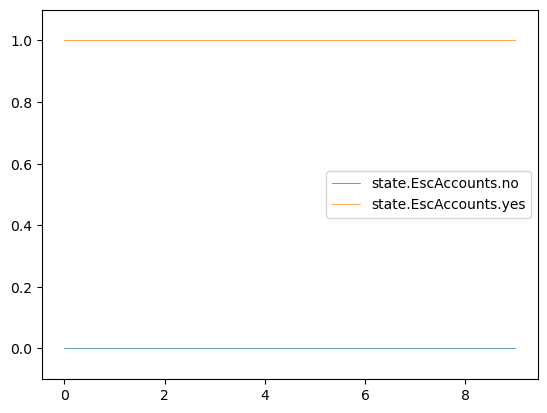

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

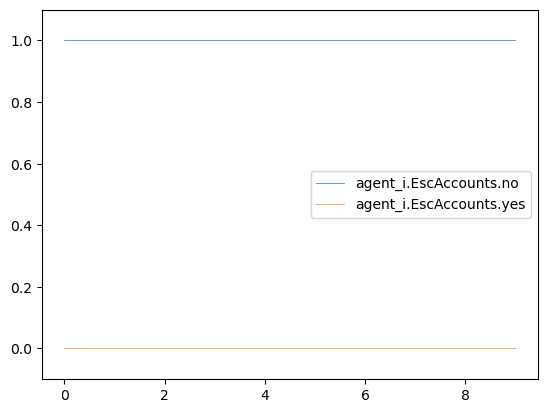

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           success

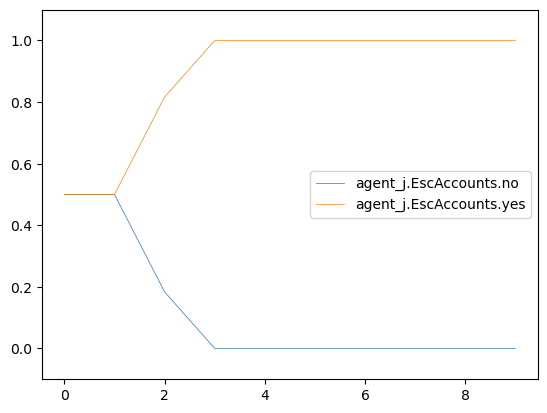

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

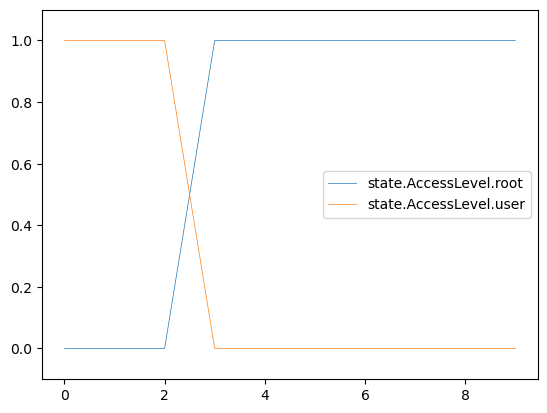

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

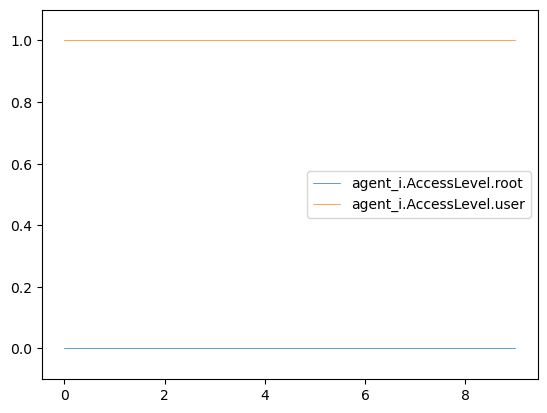

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           success

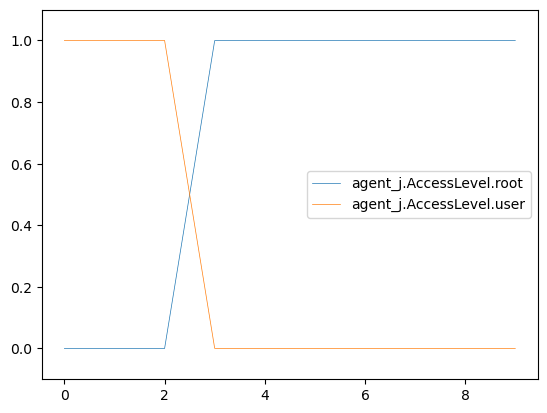

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

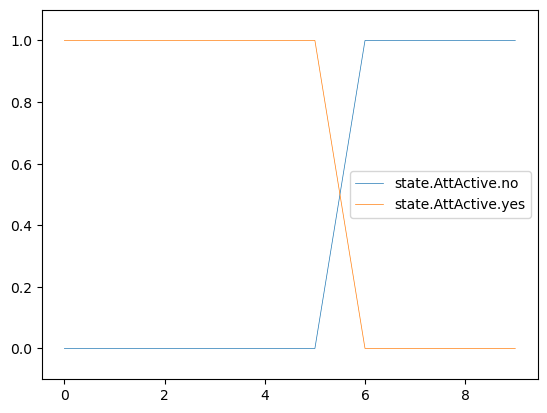

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0          0.000000e+00           1.000000e+00            Nop       FileRecon   
1          0.000000e+00           1.000000e+00            Nop    EnumAccounts   
2          0.000000e+00           1.000000e+00            Nop      PrivEscAcc   
3          1.080520e-07           9.999999e-01            Nop       FileRecon   
4          8.599650e-04           9.991401e-01            Nop  ManipulateData   
5          8.490333e-02           9.150966e-01            Nop            Exit   
6          9.999905e-01           9.518896e-06            Nop             Nop   
7          1.000000e+00           9.722988e-09            Nop             Nop   
8          1.000000e+00           1.256794e-19            Nop             Nop   
9          1.000000e+00           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

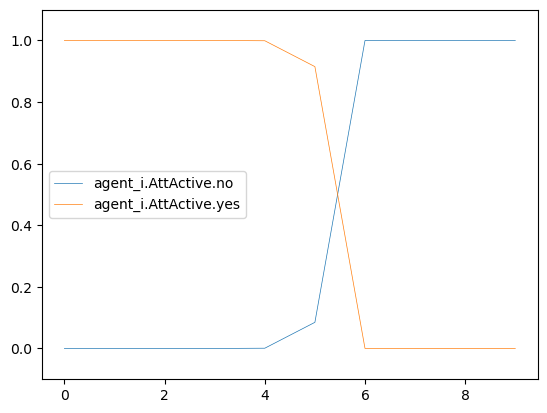

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           failure  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           success

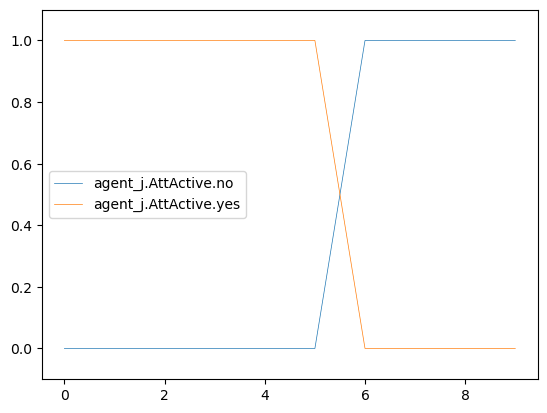

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

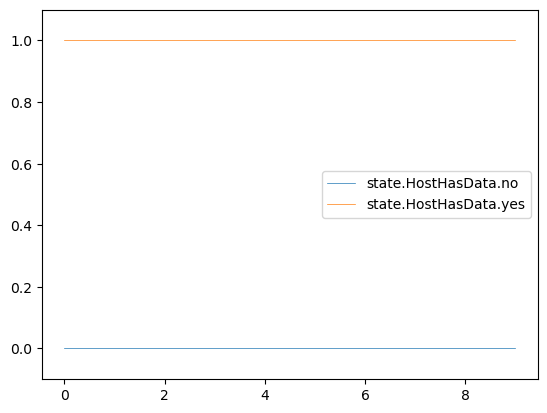

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                   login_activity

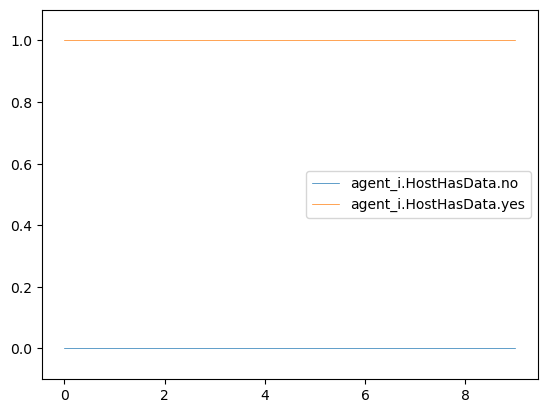

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           success

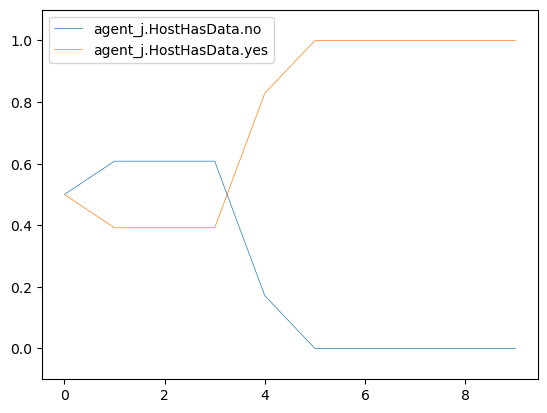

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

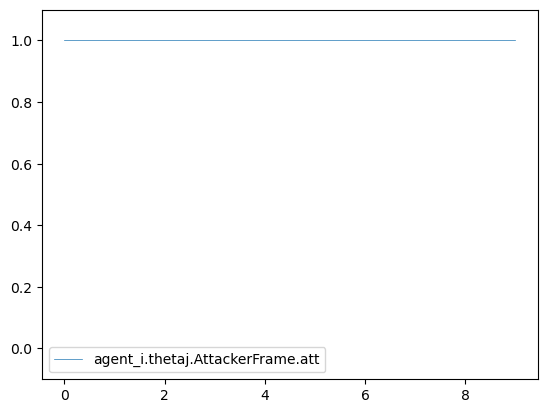

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

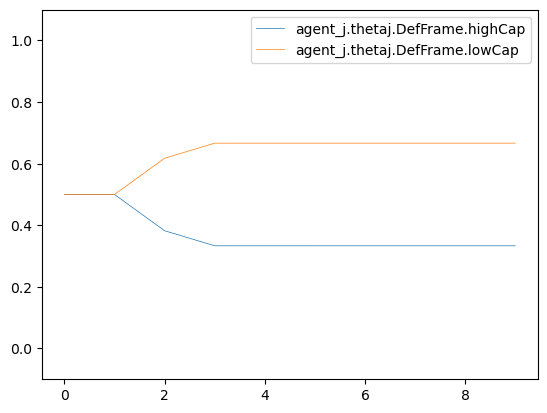

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

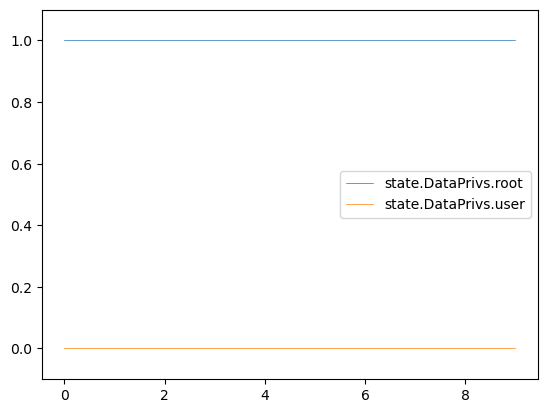

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

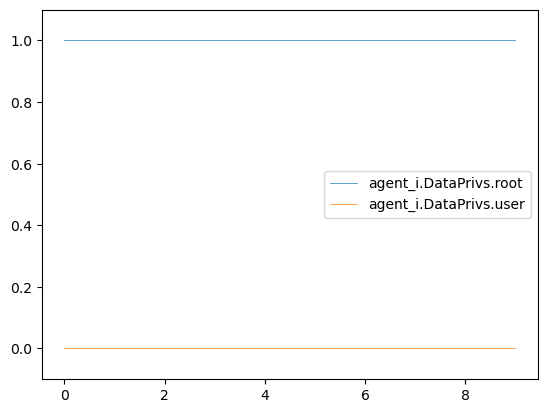

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           failure

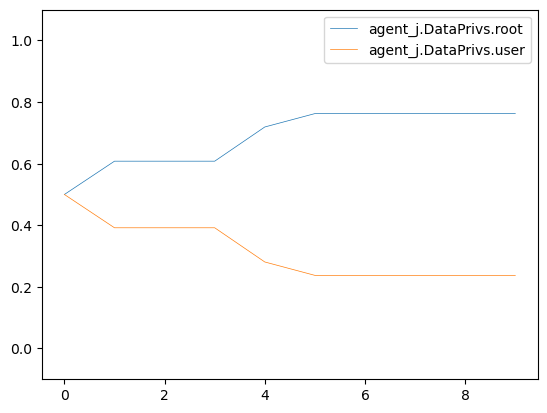

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

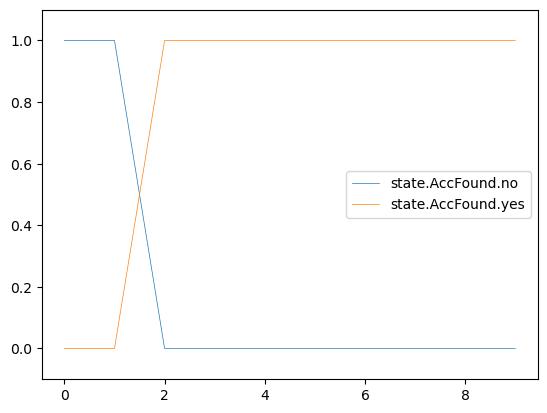

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

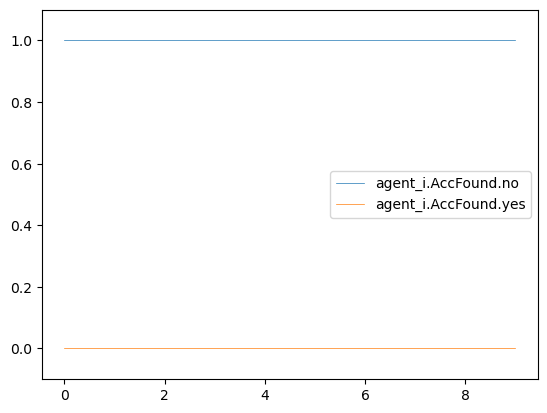

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

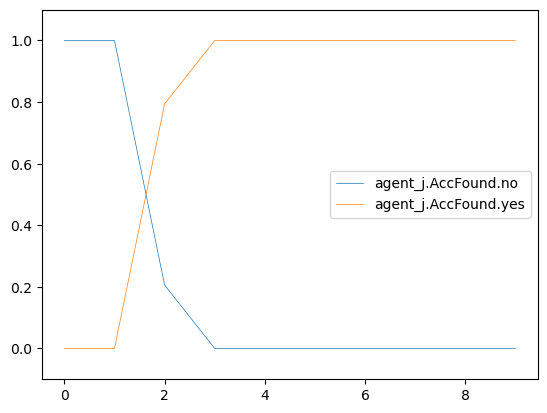

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

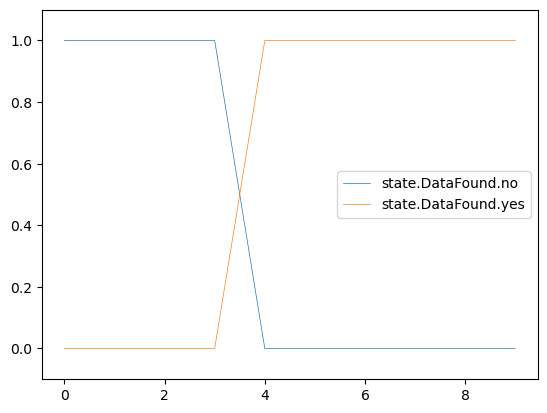

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

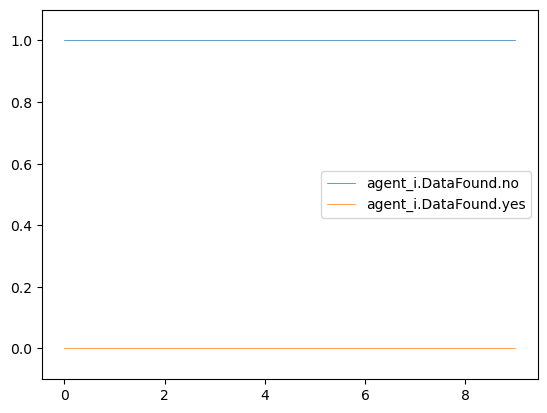

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

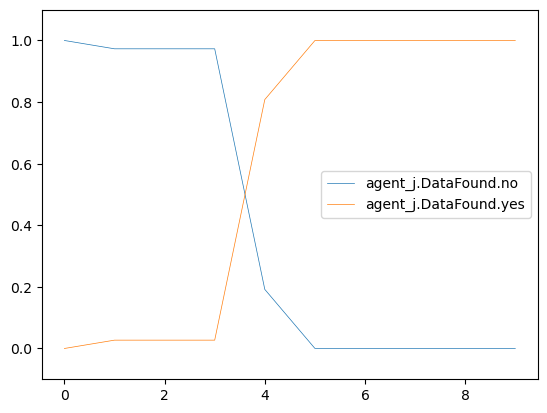

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

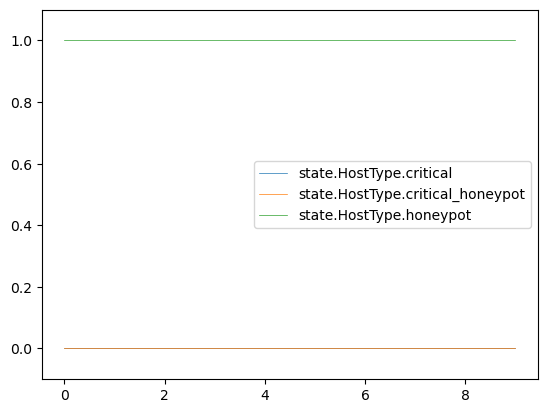

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

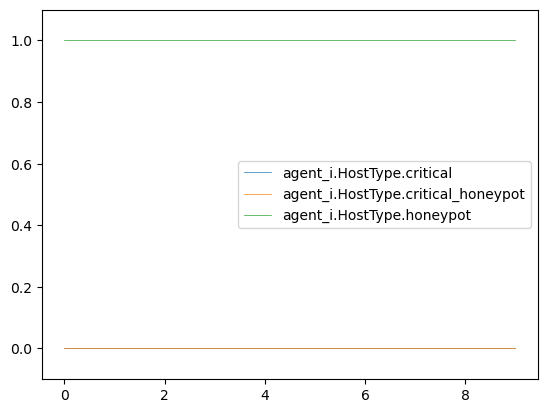

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

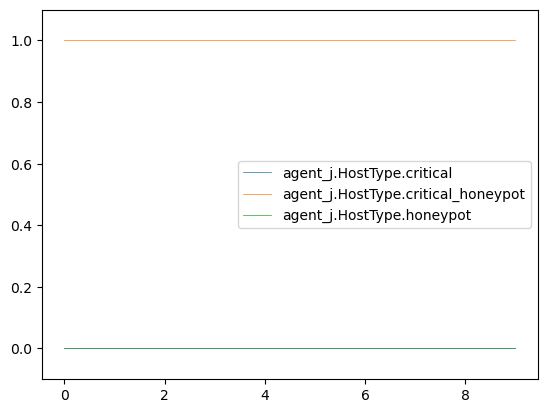

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

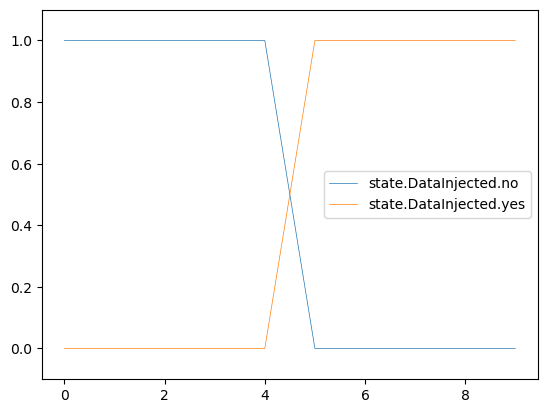

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

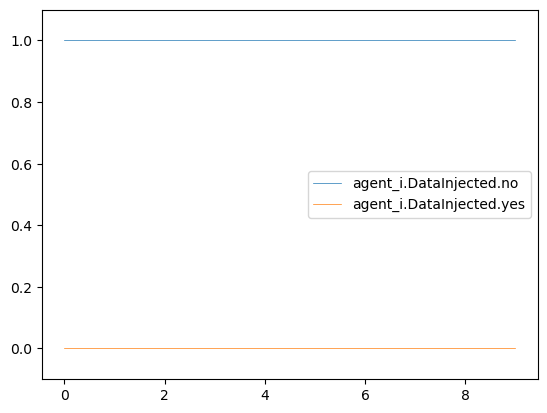

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           failure

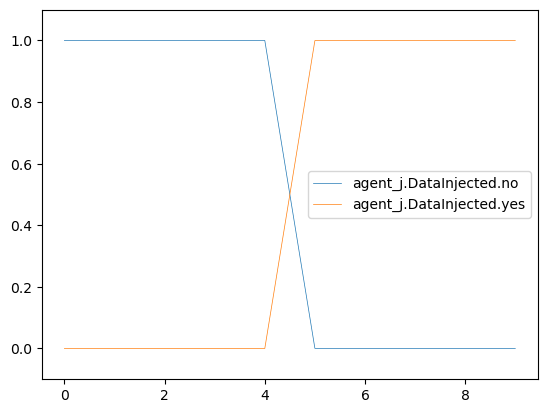

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

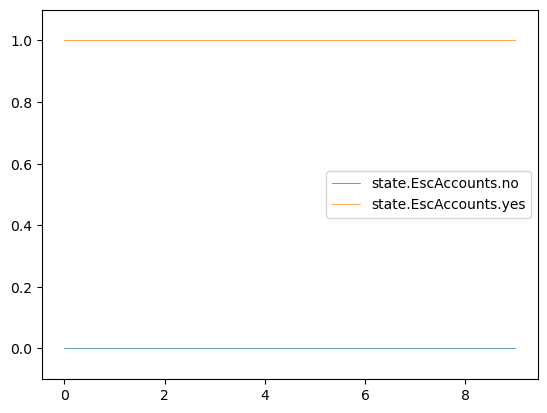

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

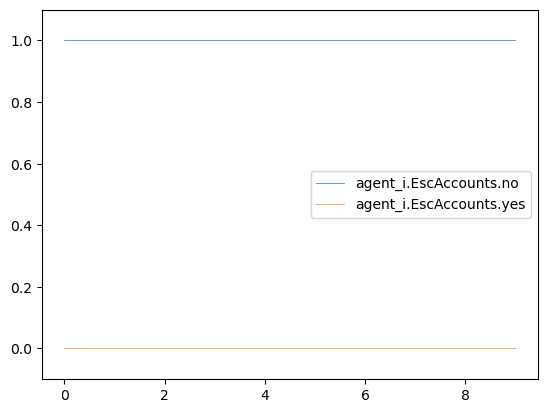

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           failure

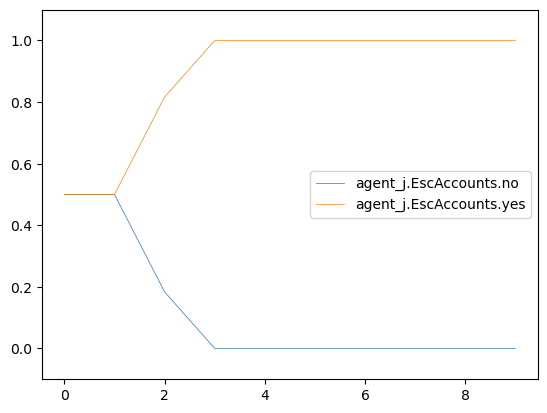

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

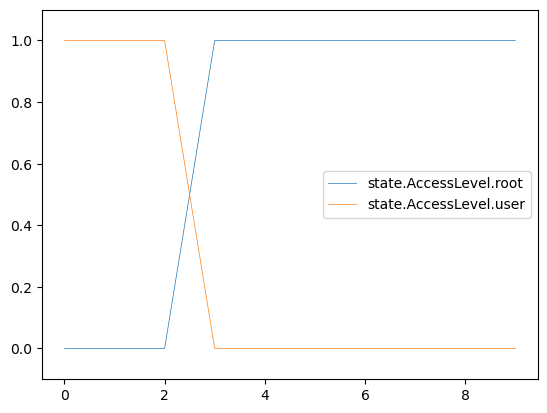

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

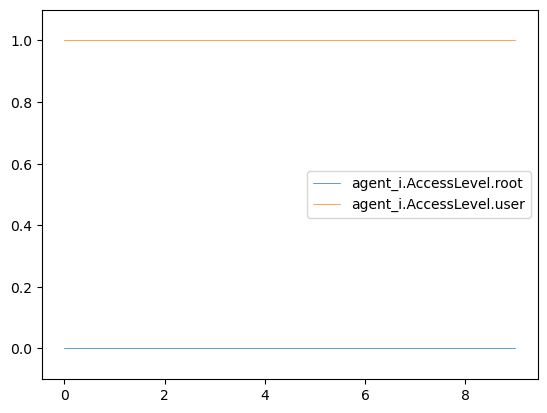

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           failure

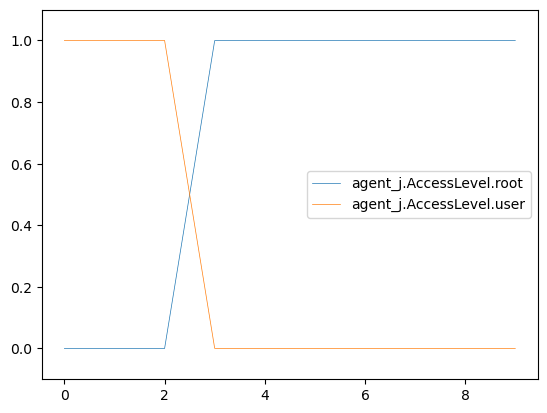

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

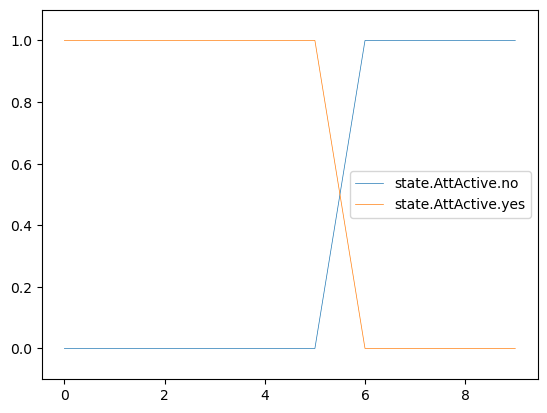

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0          0.000000e+00           1.000000e+00            Nop       FileRecon   
1          0.000000e+00           1.000000e+00            Nop    EnumAccounts   
2          0.000000e+00           1.000000e+00            Nop      PrivEscAcc   
3          1.080520e-07           9.999999e-01            Nop       FileRecon   
4          8.599650e-04           9.991401e-01            Nop  ManipulateData   
5          8.490333e-02           9.150966e-01            Nop            Exit   
6          9.999905e-01           9.518896e-06            Nop             Nop   
7          1.000000e+00           9.722988e-09            Nop             Nop   
8          1.000000e+00           1.256794e-19            Nop             Nop   
9          1.000000e+00           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

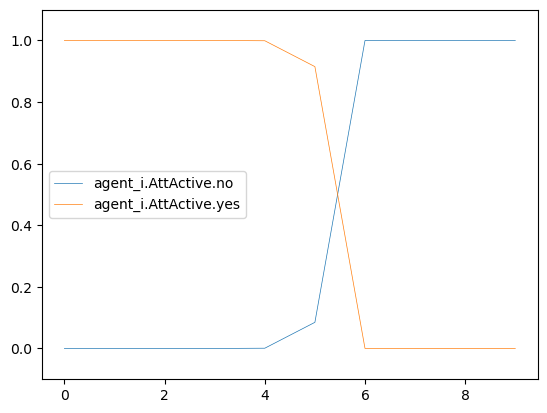

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                   user_files                           success  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           success  
8                         none                           success  
9                         none                           failure

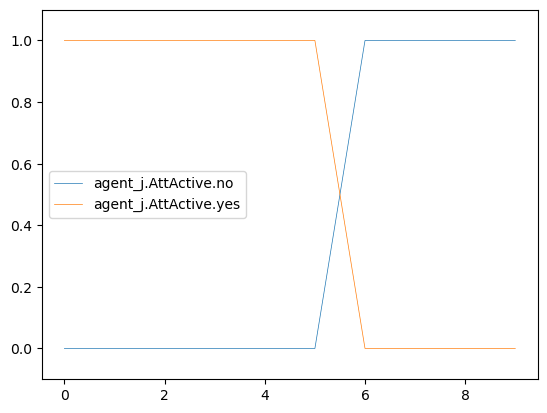

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

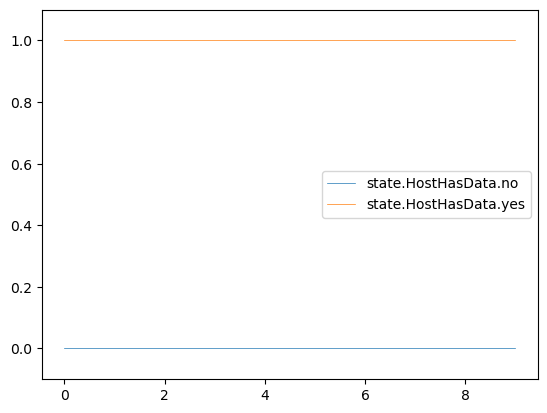

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

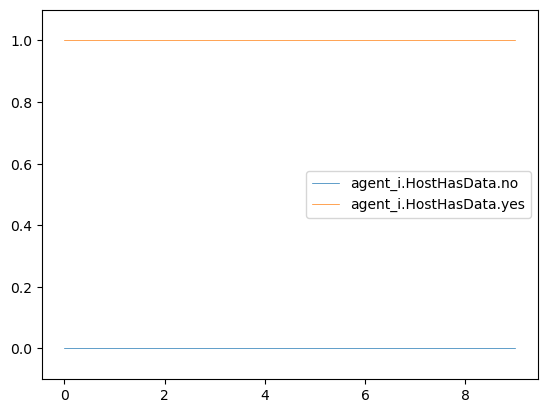

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           failure

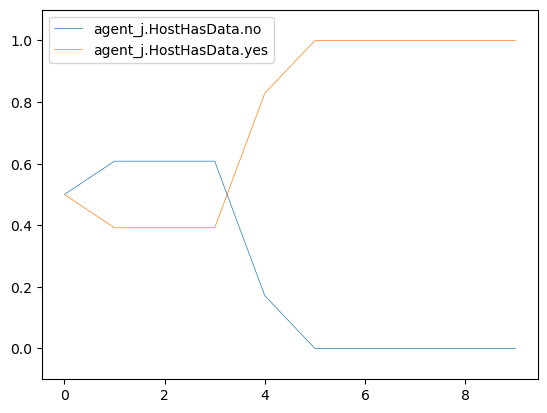

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                             none

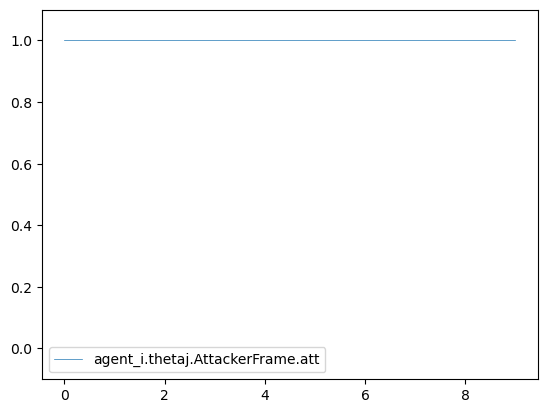

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

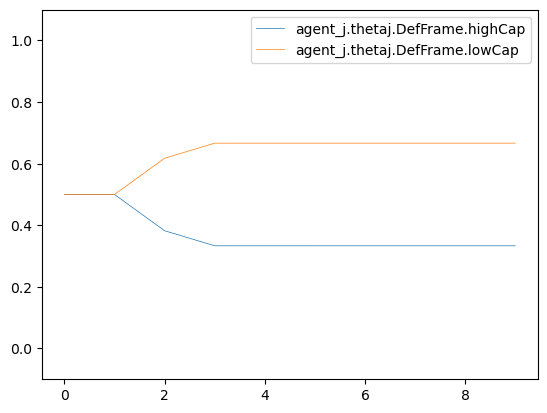

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

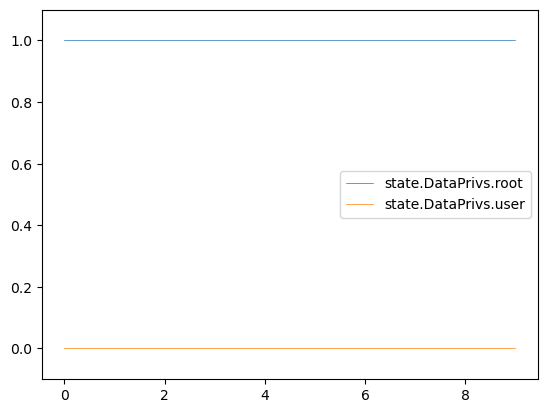

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

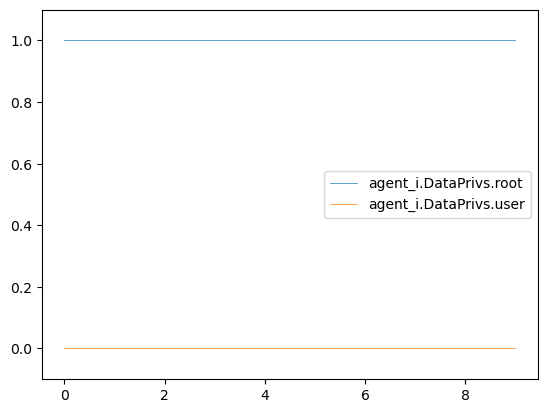

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

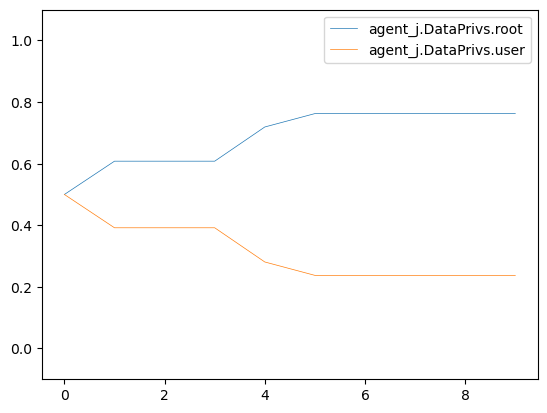

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

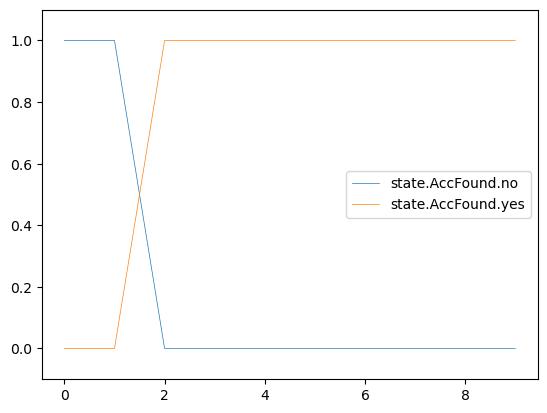

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

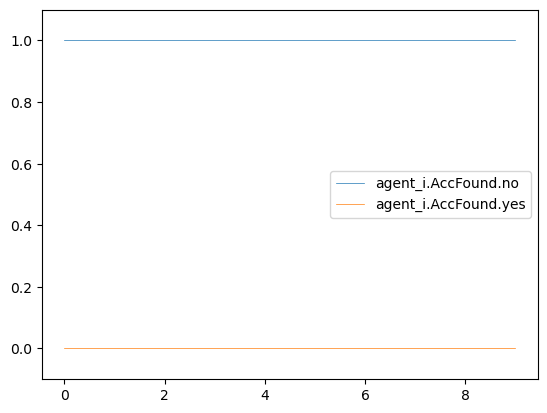

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

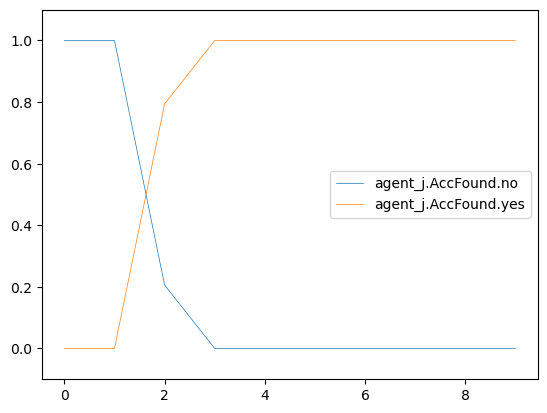

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

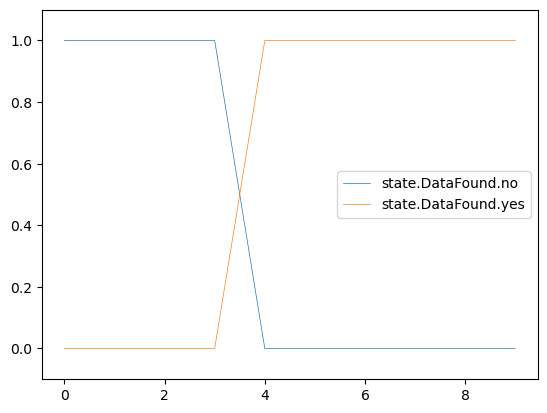

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

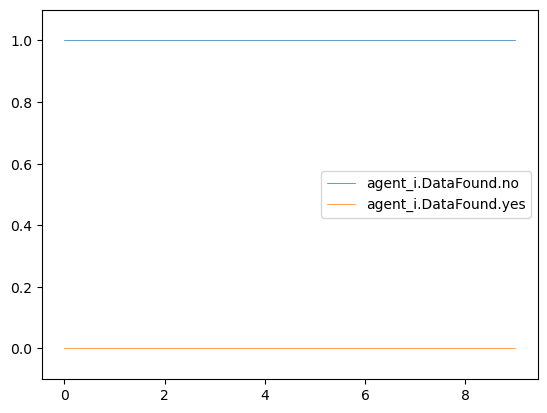

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

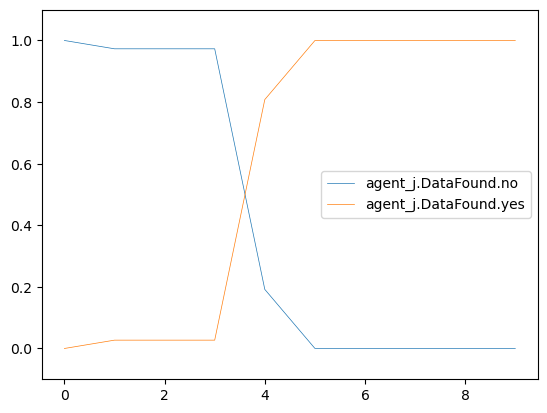

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

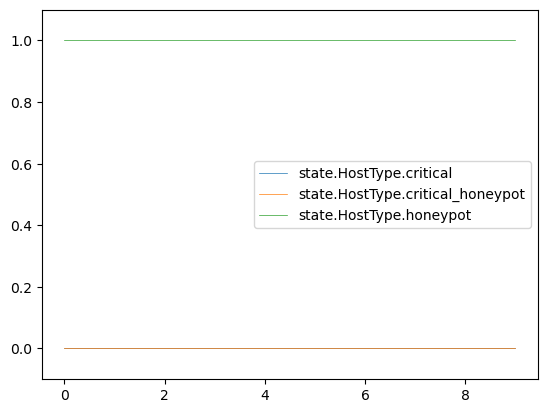

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

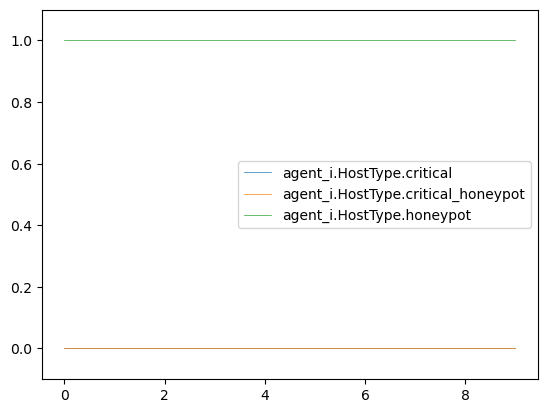

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

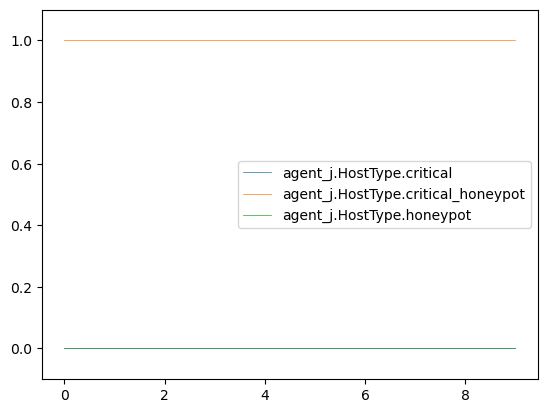

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

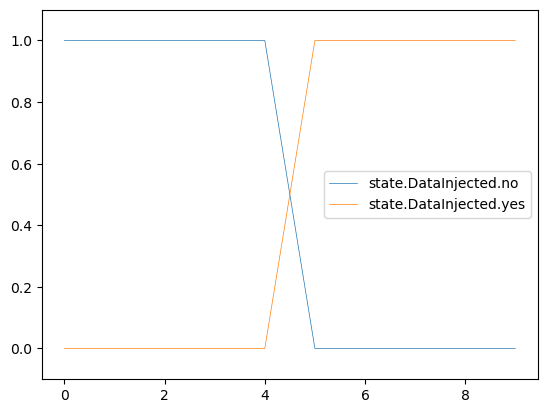

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

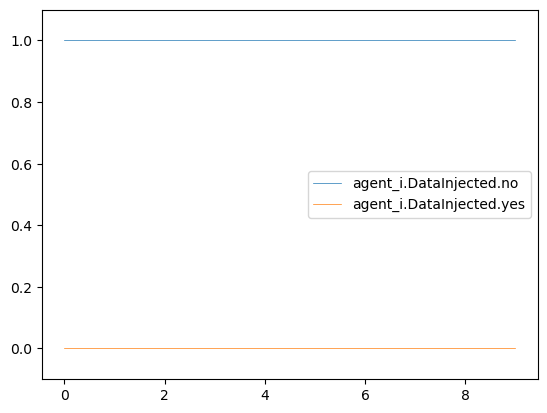

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

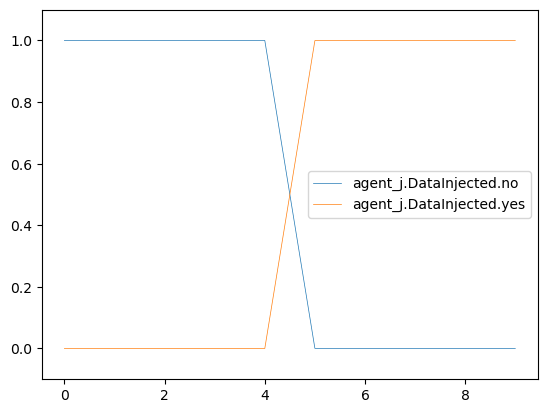

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

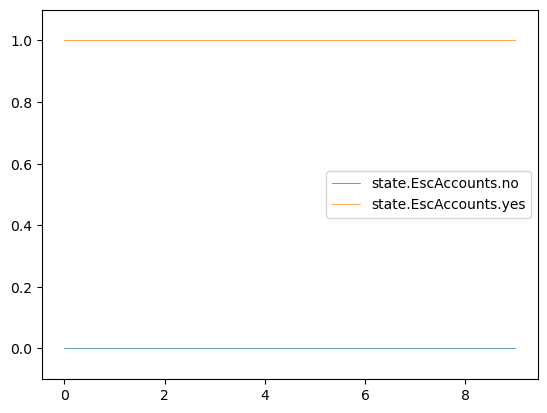

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

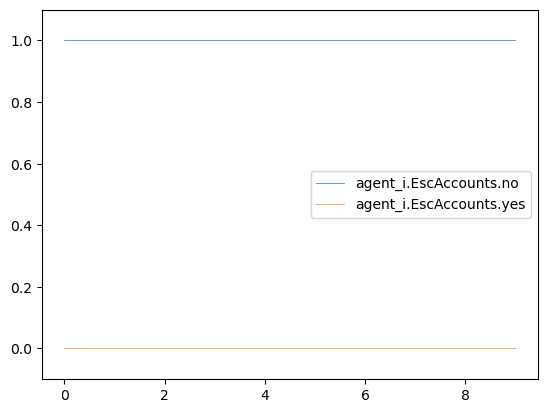

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

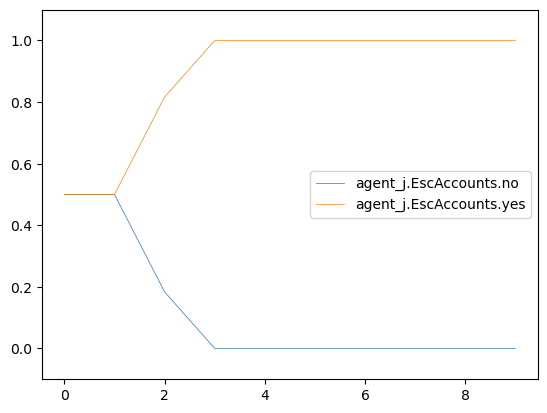

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

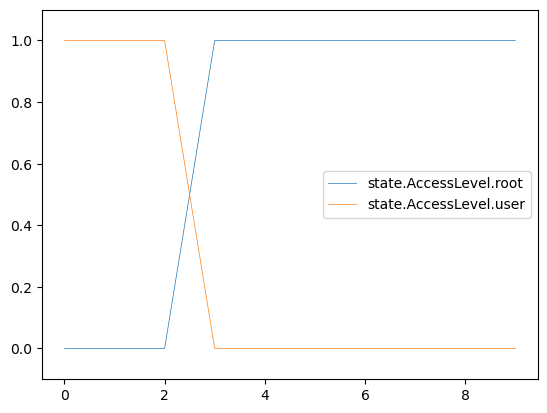

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

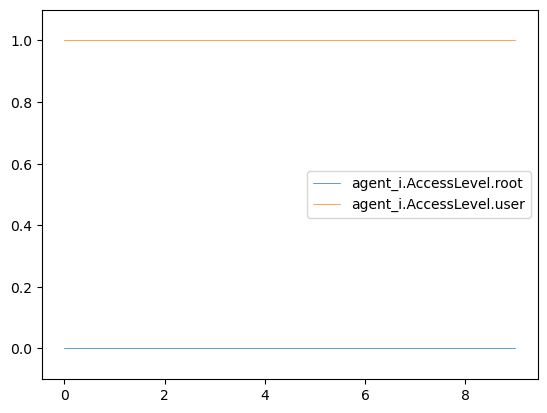

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

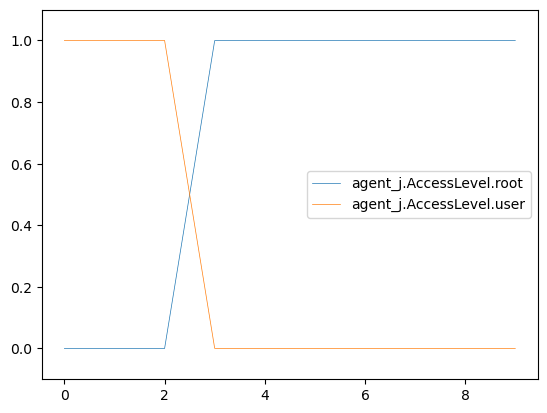

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

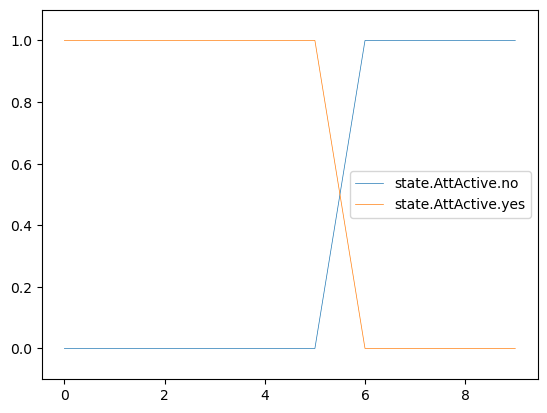

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0          0.000000e+00           1.000000e+00            Nop       FileRecon   
1          0.000000e+00           1.000000e+00            Nop    EnumAccounts   
2          0.000000e+00           1.000000e+00            Nop      PrivEscAcc   
3          1.080520e-07           9.999999e-01            Nop       FileRecon   
4          8.599650e-04           9.991401e-01            Nop  ManipulateData   
5          8.991964e-01           1.008036e-01            Nop            Exit   
6          9.999981e-01           1.956148e-06            Nop             Nop   
7          1.000000e+00           1.060824e-09            Nop             Nop   
8          1.000000e+00           1.330082e-18            Nop             Nop   
9          1.000000e+00           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                             none

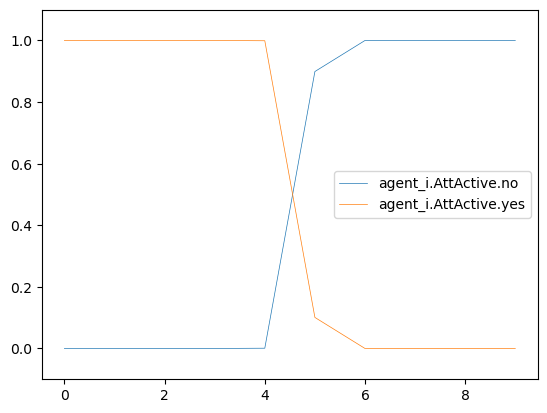

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

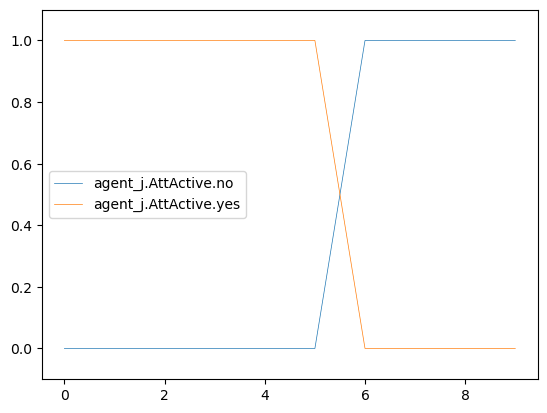

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

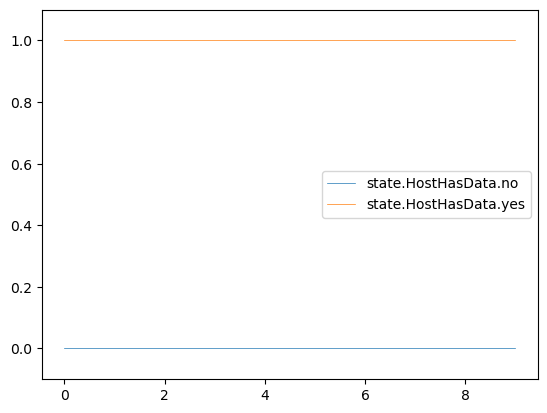

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                   login_activity  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                   login_activity  
9             Nop                             none

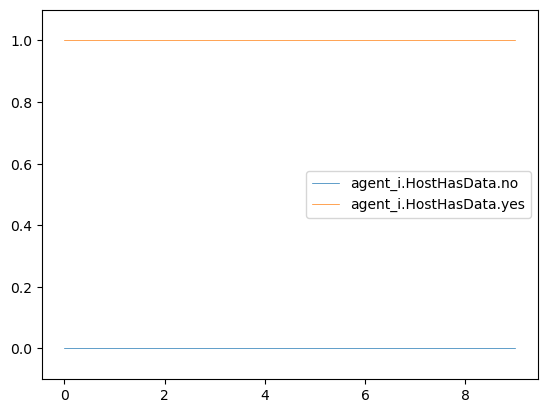

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           failure  
9                           failure

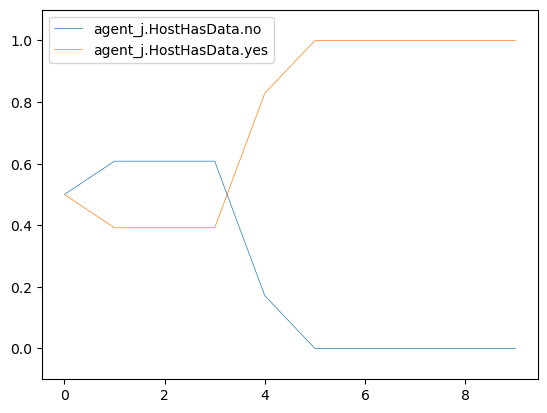

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                       file_write
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

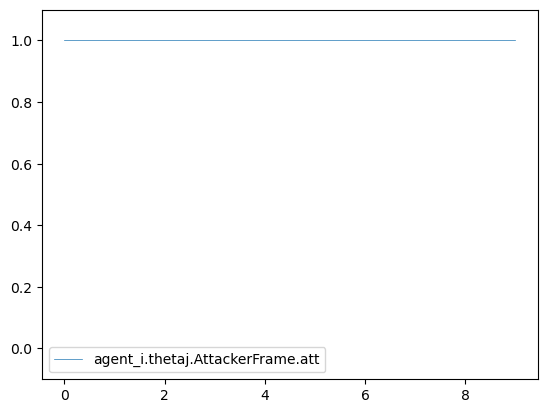

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                         none                           failure

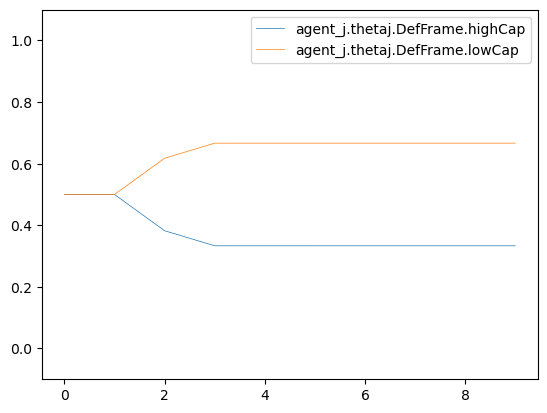

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

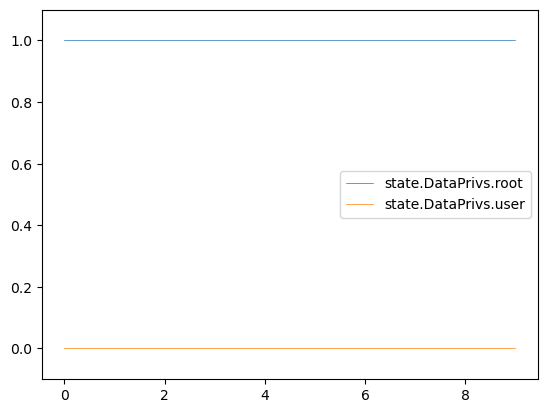

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

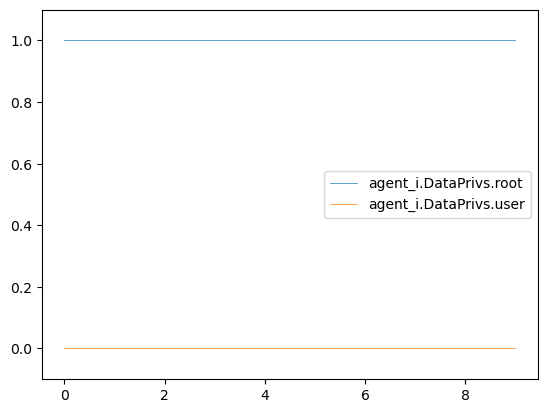

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

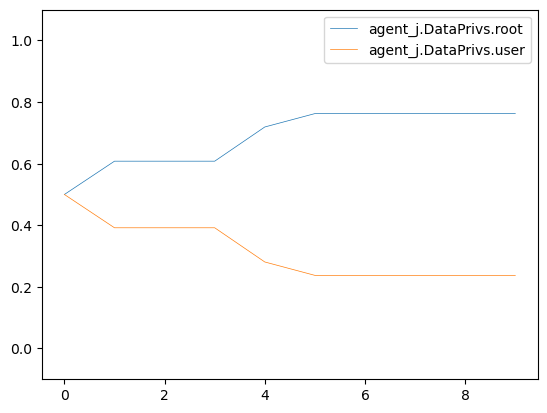

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

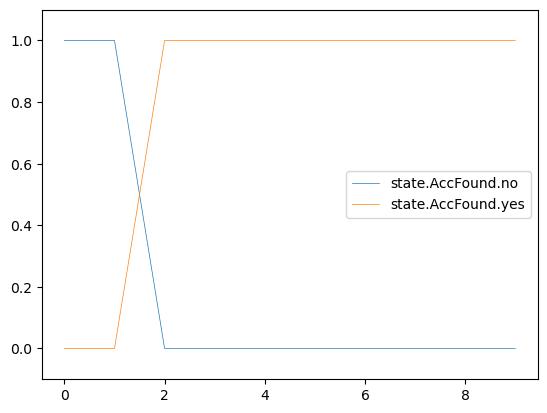

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

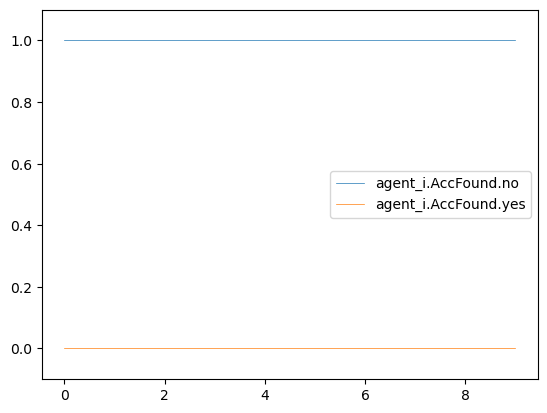

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                         none                           failure

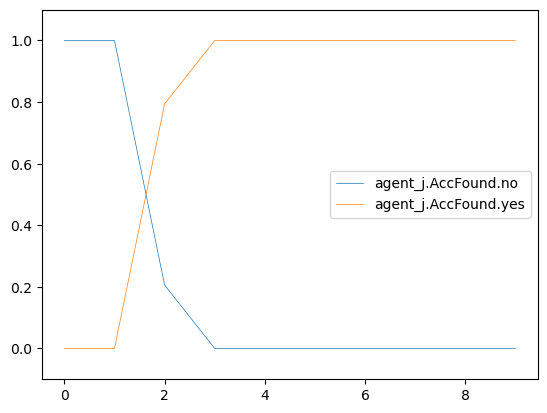

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

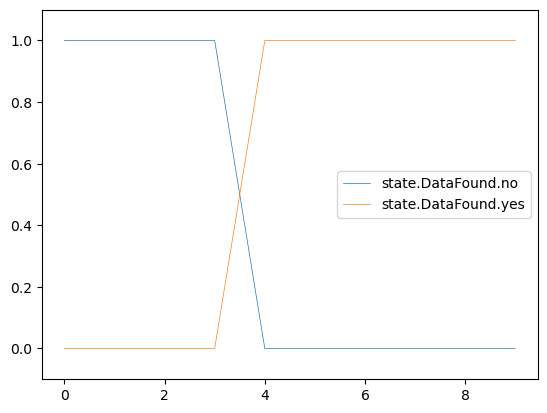

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

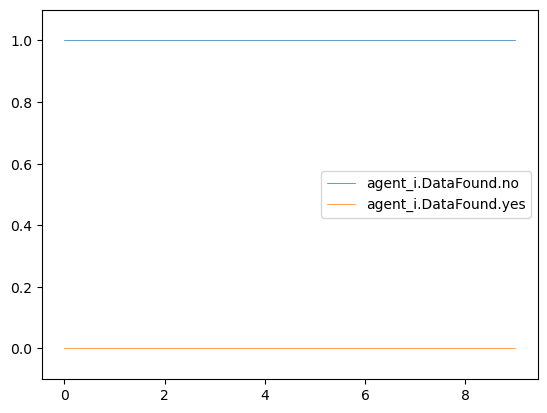

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                         none                           failure

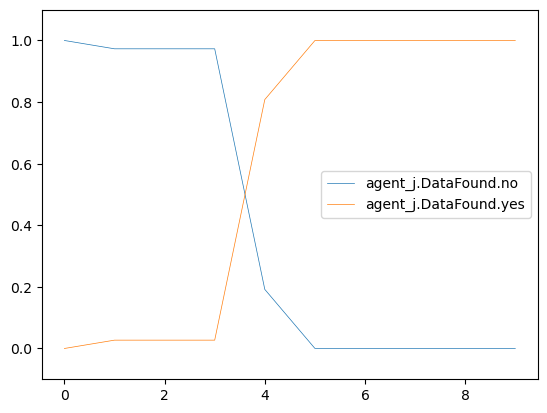

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

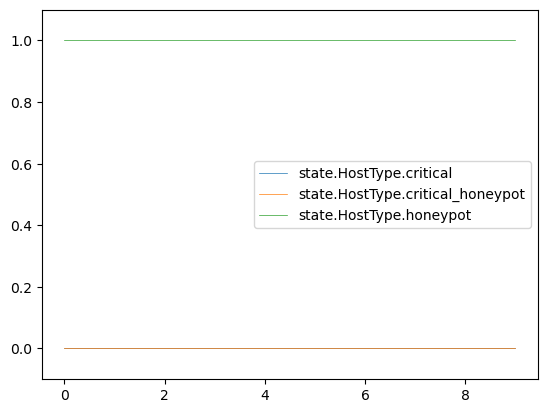

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

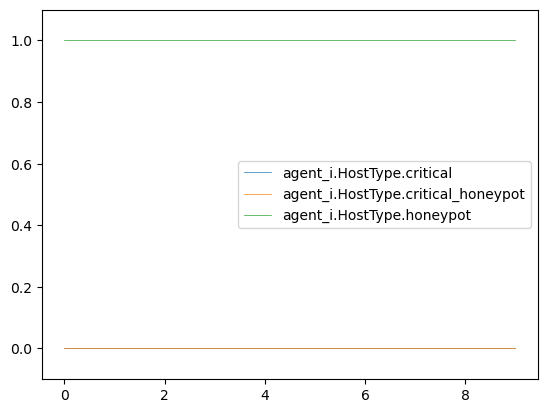

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                         none                           failure

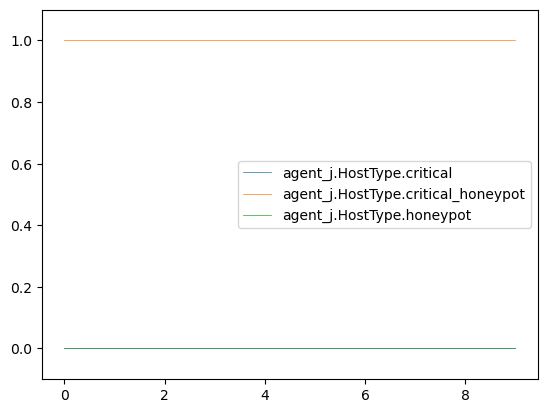

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

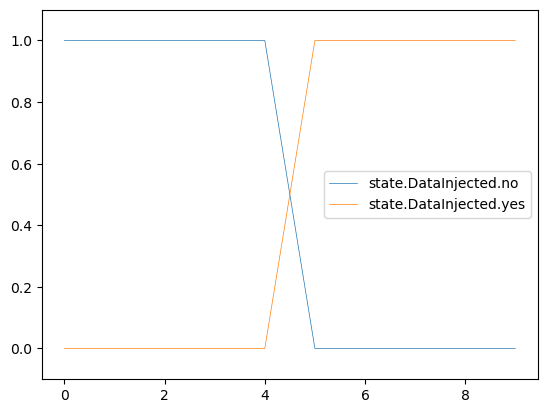

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

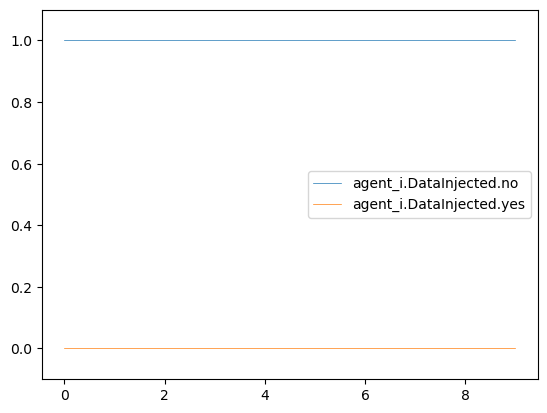

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

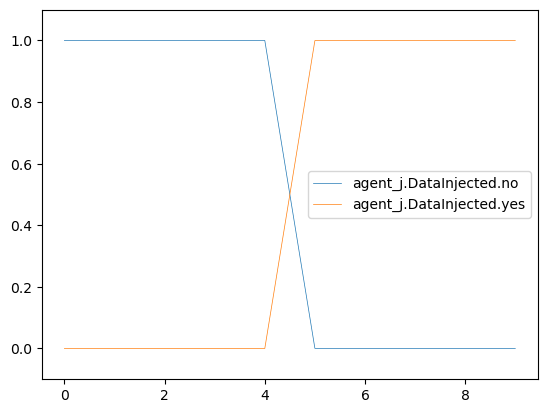

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

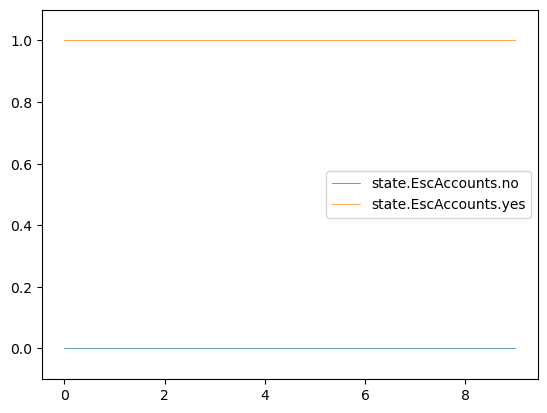

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

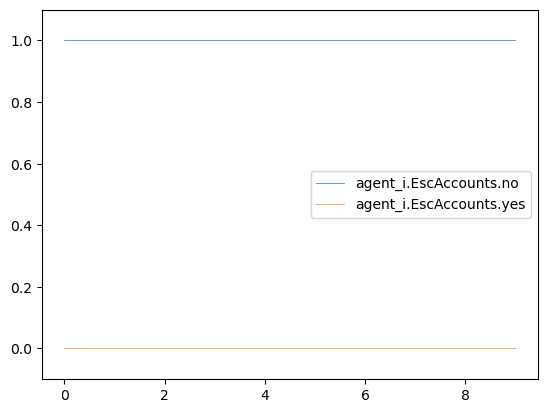

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

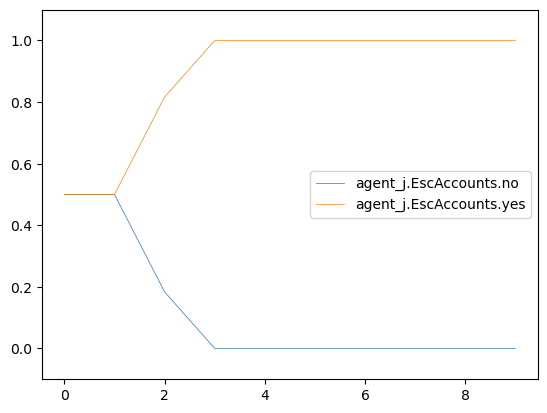

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

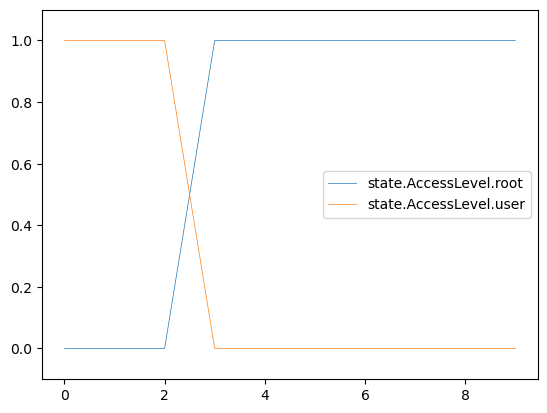

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

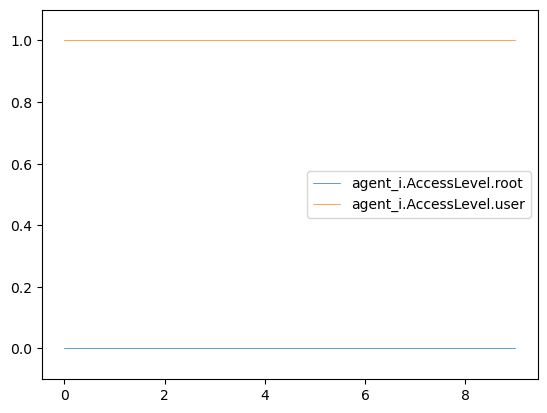

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

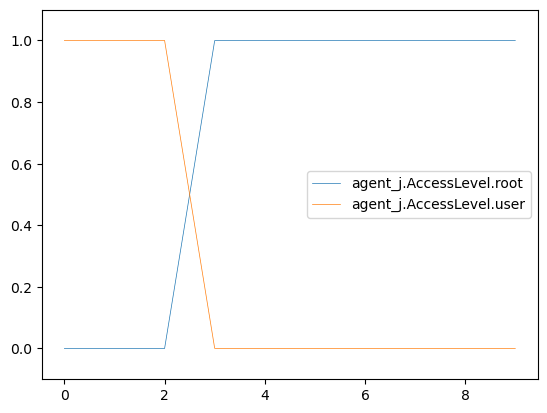

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

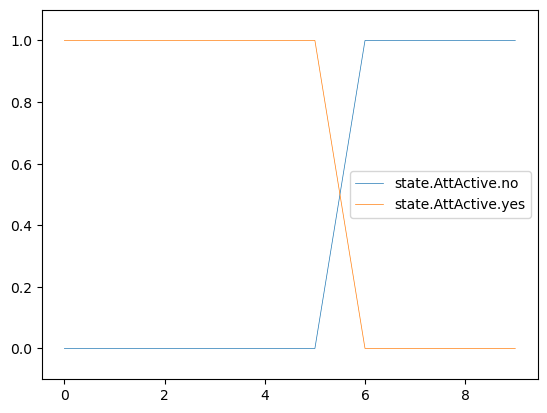

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0          0.000000e+00           1.000000e+00            Nop       FileRecon   
1          0.000000e+00           1.000000e+00            Nop    EnumAccounts   
2          0.000000e+00           1.000000e+00            Nop      PrivEscAcc   
3          1.080520e-07           9.999999e-01            Nop       FileRecon   
4          8.599650e-04           9.991401e-01            Nop  ManipulateData   
5          8.490333e-02           9.150966e-01            Nop            Exit   
6          9.982638e-01           1.736119e-03            Nop             Nop   
7          9.999086e-01           9.133632e-05            Nop             Nop   
8          1.000000e+00           1.110709e-11            Nop             Nop   
9          1.000000e+00           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                       file_write  
6                        file_enum  
7                             none  
8                             none  
9                             none

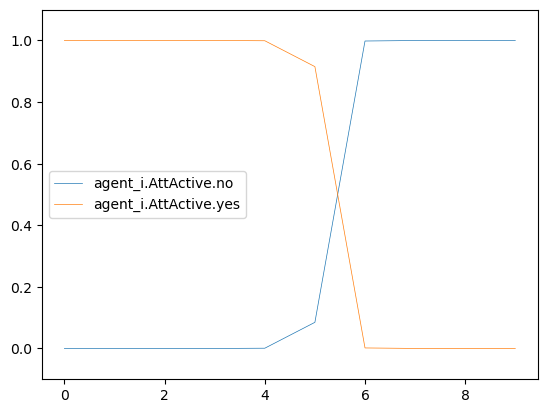

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           success  
5                         none                           failure  
6                         none                           success  
7                         none                           failure  
8                   user_files                           failure  
9                         none                           failure

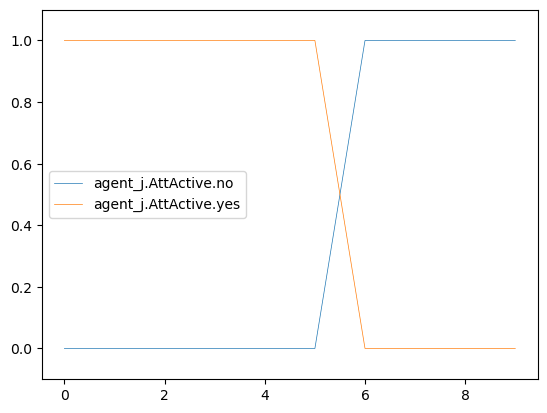

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

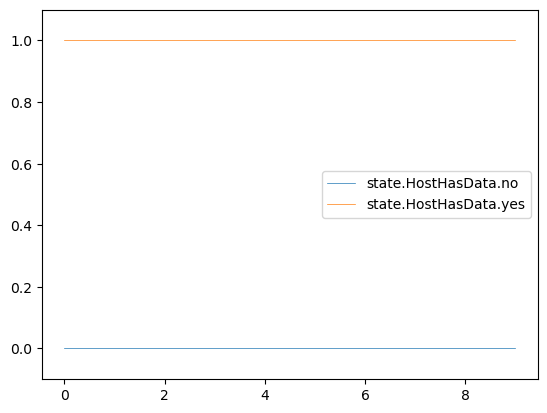

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                       file_write  
6             Nop                        file_enum  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

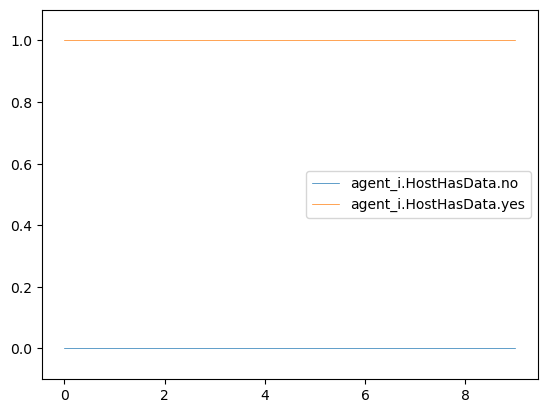

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           failure  
6                           success  
7                           failure  
8                           failure  
9                           failure

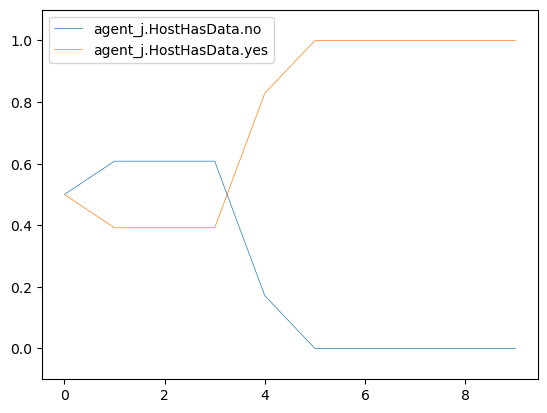

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

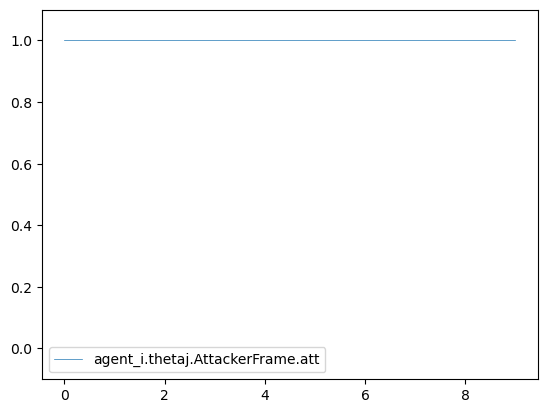

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382353                        0.617647   
3                         0.333395                        0.666605   
4                         0.333361                        0.666639   
5                         0.333348                        0.666652   
6                         0.333348                        0.666652   
7                         0.333348                        0.666652   
8                         0.333348                        0.666652   
9                         0.333348                        0.666652   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

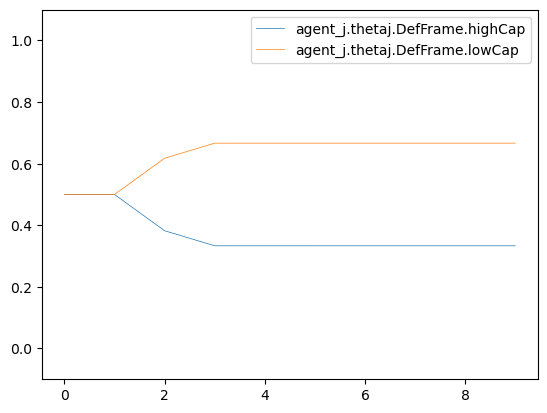

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0            Nop      PrivEscAcc
3                   1.0                   0.0            Nop       FileRecon
4                   1.0                   0.0            Nop  ManipulateData
5                   1.0                   0.0            Nop            Exit
6                   1.0                   0.0            Nop             Nop
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

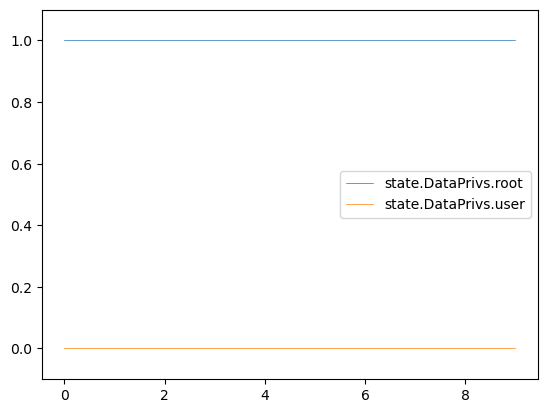

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

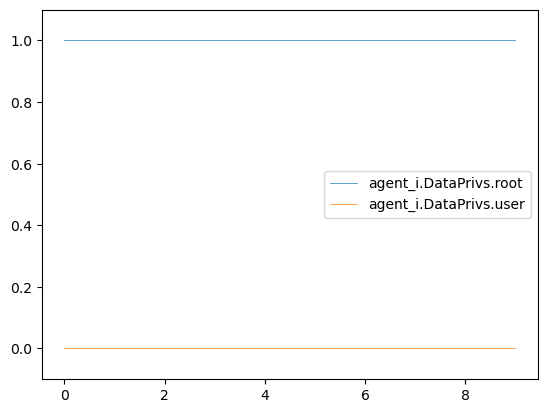

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.719138                0.280862  ManipulateData   
5                0.762611                0.237389            Exit   
6                0.762611                0.237389             Nop   
7                0.762611                0.237389             Nop   
8                0.762611                0.237389             Nop   
9                0.762611                0.237389             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

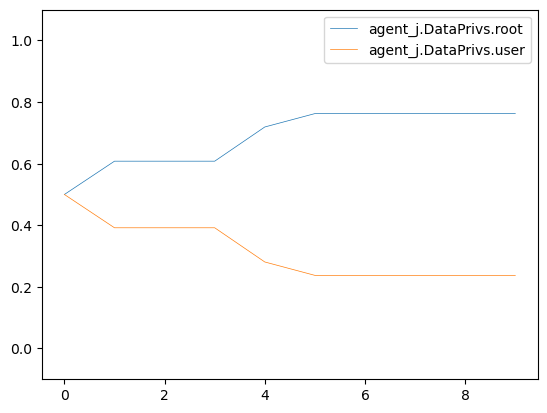

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                0.0                 1.0            Nop      PrivEscAcc
3                0.0                 1.0            Nop       FileRecon
4                0.0                 1.0            Nop  ManipulateData
5                0.0                 1.0            Nop            Exit
6                0.0                 1.0            Nop             Nop
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

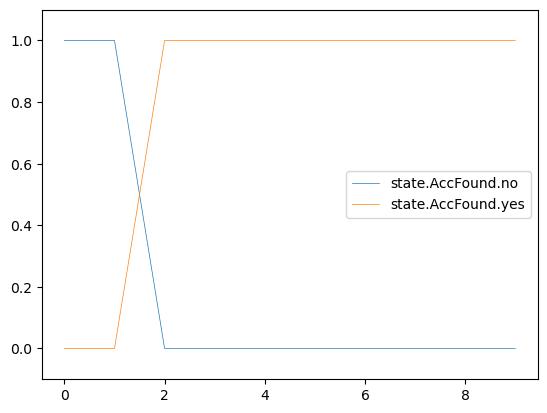

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop    EnumAccounts   
2                  1.0                   0.0            Nop      PrivEscAcc   
3                  1.0                   0.0            Nop       FileRecon   
4                  1.0                   0.0            Nop  ManipulateData   
5                  1.0                   0.0            Nop            Exit   
6                  1.0                   0.0            Nop             Nop   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

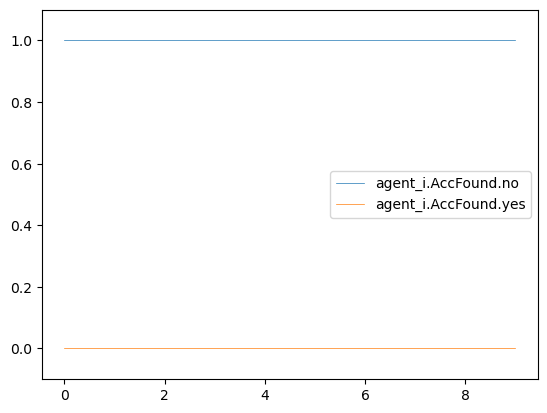

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.205882              0.794118      PrivEscAcc            Nop   
3             0.000259              0.999741       FileRecon            Nop   
4             0.000117              0.999883  ManipulateData            Nop   
5             0.000062              0.999938            Exit            Nop   
6             0.000062              0.999938             Nop            Nop   
7             0.000062              0.999938             Nop            Nop   
8             0.000062              0.999938             Nop            Nop   
9             0.000062              0.999938             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

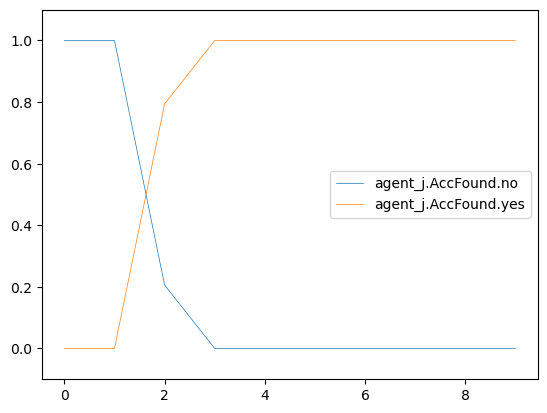

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0            Nop      PrivEscAcc
3                 1.0                  0.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 0.0                  1.0            Nop             Nop
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

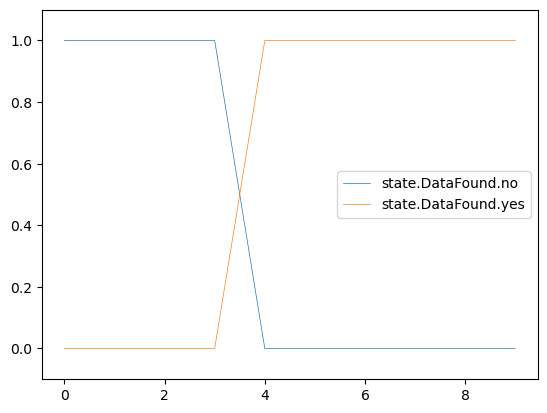

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop    EnumAccounts   
2                   1.0                    0.0            Nop      PrivEscAcc   
3                   1.0                    0.0            Nop       FileRecon   
4                   1.0                    0.0            Nop  ManipulateData   
5                   1.0                    0.0            Nop            Exit   
6                   1.0                    0.0            Nop             Nop   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

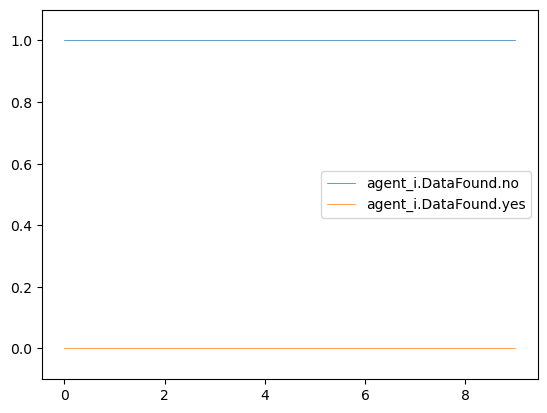

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.972973               0.027027    EnumAccounts            Nop   
2              0.972973               0.027027      PrivEscAcc            Nop   
3              0.972973               0.027027       FileRecon            Nop   
4              0.191826               0.808174  ManipulateData            Nop   
5              0.000238               0.999763            Exit            Nop   
6              0.000238               0.999763             Nop            Nop   
7              0.000238               0.999763             Nop            Nop   
8              0.000238               0.999763             Nop            Nop   
9              0.000238               0.999763             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

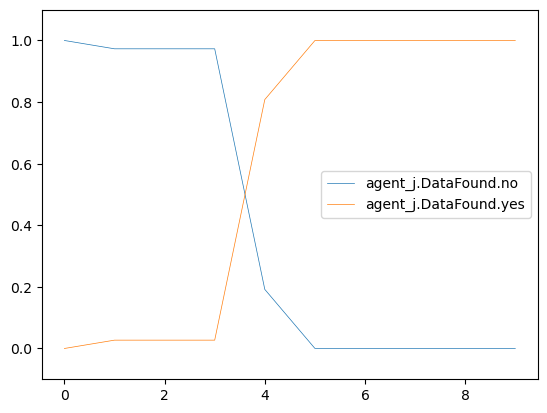

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0            Nop      PrivEscAcc  
3                      1.0            Nop       FileRecon  
4                      1.0            Nop  ManipulateData  
5                      1.0            Nop            Exit  
6                      1.0            Nop             Nop  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

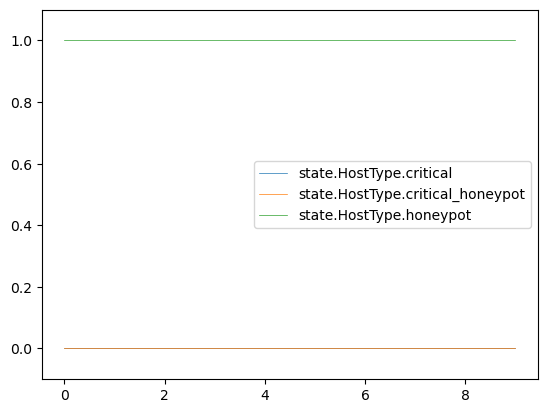

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0            Nop      PrivEscAcc   
3                        1.0            Nop       FileRecon   
4                        1.0            Nop  ManipulateData   
5                        1.0            Nop            Exit   
6                        1.0            Nop             Nop   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

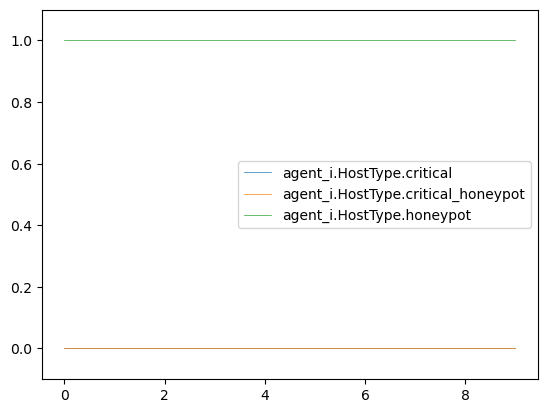

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0    EnumAccounts            Nop   
2                        0.0      PrivEscAcc            Nop   
3                        0.0       FileRecon            Nop   
4                        0.0  ManipulateData            Nop   
5                        0.0            Exit            Nop   
6                        0.0             Nop            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

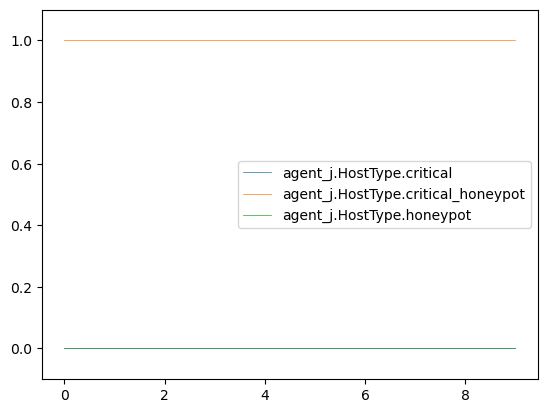

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    0.0                     1.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

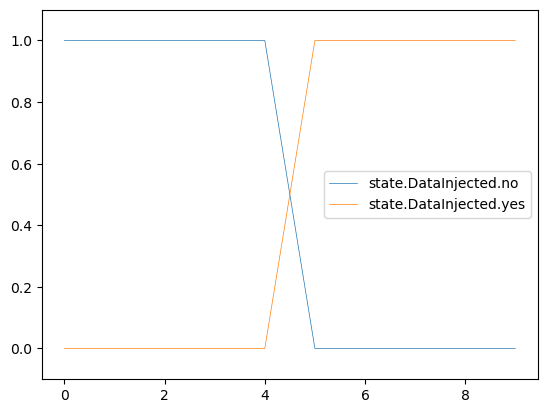

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

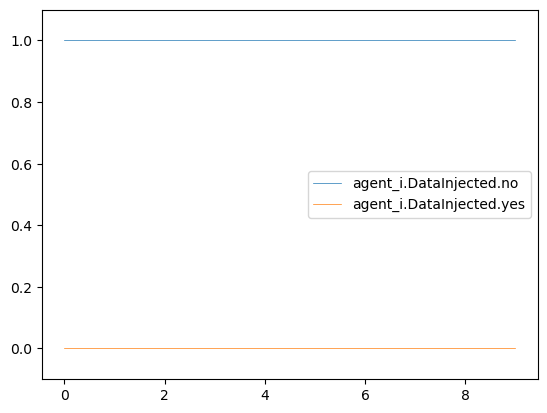

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000238                  0.999763            Exit   
6                 0.000238                  0.999763             Nop   
7                 0.000238                  0.999763             Nop   
8                 0.000238                  0.999763             Nop   
9                 0.000238                  0.999763             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

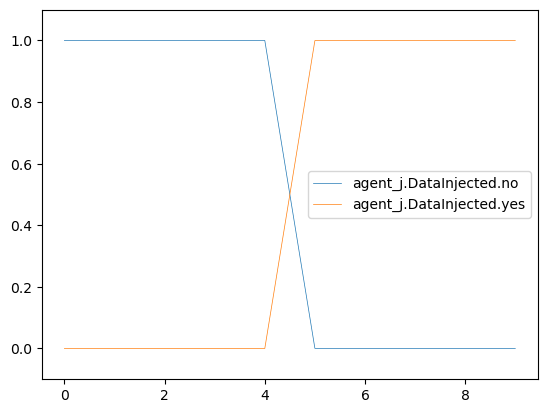

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

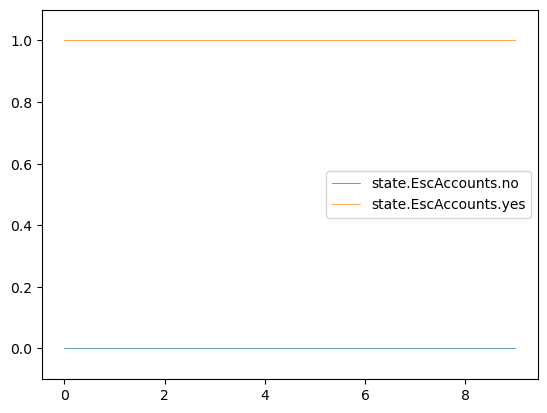

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

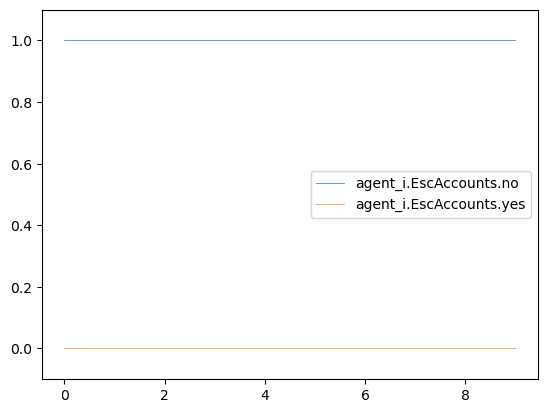

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.183824                 0.816177      PrivEscAcc   
3                0.000232                 0.999768       FileRecon   
4                0.000105                 0.999895  ManipulateData   
5                0.000055                 0.999945            Exit   
6                0.000055                 0.999945             Nop   
7                0.000055                 0.999945             Nop   
8                0.000055                 0.999945             Nop   
9                0.000055                 0.999945             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

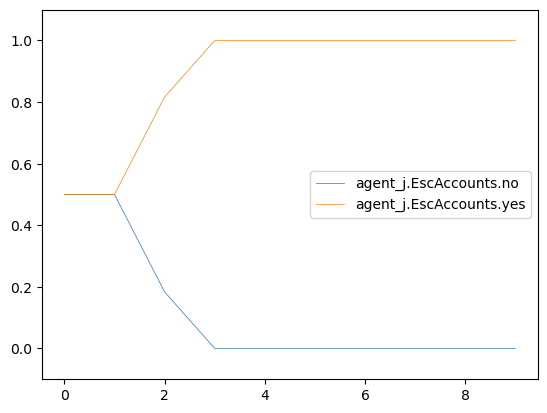

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

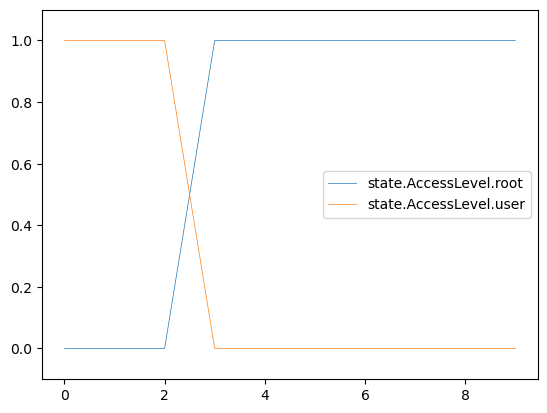

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

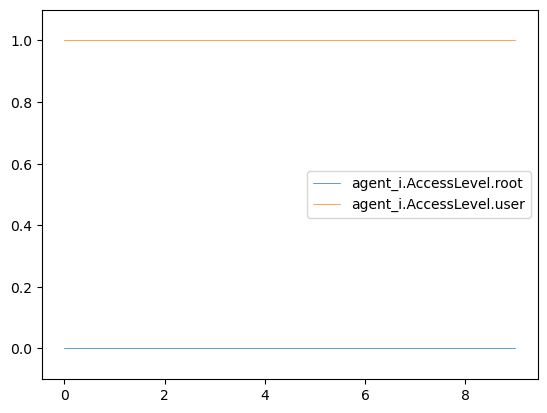

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999741                  0.000259       FileRecon   
4                  0.999883                  0.000117  ManipulateData   
5                  0.999938                  0.000062            Exit   
6                  0.999938                  0.000062             Nop   
7                  0.999938                  0.000062             Nop   
8                  0.999938                  0.000062             Nop   
9                  0.999938                  0.000062             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

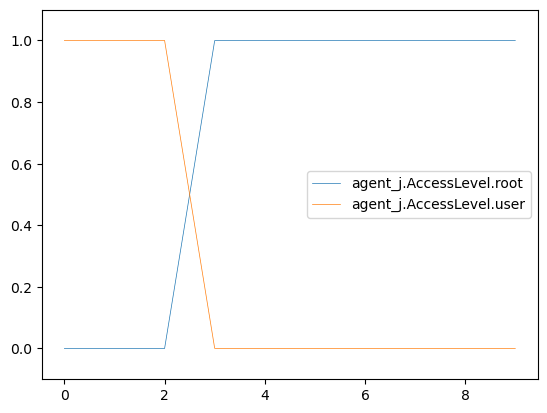

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0            Nop      PrivEscAcc
3                 0.0                  1.0            Nop       FileRecon
4                 0.0                  1.0            Nop  ManipulateData
5                 0.0                  1.0            Nop            Exit
6                 1.0                  0.0            Nop             Nop
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

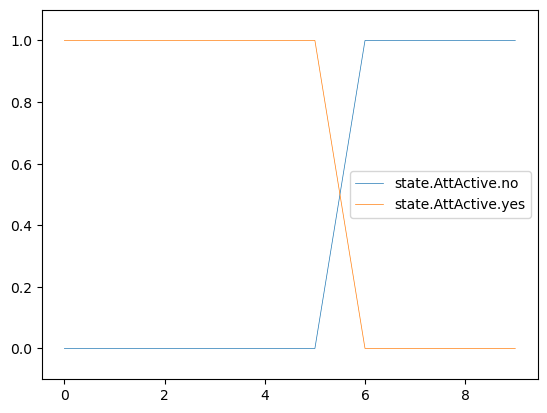

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0          0.000000e+00           1.000000e+00            Nop       FileRecon   
1          0.000000e+00           1.000000e+00            Nop    EnumAccounts   
2          0.000000e+00           1.000000e+00            Nop      PrivEscAcc   
3          1.080520e-07           9.999999e-01            Nop       FileRecon   
4          8.599650e-04           9.991401e-01            Nop  ManipulateData   
5          8.490333e-02           9.150966e-01            Nop            Exit   
6          9.999905e-01           9.518896e-06            Nop             Nop   
7          1.000000e+00           9.722988e-09            Nop             Nop   
8          1.000000e+00           1.256794e-19            Nop             Nop   
9          1.000000e+00           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

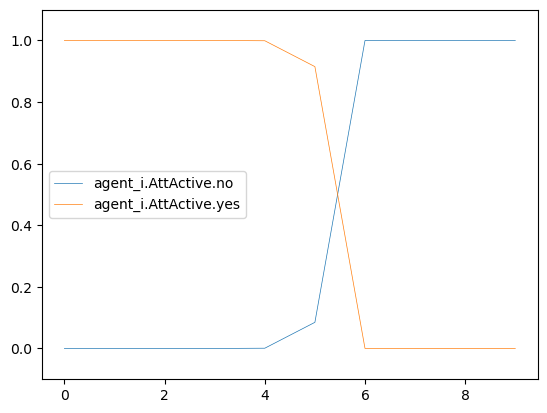

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc            Nop   
3                   0.0                    1.0       FileRecon            Nop   
4                   0.0                    1.0  ManipulateData            Nop   
5                   0.0                    1.0            Exit            Nop   
6                   1.0                    0.0             Nop            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           success  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           success  
8                         none                           success  
9                   user_files                           success

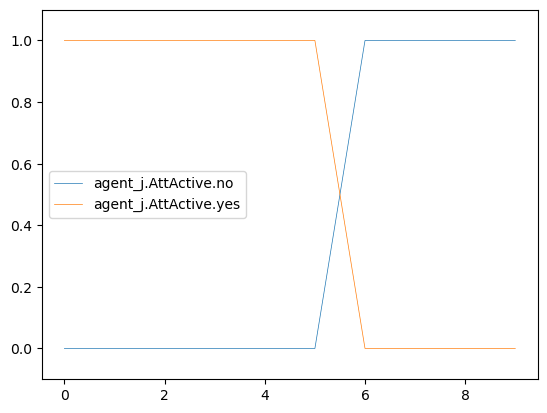

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0            Nop      PrivEscAcc
3                   0.0                    1.0            Nop       FileRecon
4                   0.0                    1.0            Nop  ManipulateData
5                   0.0                    1.0            Nop            Exit
6                   0.0                    1.0            Nop             Nop
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

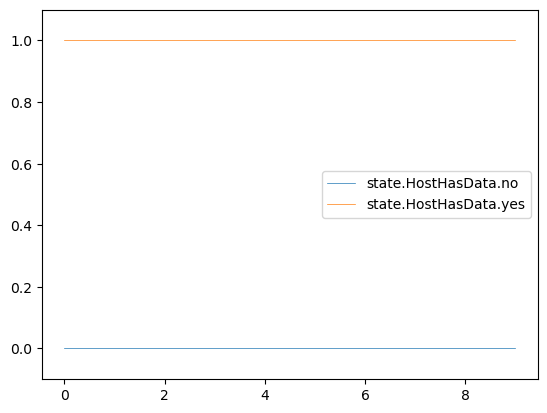

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                   login_activity  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

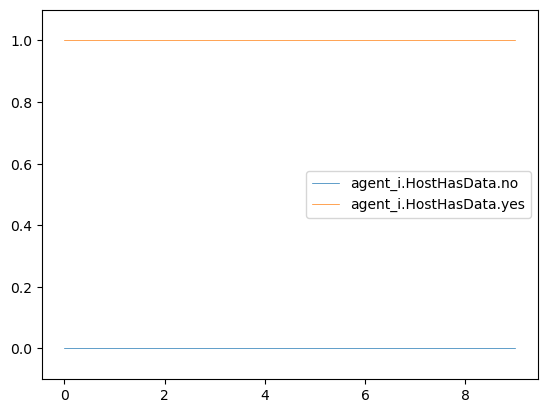

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.608108                 0.391892       FileRecon   
4                0.171257                 0.828743  ManipulateData   
5                0.000212                 0.999788            Exit   
6                0.000212                 0.999788             Nop   
7                0.000212                 0.999788             Nop   
8                0.000212                 0.999788             Nop   
9                0.000212                 0.999788             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

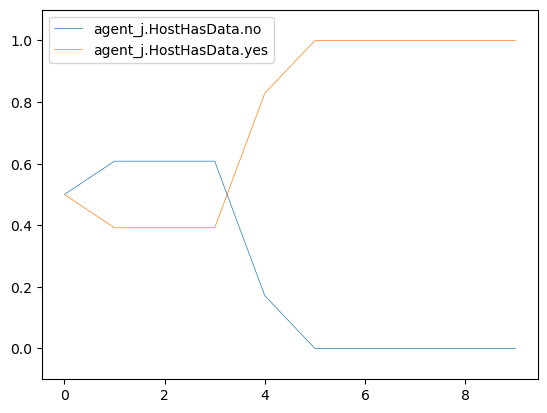

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                   login_activity
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

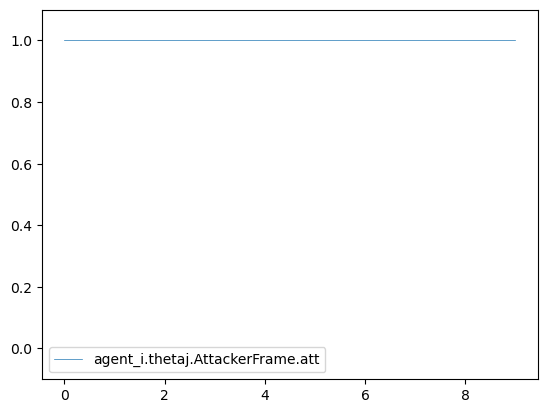

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.500000                        0.500000   
3                         0.382353                        0.617647   
4                         0.333395                        0.666605   
5                         0.333359                        0.666641   
6                         0.333344                        0.666656   
7                         0.333344                        0.666656   
8                         0.333344                        0.666656   
9                         0.333344                        0.666656   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

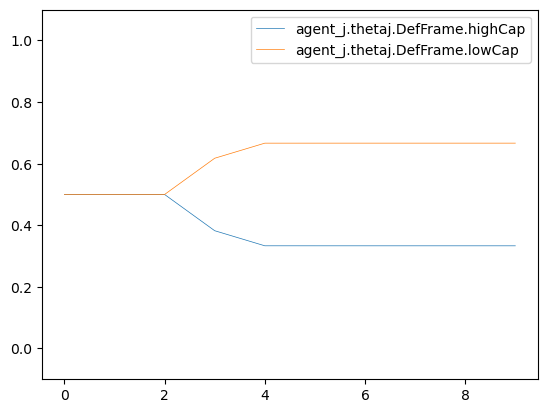

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop  ManipulateData
2                   1.0                   0.0            Nop    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

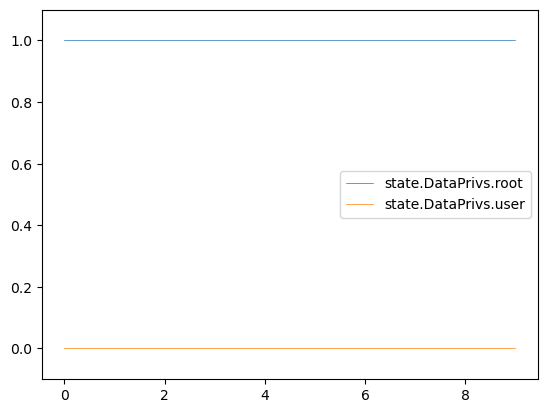

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0            Nop   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

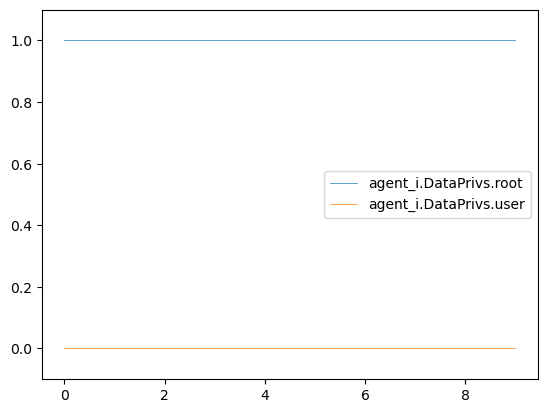

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.192308                0.807692  ManipulateData   
2                0.623596                0.376405    EnumAccounts   
3                0.623595                0.376404      PrivEscAcc   
4                0.623595                0.376405       FileRecon   
5                0.767448                0.232552  ManipulateData   
6                0.827012                0.172988            Exit   
7                0.827012                0.172988             Nop   
8                0.827012                0.172988             Nop   
9                0.827012                0.172988             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

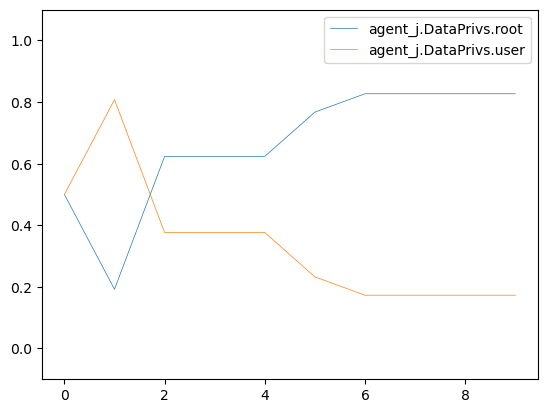

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop  ManipulateData
2                1.0                 0.0            Nop    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

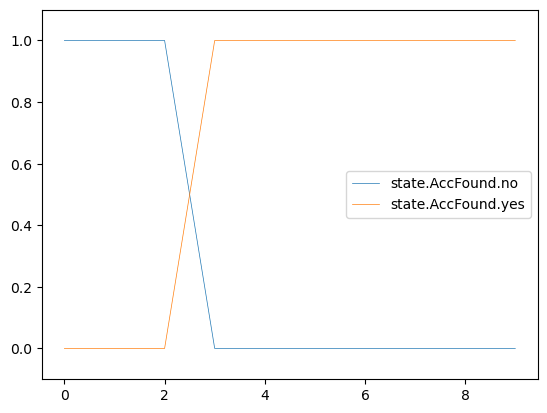

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0                  1.0                   0.0            Nop       FileRecon   
1                  1.0                   0.0            Nop  ManipulateData   
2                  1.0                   0.0            Nop    EnumAccounts   
3                  1.0                   0.0            Nop      PrivEscAcc   
4                  1.0                   0.0            Nop       FileRecon   
5                  1.0                   0.0            Nop  ManipulateData   
6                  1.0                   0.0            Nop            Exit   
7                  1.0                   0.0            Nop             Nop   
8                  1.0                   0.0            Nop             Nop   
9                  1.0                   0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                       file_write  
9                             none

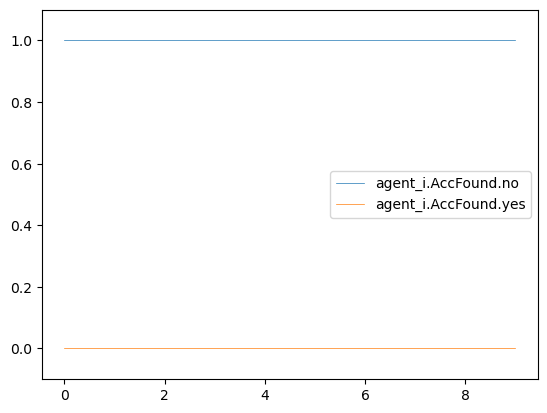

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000  ManipulateData            Nop   
2             1.000000              0.000000    EnumAccounts            Nop   
3             0.205882              0.794118      PrivEscAcc            Nop   
4             0.000259              0.999741       FileRecon            Nop   
5             0.000108              0.999892  ManipulateData            Nop   
6             0.000045              0.999955            Exit            Nop   
7             0.000045              0.999955             Nop            Nop   
8             0.000045              0.999955             Nop            Nop   
9             0.000045              0.999955             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

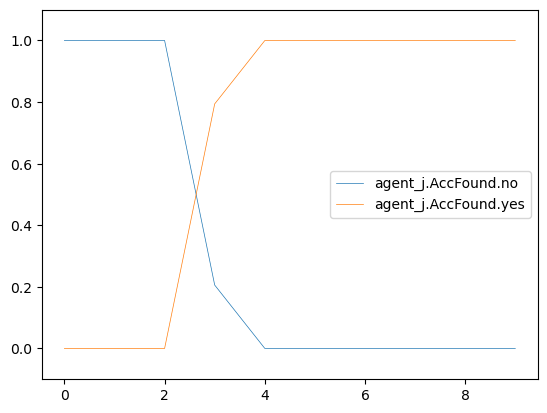

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop  ManipulateData
2                 1.0                  0.0            Nop    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

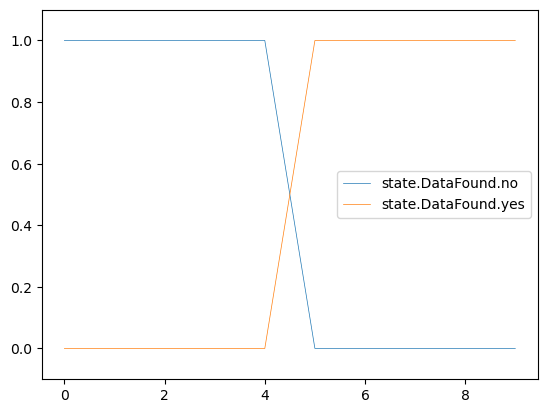

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0                   1.0                    0.0            Nop       FileRecon   
1                   1.0                    0.0            Nop  ManipulateData   
2                   1.0                    0.0            Nop    EnumAccounts   
3                   1.0                    0.0            Nop      PrivEscAcc   
4                   1.0                    0.0            Nop       FileRecon   
5                   1.0                    0.0            Nop  ManipulateData   
6                   1.0                    0.0            Nop            Exit   
7                   1.0                    0.0            Nop             Nop   
8                   1.0                    0.0            Nop             Nop   
9                   1.0                    0.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                       file_write  
9                             none

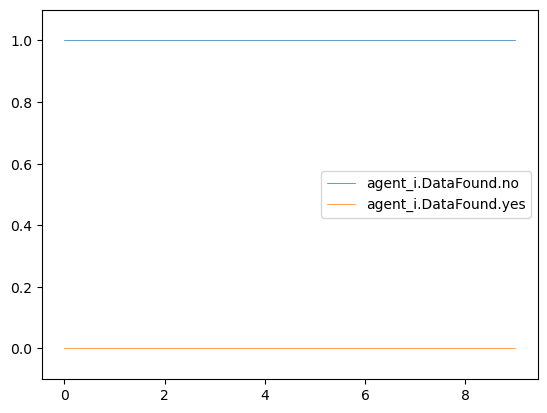

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.307692               0.692308  ManipulateData            Nop   
2              0.997753               0.002247    EnumAccounts            Nop   
3              0.997753               0.002247      PrivEscAcc            Nop   
4              0.997753               0.002247       FileRecon            Nop   
5              0.204712               0.795288  ManipulateData            Nop   
6              0.000258               0.999742            Exit            Nop   
7              0.000258               0.999742             Nop            Nop   
8              0.000258               0.999742             Nop            Nop   
9              0.000258               0.999742             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

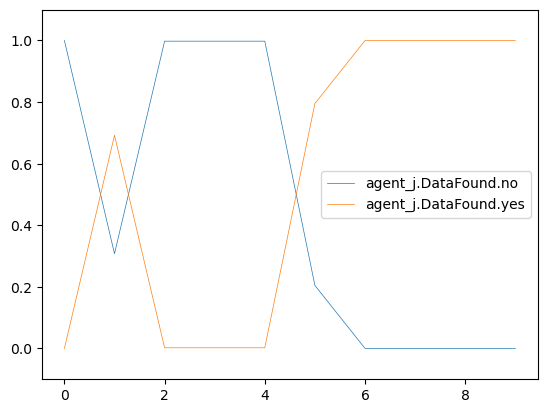

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop  ManipulateData  
2                      1.0            Nop    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

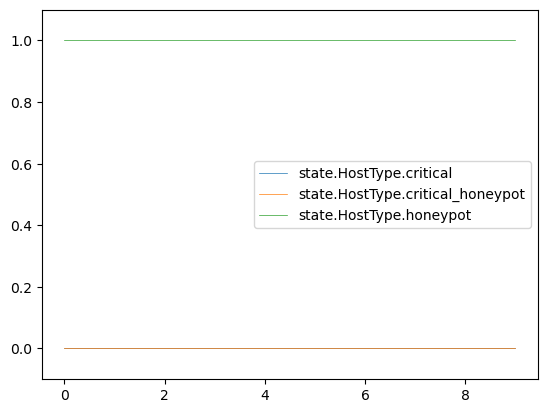

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop  ManipulateData   
2                        1.0            Nop    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                       file_write  
9                             none

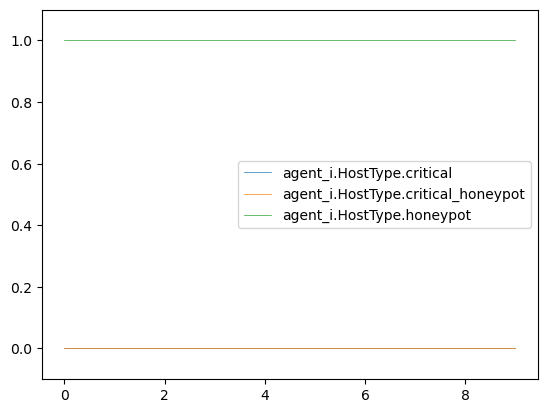

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                        0.0       FileRecon            Nop   
1                        0.0  ManipulateData            Nop   
2                        0.0    EnumAccounts            Nop   
3                        0.0      PrivEscAcc            Nop   
4                        0.0       FileRecon            Nop   
5                        0.0  ManipulateData            Nop   
6                        0.0            Exit            Nop   
7                        0.0             Nop            Nop   
8                        0.0             Nop            Nop   
9                        0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

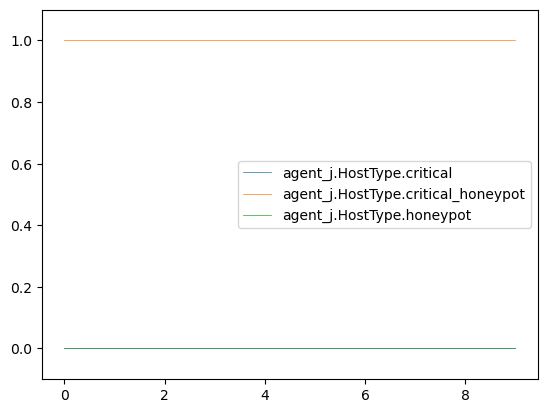

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

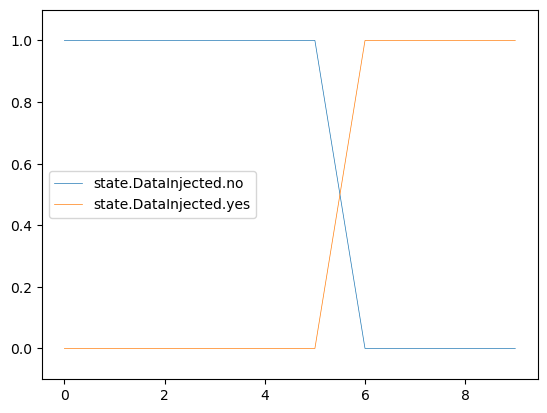

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

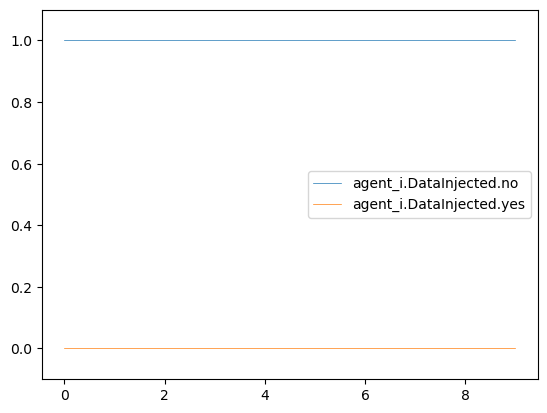

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000  ManipulateData   
2                 0.997753                  0.002247    EnumAccounts   
3                 0.997753                  0.002247      PrivEscAcc   
4                 0.997753                  0.002247       FileRecon   
5                 0.994073                  0.005927  ManipulateData   
6                 0.000258                  0.999742            Exit   
7                 0.000258                  0.999742             Nop   
8                 0.000258                  0.999742             Nop   
9                 0.000258                  0.999742             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

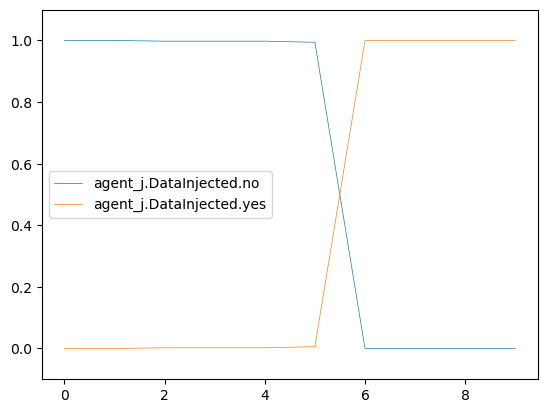

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

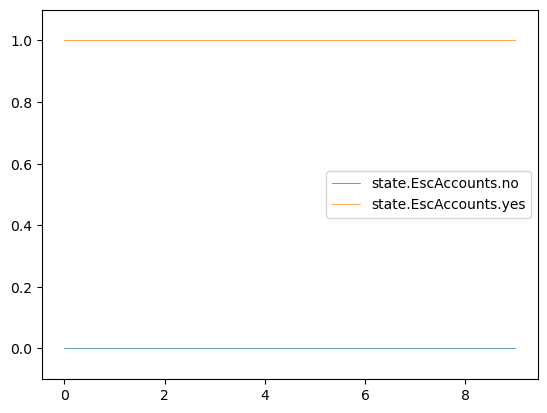

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0            Nop   
3                     1.0                      0.0            Nop   
4                     1.0                      0.0            Nop   
5                     1.0                      0.0            Nop   
6                     1.0                      0.0            Nop   
7                     1.0                      0.0            Nop   
8                     1.0                      0.0            Nop   
9                     1.0                      0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

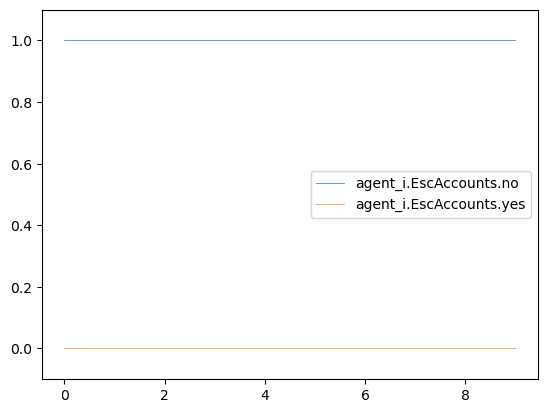

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000  ManipulateData   
2                0.625000                 0.375000    EnumAccounts   
3                0.183824                 0.816176      PrivEscAcc   
4                0.000232                 0.999768       FileRecon   
5                0.000096                 0.999904  ManipulateData   
6                0.000040                 0.999960            Exit   
7                0.000040                 0.999960             Nop   
8                0.000040                 0.999960             Nop   
9                0.000040                 0.999960             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

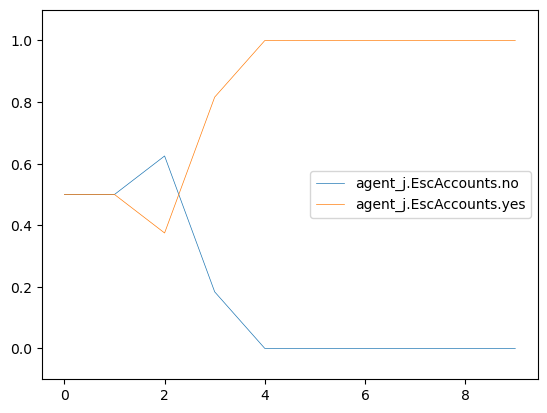

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1  ManipulateData  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

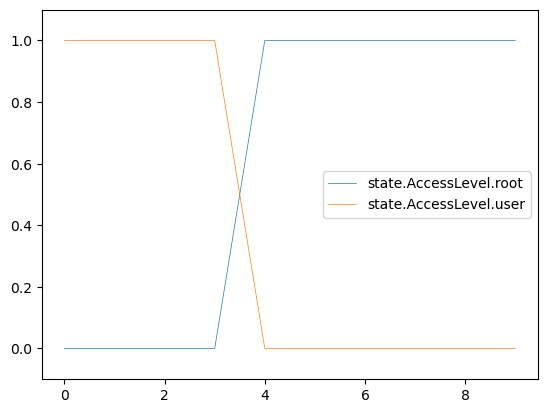

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

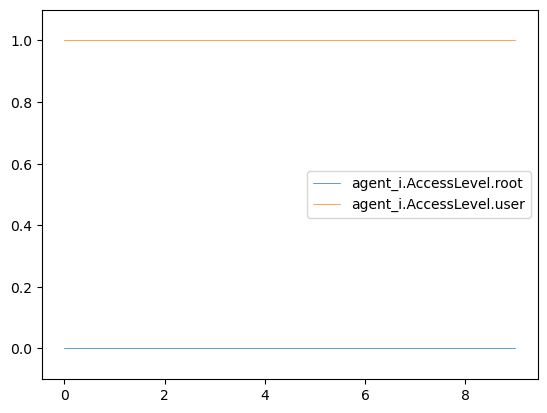

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000  ManipulateData   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999741                  0.000259       FileRecon   
5                  0.999892                  0.000108  ManipulateData   
6                  0.999955                  0.000045            Exit   
7                  0.999955                  0.000045             Nop   
8                  0.999955                  0.000045             Nop   
9                  0.999955                  0.000045             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

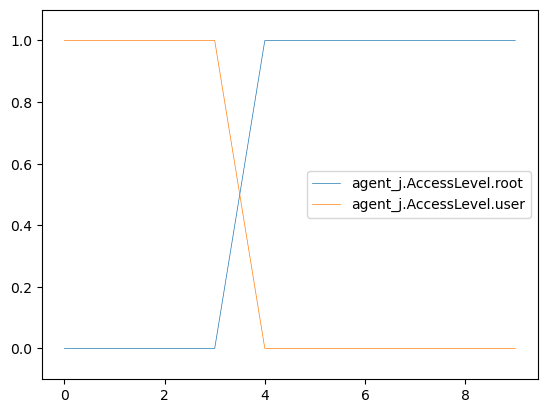

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop  ManipulateData
2                 0.0                  1.0            Nop    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

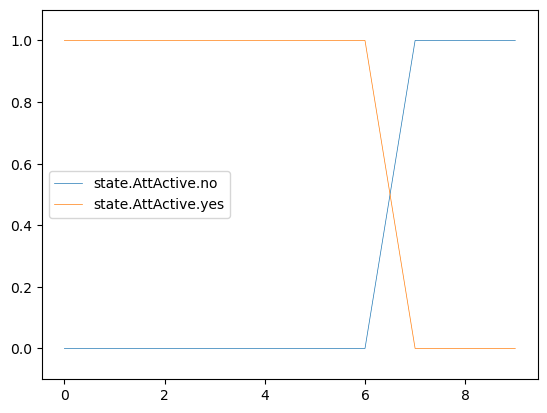

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000           1.000000e+00            Nop       FileRecon   
1              0.000000           1.000000e+00            Nop  ManipulateData   
2              0.000000           1.000000e+00            Nop    EnumAccounts   
3              0.000010           9.999905e-01            Nop      PrivEscAcc   
4              0.007043           9.929575e-01            Nop       FileRecon   
5              0.000949           9.990511e-01            Nop  ManipulateData   
6              0.084911           9.150890e-01            Nop            Exit   
7              0.999077           9.225787e-04            Nop             Nop   
8              0.999999           9.424451e-07            Nop             Nop   
9              1.000000           0.000000e+00            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                   login_activity  
7                             none  
8                       file_write  
9                             none

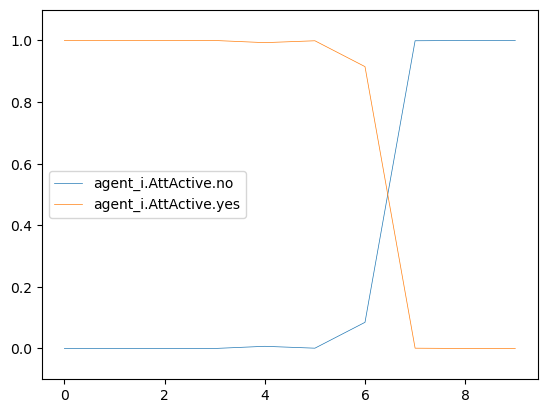

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0  ManipulateData            Nop   
2                   0.0                    1.0    EnumAccounts            Nop   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           success  
1                         none                           failure  
2                         none                           success  
3                   user_files                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           failure  
9                   user_files                           failure

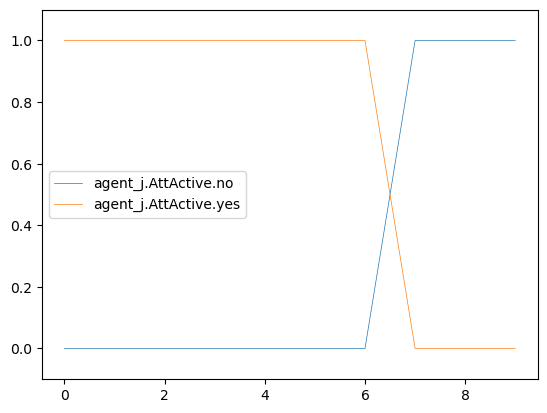

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop  ManipulateData
2                   0.0                    1.0            Nop    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

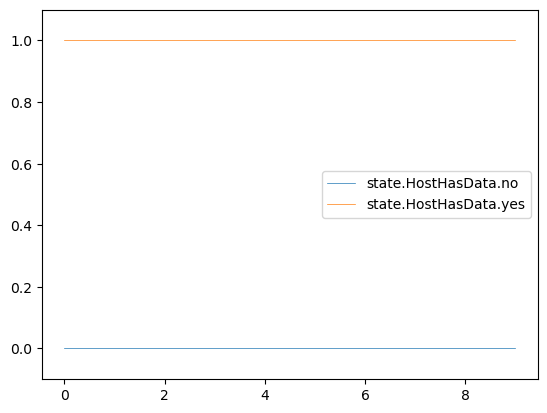

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0            Nop   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1  ManipulateData                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                   login_activity  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

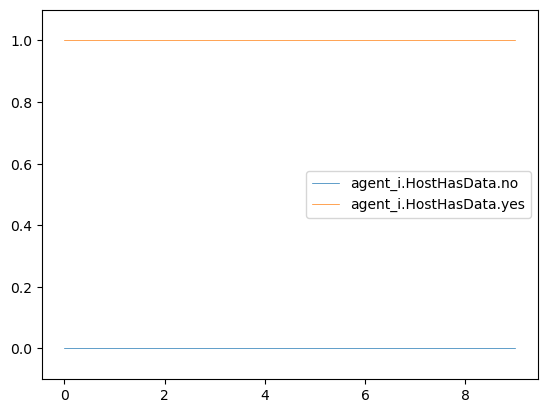

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.192308                 0.807692  ManipulateData   
2                0.623596                 0.376405    EnumAccounts   
3                0.623595                 0.376404      PrivEscAcc   
4                0.623595                 0.376405       FileRecon   
5                0.182762                 0.817238  ManipulateData   
6                0.000230                 0.999770            Exit   
7                0.000230                 0.999770             Nop   
8                0.000230                 0.999770             Nop   
9                0.000230                 0.999770             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2            Nop                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           success  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           success  
7                           success  
8                           failure  
9                           failure

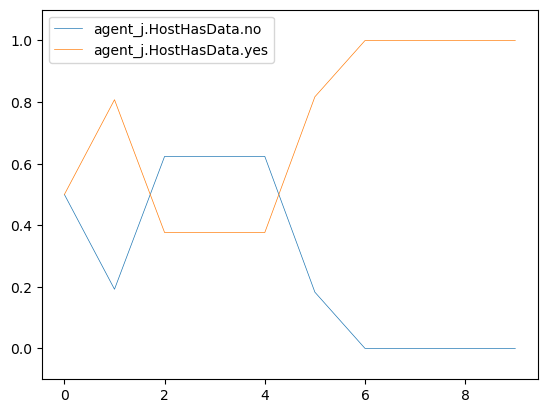

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    